In [3]:
import sys  
sys.path.insert(0, './../')
import numpy as np
import bbdc2021 as bbdc
import pandas as pd
from importlib import reload
reload(bbdc)
import tensorflow as tf
from keras import layers
import keras
import matplotlib.pyplot as plt
import models.dnn.dnn as dnn
reload(dnn)
import evaluation.evaluate as evaluate

In [4]:
pathToDataset = "./../data/" + "minmax_dataset_fft_l1024_o256_b32/"
timepoints = np.load((pathToDataset + 'timepoints.npy'))
X_train = np.load((pathToDataset + 'train.npy'))
Y_train = np.load((pathToDataset + 'train_labels.npy'))
X_validation = np.load((pathToDataset + 'validation.npy'))
Y_validation = np.load((pathToDataset + 'validation_labels.npy'))

In [5]:
Y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [6]:
# label encode for easier use, even though we do not have ordinary data, but do know how to do it with one hot for the time series
int_Y_train = []
for index, row in enumerate(Y_train):
    series = []
    for timepoint in row:
        series.append(np.where(timepoint == 1)[0][0])
    int_Y_train.append(series)
int_Y_validation = []
for index, row in enumerate(Y_validation):
    series = []
    for timepoint in row:
        series.append(np.where(timepoint == 1)[0][0])
    int_Y_validation.append(series)
Y_train = np.array(int_Y_train)
Y_validation = np.array(int_Y_validation)

In [7]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 8, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
print(tf.__version__)
print(X_train.shape)
print(Y_train.shape)

2.2.0
(8000, 209, 16)
(8000, 209)


In [12]:
model = dnn.simple_dnn(209, 16)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3344)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               1338000   
_________________________________________________________________
dense_3 (Dense)              (None, 209)               83809     
Total params: 1,421,809
Trainable params: 1,421,809
Non-trainable params: 0
_________________________________________________________________


In [23]:
# mit crossentropy
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['mae', 'accuracy'])
history = model.fit(X_train, Y_train, batch_size=256, epochs=10000, validation_data=(X_validation, Y_validation), shuffle=True)

Epoch 1/10000
32/32 [==============================] - 1s 23ms/step - loss: 3443.4561 - mae: 8.5007 - accuracy: 0.0036 - val_loss: 3489.2634 - val_mae: 7.2198 - val_accuracy: 0.0020
Epoch 2/10000
32/32 [==============================] - 1s 21ms/step - loss: 3404.1401 - mae: 5.8602 - accuracy: 0.0024 - val_loss: 3511.3884 - val_mae: 5.4837 - val_accuracy: 0.0010
Epoch 3/10000
32/32 [==============================] - 1s 21ms/step - loss: 3421.9109 - mae: 6.2212 - accuracy: 0.0022 - val_loss: 3494.8416 - val_mae: 6.3178 - val_accuracy: 0.0000e+00
Epoch 4/10000
32/32 [==============================] - 1s 21ms/step - loss: 3405.9128 - mae: 5.8062 - accuracy: 0.0010 - val_loss: 3489.2561 - val_mae: 5.7341 - val_accuracy: 0.0000e+00
Epoch 5/10000
32/32 [==============================] - 1s 21ms/step - loss: 3438.9788 - mae: 8.2231 - accuracy: 0.0046 - val_loss: 3498.1531 - val_mae: 8.6532 - val_accuracy: 0.0090
Epoch 6/10000
32/32 [==============================] - 1s 21ms/step - loss: 3411.6

32/32 [==============================] - 1s 21ms/step - loss: 3397.3101 - mae: 5.6381 - accuracy: 0.0016 - val_loss: 3483.5974 - val_mae: 5.7785 - val_accuracy: 0.0010
Epoch 46/10000
32/32 [==============================] - 1s 21ms/step - loss: 3402.5681 - mae: 5.7797 - accuracy: 0.0018 - val_loss: 3575.1882 - val_mae: 8.2094 - val_accuracy: 0.0060
Epoch 47/10000
32/32 [==============================] - 1s 21ms/step - loss: 3433.6702 - mae: 7.7090 - accuracy: 0.0037 - val_loss: 3485.8513 - val_mae: 7.0936 - val_accuracy: 0.0020
Epoch 48/10000
32/32 [==============================] - 1s 20ms/step - loss: 3401.9639 - mae: 6.4628 - accuracy: 0.0026 - val_loss: 3486.0339 - val_mae: 5.8892 - val_accuracy: 0.0020
Epoch 49/10000
32/32 [==============================] - 1s 21ms/step - loss: 3396.3096 - mae: 5.6938 - accuracy: 0.0015 - val_loss: 3483.3083 - val_mae: 5.8886 - val_accuracy: 0.0000e+00
Epoch 50/10000
32/32 [==============================] - 1s 21ms/step - loss: 3395.8193 - mae: 5.

32/32 [==============================] - 1s 20ms/step - loss: 3394.2190 - mae: 5.8780 - accuracy: 3.7500e-04 - val_loss: 3486.3337 - val_mae: 5.7603 - val_accuracy: 0.0020
Epoch 90/10000
32/32 [==============================] - 1s 20ms/step - loss: 3395.0393 - mae: 5.7086 - accuracy: 1.2500e-04 - val_loss: 3484.0547 - val_mae: 5.7068 - val_accuracy: 0.0020
Epoch 91/10000
32/32 [==============================] - 1s 20ms/step - loss: 3399.2913 - mae: 5.9588 - accuracy: 7.5000e-04 - val_loss: 3482.1162 - val_mae: 5.9084 - val_accuracy: 0.0010
Epoch 92/10000
32/32 [==============================] - 1s 20ms/step - loss: 3394.1448 - mae: 5.7783 - accuracy: 3.7500e-04 - val_loss: 3482.8501 - val_mae: 5.8504 - val_accuracy: 0.0010
Epoch 93/10000
32/32 [==============================] - 1s 20ms/step - loss: 3400.3601 - mae: 5.7847 - accuracy: 6.2500e-04 - val_loss: 3480.2388 - val_mae: 6.5459 - val_accuracy: 0.0010
Epoch 94/10000
32/32 [==============================] - 1s 20ms/step - loss: 341

32/32 [==============================] - 1s 21ms/step - loss: 3396.2451 - mae: 6.1372 - accuracy: 1.2500e-04 - val_loss: 3484.0020 - val_mae: 6.2824 - val_accuracy: 0.0020
Epoch 133/10000
32/32 [==============================] - 1s 20ms/step - loss: 3402.9565 - mae: 6.1059 - accuracy: 1.2500e-04 - val_loss: 3480.9346 - val_mae: 6.4876 - val_accuracy: 0.0020
Epoch 134/10000
32/32 [==============================] - 1s 20ms/step - loss: 3397.1360 - mae: 6.0824 - accuracy: 6.2500e-04 - val_loss: 3486.0510 - val_mae: 6.7653 - val_accuracy: 0.0010
Epoch 135/10000
32/32 [==============================] - 1s 20ms/step - loss: 3393.6477 - mae: 5.9652 - accuracy: 7.5000e-04 - val_loss: 3486.7383 - val_mae: 6.5687 - val_accuracy: 0.0010
Epoch 136/10000
32/32 [==============================] - 1s 20ms/step - loss: 3395.2080 - mae: 5.9439 - accuracy: 0.0012 - val_loss: 3479.3447 - val_mae: 5.8661 - val_accuracy: 0.0010
Epoch 137/10000
32/32 [==============================] - 1s 20ms/step - loss: 33

Epoch 176/10000
32/32 [==============================] - 1s 21ms/step - loss: 3396.4285 - mae: 6.4808 - accuracy: 1.2500e-04 - val_loss: 3484.9456 - val_mae: 6.2316 - val_accuracy: 0.0000e+00
Epoch 177/10000
32/32 [==============================] - 1s 20ms/step - loss: 3397.0020 - mae: 6.1642 - accuracy: 2.5000e-04 - val_loss: 3487.5310 - val_mae: 6.3618 - val_accuracy: 0.0010
Epoch 178/10000
32/32 [==============================] - 1s 22ms/step - loss: 3395.0840 - mae: 6.2009 - accuracy: 5.0000e-04 - val_loss: 3485.4409 - val_mae: 6.4119 - val_accuracy: 0.0000e+00
Epoch 179/10000
32/32 [==============================] - 1s 22ms/step - loss: 3394.5249 - mae: 6.2906 - accuracy: 5.0000e-04 - val_loss: 3485.0247 - val_mae: 6.2575 - val_accuracy: 0.0010
Epoch 180/10000
32/32 [==============================] - 1s 22ms/step - loss: 3392.3840 - mae: 6.1360 - accuracy: 2.5000e-04 - val_loss: 3483.6145 - val_mae: 6.2095 - val_accuracy: 0.0000e+00
Epoch 181/10000
32/32 [=========================

32/32 [==============================] - 1s 19ms/step - loss: 3397.0811 - mae: 6.7826 - accuracy: 0.0018 - val_loss: 3481.0081 - val_mae: 7.1559 - val_accuracy: 0.0000e+00
Epoch 221/10000
32/32 [==============================] - 1s 19ms/step - loss: 3396.2251 - mae: 6.8012 - accuracy: 0.0019 - val_loss: 3479.1042 - val_mae: 6.8910 - val_accuracy: 0.0000e+00
Epoch 222/10000
32/32 [==============================] - 1s 19ms/step - loss: 3390.5046 - mae: 6.3451 - accuracy: 0.0010 - val_loss: 3479.4788 - val_mae: 6.4059 - val_accuracy: 0.0000e+00
Epoch 223/10000
32/32 [==============================] - 1s 19ms/step - loss: 3390.7175 - mae: 6.3245 - accuracy: 8.7500e-04 - val_loss: 3488.9839 - val_mae: 6.2571 - val_accuracy: 0.0000e+00
Epoch 224/10000
32/32 [==============================] - 1s 19ms/step - loss: 3395.0010 - mae: 6.5664 - accuracy: 8.7500e-04 - val_loss: 3481.8430 - val_mae: 6.4652 - val_accuracy: 0.0000e+00
Epoch 225/10000
32/32 [==============================] - 1s 19ms/ste

32/32 [==============================] - 1s 22ms/step - loss: 3406.1953 - mae: 6.8230 - accuracy: 0.0016 - val_loss: 3492.4934 - val_mae: 7.6363 - val_accuracy: 0.0000e+00
Epoch 264/10000
32/32 [==============================] - 1s 21ms/step - loss: 3397.6956 - mae: 7.1274 - accuracy: 0.0018 - val_loss: 3478.5801 - val_mae: 7.4024 - val_accuracy: 0.0020
Epoch 265/10000
32/32 [==============================] - 1s 21ms/step - loss: 3392.0757 - mae: 6.6491 - accuracy: 3.7500e-04 - val_loss: 3483.6355 - val_mae: 7.3147 - val_accuracy: 0.0010
Epoch 266/10000
32/32 [==============================] - 1s 20ms/step - loss: 3395.9292 - mae: 6.8330 - accuracy: 5.0000e-04 - val_loss: 3480.6221 - val_mae: 6.5036 - val_accuracy: 0.0010
Epoch 267/10000
32/32 [==============================] - 1s 22ms/step - loss: 3388.7173 - mae: 6.3727 - accuracy: 2.5000e-04 - val_loss: 3479.5076 - val_mae: 6.4001 - val_accuracy: 0.0010
Epoch 268/10000
32/32 [==============================] - 1s 23ms/step - loss: 34

Epoch 307/10000
32/32 [==============================] - 1s 21ms/step - loss: 3512.2324 - mae: 24.2560 - accuracy: 0.0081 - val_loss: 3571.1941 - val_mae: 23.6515 - val_accuracy: 0.0070
Epoch 308/10000
32/32 [==============================] - 1s 20ms/step - loss: 3500.2429 - mae: 22.5332 - accuracy: 0.0081 - val_loss: 3561.2314 - val_mae: 21.5351 - val_accuracy: 0.0080
Epoch 309/10000
32/32 [==============================] - 1s 21ms/step - loss: 3491.0979 - mae: 20.2642 - accuracy: 0.0082 - val_loss: 3552.3599 - val_mae: 19.1495 - val_accuracy: 0.0080
Epoch 310/10000
32/32 [==============================] - 1s 21ms/step - loss: 3482.2261 - mae: 17.8598 - accuracy: 0.0081 - val_loss: 3543.6309 - val_mae: 16.8029 - val_accuracy: 0.0080
Epoch 311/10000
32/32 [==============================] - 1s 22ms/step - loss: 3474.0444 - mae: 15.8620 - accuracy: 0.0081 - val_loss: 3537.4270 - val_mae: 15.1665 - val_accuracy: 0.0090
Epoch 312/10000
32/32 [==============================] - 1s 22ms/step 

32/32 [==============================] - 1s 27ms/step - loss: 3554.6125 - mae: 13.9842 - accuracy: 0.0021 - val_loss: 3587.7122 - val_mae: 18.1113 - val_accuracy: 0.0020
Epoch 352/10000
32/32 [==============================] - 1s 23ms/step - loss: 3506.2451 - mae: 17.8356 - accuracy: 0.0016 - val_loss: 3564.9905 - val_mae: 17.6513 - val_accuracy: 0.0020
Epoch 353/10000
32/32 [==============================] - 1s 20ms/step - loss: 3490.7732 - mae: 16.9007 - accuracy: 0.0021 - val_loss: 3553.3535 - val_mae: 16.1440 - val_accuracy: 0.0020
Epoch 354/10000
32/32 [==============================] - 1s 20ms/step - loss: 3479.9714 - mae: 15.3222 - accuracy: 0.0020 - val_loss: 3543.5569 - val_mae: 14.4598 - val_accuracy: 0.0020
Epoch 355/10000
32/32 [==============================] - 1s 24ms/step - loss: 3469.8403 - mae: 13.3975 - accuracy: 0.0022 - val_loss: 3534.3540 - val_mae: 12.5563 - val_accuracy: 0.0030
Epoch 356/10000
32/32 [==============================] - 1s 21ms/step - loss: 3458.866

32/32 [==============================] - 1s 20ms/step - loss: 3409.5176 - mae: 7.2027 - accuracy: 0.0027 - val_loss: 3488.0190 - val_mae: 7.0464 - val_accuracy: 0.0010
Epoch 396/10000
32/32 [==============================] - 1s 20ms/step - loss: 3405.5911 - mae: 6.7509 - accuracy: 0.0027 - val_loss: 3491.0913 - val_mae: 6.7657 - val_accuracy: 0.0000e+00
Epoch 397/10000
32/32 [==============================] - 1s 20ms/step - loss: 3404.9165 - mae: 6.5273 - accuracy: 0.0024 - val_loss: 3488.4646 - val_mae: 6.6948 - val_accuracy: 0.0000e+00
Epoch 398/10000
32/32 [==============================] - 1s 20ms/step - loss: 3404.1475 - mae: 6.5157 - accuracy: 0.0020 - val_loss: 3488.9211 - val_mae: 6.7964 - val_accuracy: 0.0000e+00
Epoch 399/10000
32/32 [==============================] - 1s 20ms/step - loss: 3404.0728 - mae: 6.5276 - accuracy: 0.0021 - val_loss: 3489.4719 - val_mae: 6.7246 - val_accuracy: 0.0000e+00
Epoch 400/10000
32/32 [==============================] - 1s 20ms/step - loss: 34

Epoch 439/10000
32/32 [==============================] - 1s 21ms/step - loss: 3399.4282 - mae: 6.4181 - accuracy: 5.0000e-04 - val_loss: 3487.3633 - val_mae: 6.5890 - val_accuracy: 0.0010
Epoch 440/10000
32/32 [==============================] - 1s 20ms/step - loss: 3399.6484 - mae: 6.4151 - accuracy: 5.0000e-04 - val_loss: 3488.7356 - val_mae: 6.4330 - val_accuracy: 0.0010
Epoch 441/10000
32/32 [==============================] - 1s 24ms/step - loss: 3397.6777 - mae: 6.3033 - accuracy: 5.0000e-04 - val_loss: 3485.8315 - val_mae: 6.4326 - val_accuracy: 0.0000e+00
Epoch 442/10000
32/32 [==============================] - 1s 21ms/step - loss: 3400.5532 - mae: 6.6801 - accuracy: 0.0010 - val_loss: 3492.5654 - val_mae: 7.6339 - val_accuracy: 0.0000e+00
Epoch 443/10000
32/32 [==============================] - 1s 20ms/step - loss: 3401.2419 - mae: 6.8744 - accuracy: 2.5000e-04 - val_loss: 3487.1165 - val_mae: 6.5404 - val_accuracy: 0.0000e+00
Epoch 444/10000
32/32 [=============================

32/32 [==============================] - 1s 20ms/step - loss: 3416.2686 - mae: 7.4369 - accuracy: 5.0000e-04 - val_loss: 3492.0361 - val_mae: 7.8360 - val_accuracy: 0.0000e+00
Epoch 483/10000
32/32 [==============================] - 1s 20ms/step - loss: 3405.7478 - mae: 7.5058 - accuracy: 0.0012 - val_loss: 3488.2390 - val_mae: 7.6626 - val_accuracy: 0.0000e+00
Epoch 484/10000
32/32 [==============================] - 1s 20ms/step - loss: 3397.8284 - mae: 7.0115 - accuracy: 2.5000e-04 - val_loss: 3487.8723 - val_mae: 6.7041 - val_accuracy: 0.0000e+00
Epoch 485/10000
32/32 [==============================] - 1s 20ms/step - loss: 3412.7190 - mae: 7.7763 - accuracy: 0.0018 - val_loss: 3495.9480 - val_mae: 7.8702 - val_accuracy: 0.0040
Epoch 486/10000
32/32 [==============================] - 1s 20ms/step - loss: 3400.0869 - mae: 7.5950 - accuracy: 0.0024 - val_loss: 3486.2256 - val_mae: 6.9021 - val_accuracy: 0.0020
Epoch 487/10000
32/32 [==============================] - 1s 27ms/step - loss

Epoch 526/10000
32/32 [==============================] - 1s 20ms/step - loss: 3396.4939 - mae: 7.1543 - accuracy: 0.0011 - val_loss: 3488.6570 - val_mae: 7.5109 - val_accuracy: 0.0010
Epoch 527/10000
32/32 [==============================] - 1s 21ms/step - loss: 3394.2678 - mae: 6.9772 - accuracy: 0.0011 - val_loss: 3489.5317 - val_mae: 6.5879 - val_accuracy: 0.0000e+00
Epoch 528/10000
32/32 [==============================] - 1s 20ms/step - loss: 3427.8965 - mae: 8.4449 - accuracy: 0.0019 - val_loss: 3513.6475 - val_mae: 9.6871 - val_accuracy: 0.0020
Epoch 529/10000
32/32 [==============================] - 1s 20ms/step - loss: 3409.7278 - mae: 8.7480 - accuracy: 8.7500e-04 - val_loss: 3483.3391 - val_mae: 7.8249 - val_accuracy: 0.0000e+00
Epoch 530/10000
32/32 [==============================] - 1s 21ms/step - loss: 3393.4001 - mae: 6.9378 - accuracy: 0.0011 - val_loss: 3485.2510 - val_mae: 6.8542 - val_accuracy: 0.0000e+00
Epoch 531/10000
32/32 [==============================] - 1s 22ms

32/32 [==============================] - 1s 19ms/step - loss: 3392.4751 - mae: 6.9675 - accuracy: 0.0011 - val_loss: 3484.8552 - val_mae: 6.7771 - val_accuracy: 0.0010
Epoch 570/10000
32/32 [==============================] - 1s 19ms/step - loss: 3391.4199 - mae: 6.7955 - accuracy: 6.2500e-04 - val_loss: 3483.7485 - val_mae: 7.5654 - val_accuracy: 0.0000e+00
Epoch 571/10000
32/32 [==============================] - 1s 19ms/step - loss: 3392.7444 - mae: 6.9852 - accuracy: 3.7500e-04 - val_loss: 3486.0071 - val_mae: 7.3482 - val_accuracy: 0.0000e+00
Epoch 572/10000
32/32 [==============================] - 1s 19ms/step - loss: 3392.5232 - mae: 7.1409 - accuracy: 6.2500e-04 - val_loss: 3482.3557 - val_mae: 6.9508 - val_accuracy: 0.0000e+00
Epoch 573/10000
32/32 [==============================] - 1s 19ms/step - loss: 3390.5183 - mae: 6.8192 - accuracy: 3.7500e-04 - val_loss: 3482.9360 - val_mae: 6.9442 - val_accuracy: 0.0000e+00
Epoch 574/10000
32/32 [==============================] - 1s 19ms

32/32 [==============================] - 1s 21ms/step - loss: 3353.4756 - mae: 7.2982 - accuracy: 7.5000e-04 - val_loss: 3444.6809 - val_mae: 7.4403 - val_accuracy: 0.0000e+00
Epoch 613/10000
32/32 [==============================] - 1s 21ms/step - loss: 3351.5774 - mae: 7.2017 - accuracy: 3.7500e-04 - val_loss: 3445.8645 - val_mae: 7.2449 - val_accuracy: 0.0000e+00
Epoch 614/10000
32/32 [==============================] - 1s 21ms/step - loss: 3352.2217 - mae: 7.1638 - accuracy: 7.5000e-04 - val_loss: 3449.8838 - val_mae: 7.0240 - val_accuracy: 0.0010
Epoch 615/10000
32/32 [==============================] - 1s 19ms/step - loss: 3354.1501 - mae: 7.1374 - accuracy: 7.5000e-04 - val_loss: 3447.2200 - val_mae: 7.1590 - val_accuracy: 0.0000e+00
Epoch 616/10000
32/32 [==============================] - 1s 19ms/step - loss: 3355.8184 - mae: 7.3756 - accuracy: 5.0000e-04 - val_loss: 3447.4409 - val_mae: 7.3357 - val_accuracy: 0.0000e+00
Epoch 617/10000
32/32 [==============================] - 1s 

32/32 [==============================] - 1s 21ms/step - loss: 3380.5938 - mae: 8.1580 - accuracy: 7.5000e-04 - val_loss: 3443.2720 - val_mae: 9.0764 - val_accuracy: 0.0000e+00
Epoch 656/10000
32/32 [==============================] - 1s 20ms/step - loss: 3351.3943 - mae: 7.4943 - accuracy: 8.7500e-04 - val_loss: 3442.4072 - val_mae: 7.1155 - val_accuracy: 0.0000e+00
Epoch 657/10000
32/32 [==============================] - 1s 20ms/step - loss: 3349.0444 - mae: 6.9046 - accuracy: 3.7500e-04 - val_loss: 3441.5461 - val_mae: 7.1279 - val_accuracy: 0.0000e+00
Epoch 658/10000
32/32 [==============================] - 1s 19ms/step - loss: 3346.8909 - mae: 6.6759 - accuracy: 1.2500e-04 - val_loss: 3444.8064 - val_mae: 6.8182 - val_accuracy: 0.0000e+00
Epoch 659/10000
32/32 [==============================] - 1s 19ms/step - loss: 3346.7039 - mae: 6.7545 - accuracy: 3.7500e-04 - val_loss: 3445.1074 - val_mae: 6.9546 - val_accuracy: 0.0000e+00
Epoch 660/10000
32/32 [==============================] -

32/32 [==============================] - 1s 22ms/step - loss: 3363.8391 - mae: 9.3302 - accuracy: 0.0025 - val_loss: 3441.7263 - val_mae: 7.7041 - val_accuracy: 0.0000e+00
Epoch 699/10000
32/32 [==============================] - 1s 20ms/step - loss: 3366.7781 - mae: 8.1691 - accuracy: 0.0019 - val_loss: 3446.6453 - val_mae: 7.8952 - val_accuracy: 0.0000e+00
Epoch 700/10000
32/32 [==============================] - 1s 22ms/step - loss: 3364.4954 - mae: 7.8595 - accuracy: 7.5000e-04 - val_loss: 3445.7056 - val_mae: 9.3603 - val_accuracy: 0.0010
Epoch 701/10000
32/32 [==============================] - 1s 25ms/step - loss: 3353.6597 - mae: 8.2797 - accuracy: 0.0011 - val_loss: 3444.0444 - val_mae: 7.1493 - val_accuracy: 0.0010
Epoch 702/10000
32/32 [==============================] - 1s 21ms/step - loss: 3347.9216 - mae: 6.9345 - accuracy: 2.5000e-04 - val_loss: 3444.3464 - val_mae: 6.8231 - val_accuracy: 0.0000e+00
Epoch 703/10000
32/32 [==============================] - 1s 21ms/step - loss

32/32 [==============================] - 1s 19ms/step - loss: 3390.3982 - mae: 12.3234 - accuracy: 0.0064 - val_loss: 3448.1863 - val_mae: 10.0730 - val_accuracy: 0.0030
Epoch 742/10000
32/32 [==============================] - 1s 19ms/step - loss: 3355.0505 - mae: 8.2815 - accuracy: 0.0041 - val_loss: 3445.9180 - val_mae: 7.3951 - val_accuracy: 0.0020
Epoch 743/10000
32/32 [==============================] - 1s 19ms/step - loss: 3369.7578 - mae: 7.7376 - accuracy: 0.0014 - val_loss: 3459.9619 - val_mae: 8.6867 - val_accuracy: 0.0040
Epoch 744/10000
32/32 [==============================] - 1s 19ms/step - loss: 3356.9282 - mae: 8.5870 - accuracy: 0.0022 - val_loss: 3441.6475 - val_mae: 7.8173 - val_accuracy: 0.0020
Epoch 745/10000
32/32 [==============================] - 1s 19ms/step - loss: 3346.5769 - mae: 7.1427 - accuracy: 0.0011 - val_loss: 3446.8821 - val_mae: 7.0354 - val_accuracy: 0.0000e+00
Epoch 746/10000
32/32 [==============================] - 1s 19ms/step - loss: 3345.7446 - 

32/32 [==============================] - 1s 19ms/step - loss: 3354.9929 - mae: 8.5607 - accuracy: 6.2500e-04 - val_loss: 3443.4336 - val_mae: 7.9269 - val_accuracy: 0.0010
Epoch 785/10000
32/32 [==============================] - 1s 19ms/step - loss: 3346.9124 - mae: 7.4639 - accuracy: 5.0000e-04 - val_loss: 3454.3899 - val_mae: 7.4531 - val_accuracy: 0.0000e+00
Epoch 786/10000
32/32 [==============================] - 1s 20ms/step - loss: 3347.4065 - mae: 7.2420 - accuracy: 1.2500e-04 - val_loss: 3441.5210 - val_mae: 7.5983 - val_accuracy: 0.0000e+00
Epoch 787/10000
32/32 [==============================] - 1s 21ms/step - loss: 3345.3997 - mae: 7.1009 - accuracy: 3.7500e-04 - val_loss: 3446.1245 - val_mae: 7.3785 - val_accuracy: 0.0000e+00
Epoch 788/10000
32/32 [==============================] - 1s 20ms/step - loss: 3346.9937 - mae: 7.2436 - accuracy: 6.2500e-04 - val_loss: 3441.3982 - val_mae: 7.7367 - val_accuracy: 0.0000e+00
Epoch 789/10000
32/32 [==============================] - 1s 

32/32 [==============================] - 1s 19ms/step - loss: 3439.6921 - mae: 12.4061 - accuracy: 0.0021 - val_loss: 3501.8250 - val_mae: 16.8063 - val_accuracy: 0.0020
Epoch 828/10000
32/32 [==============================] - 1s 20ms/step - loss: 3397.6680 - mae: 15.8133 - accuracy: 0.0030 - val_loss: 3448.4209 - val_mae: 14.6132 - val_accuracy: 0.0010
Epoch 829/10000
32/32 [==============================] - 1s 19ms/step - loss: 3358.1196 - mae: 12.4411 - accuracy: 0.0012 - val_loss: 3425.3767 - val_mae: 10.5546 - val_accuracy: 0.0000e+00
Epoch 830/10000
32/32 [==============================] - 1s 20ms/step - loss: 3334.3137 - mae: 9.0105 - accuracy: 0.0012 - val_loss: 3420.4792 - val_mae: 8.2637 - val_accuracy: 0.0000e+00
Epoch 831/10000
32/32 [==============================] - 1s 19ms/step - loss: 3326.3325 - mae: 7.6830 - accuracy: 7.5000e-04 - val_loss: 3421.9346 - val_mae: 7.7331 - val_accuracy: 0.0000e+00
Epoch 832/10000
32/32 [==============================] - 1s 19ms/step - lo

Epoch 871/10000
32/32 [==============================] - 1s 19ms/step - loss: 3328.9717 - mae: 8.6234 - accuracy: 0.0012 - val_loss: 3420.7776 - val_mae: 8.2817 - val_accuracy: 0.0010
Epoch 872/10000
32/32 [==============================] - 1s 19ms/step - loss: 3322.7837 - mae: 7.5139 - accuracy: 6.2500e-04 - val_loss: 3426.8660 - val_mae: 7.4887 - val_accuracy: 0.0000e+00
Epoch 873/10000
32/32 [==============================] - 1s 19ms/step - loss: 3365.1653 - mae: 9.0540 - accuracy: 0.0015 - val_loss: 3444.0876 - val_mae: 10.8938 - val_accuracy: 0.0010
Epoch 874/10000
32/32 [==============================] - 1s 20ms/step - loss: 3334.9604 - mae: 9.2729 - accuracy: 0.0014 - val_loss: 3421.6489 - val_mae: 8.0390 - val_accuracy: 0.0000e+00
Epoch 875/10000
32/32 [==============================] - 1s 19ms/step - loss: 3322.1436 - mae: 7.5728 - accuracy: 5.0000e-04 - val_loss: 3425.6226 - val_mae: 7.2513 - val_accuracy: 0.0000e+00
Epoch 876/10000
32/32 [==============================] - 1s

32/32 [==============================] - 1s 21ms/step - loss: 3328.2830 - mae: 7.5232 - accuracy: 6.2500e-04 - val_loss: 3421.9417 - val_mae: 8.1600 - val_accuracy: 0.0010
Epoch 915/10000
32/32 [==============================] - 1s 21ms/step - loss: 3320.9265 - mae: 7.3684 - accuracy: 2.5000e-04 - val_loss: 3429.8784 - val_mae: 7.9125 - val_accuracy: 0.0000e+00
Epoch 916/10000
32/32 [==============================] - 1s 21ms/step - loss: 3385.9307 - mae: 11.1449 - accuracy: 8.7500e-04 - val_loss: 3482.5220 - val_mae: 18.4018 - val_accuracy: 0.0000e+00
Epoch 917/10000
32/32 [==============================] - 1s 21ms/step - loss: 3388.6365 - mae: 16.9028 - accuracy: 0.0021 - val_loss: 3440.2334 - val_mae: 14.2401 - val_accuracy: 0.0010
Epoch 918/10000
32/32 [==============================] - 1s 21ms/step - loss: 3343.5864 - mae: 11.0065 - accuracy: 5.0000e-04 - val_loss: 3421.0444 - val_mae: 9.1214 - val_accuracy: 0.0000e+00
Epoch 919/10000
32/32 [==============================] - 1s 23m

32/32 [==============================] - 1s 20ms/step - loss: 3322.7615 - mae: 7.5287 - accuracy: 2.5000e-04 - val_loss: 3428.3250 - val_mae: 7.7962 - val_accuracy: 0.0000e+00
Epoch 958/10000
32/32 [==============================] - 1s 20ms/step - loss: 3326.7139 - mae: 8.1769 - accuracy: 1.2500e-04 - val_loss: 3429.6504 - val_mae: 8.1877 - val_accuracy: 0.0000e+00
Epoch 959/10000
32/32 [==============================] - 1s 20ms/step - loss: 3324.5271 - mae: 7.8887 - accuracy: 2.5000e-04 - val_loss: 3421.9067 - val_mae: 7.7533 - val_accuracy: 0.0000e+00
Epoch 960/10000
32/32 [==============================] - 1s 20ms/step - loss: 3325.0662 - mae: 7.5922 - accuracy: 6.2500e-04 - val_loss: 3440.8250 - val_mae: 8.4675 - val_accuracy: 0.0000e+00
Epoch 961/10000
32/32 [==============================] - 1s 20ms/step - loss: 3382.3452 - mae: 10.2148 - accuracy: 0.0022 - val_loss: 3518.2585 - val_mae: 16.9817 - val_accuracy: 0.0040
Epoch 962/10000
32/32 [==============================] - 1s 20

32/32 [==============================] - 1s 20ms/step - loss: 3332.9058 - mae: 8.0155 - accuracy: 3.7500e-04 - val_loss: 3421.4707 - val_mae: 8.9565 - val_accuracy: 0.0000e+00
Epoch 1001/10000
32/32 [==============================] - 1s 20ms/step - loss: 3321.1431 - mae: 7.7082 - accuracy: 1.2500e-04 - val_loss: 3426.5154 - val_mae: 7.7067 - val_accuracy: 0.0000e+00
Epoch 1002/10000
32/32 [==============================] - 1s 20ms/step - loss: 3332.2664 - mae: 8.3145 - accuracy: 1.2500e-04 - val_loss: 3416.8840 - val_mae: 9.2674 - val_accuracy: 0.0000e+00
Epoch 1003/10000
32/32 [==============================] - 1s 20ms/step - loss: 3320.5112 - mae: 7.8913 - accuracy: 2.5000e-04 - val_loss: 3422.2419 - val_mae: 7.3721 - val_accuracy: 0.0000e+00
Epoch 1004/10000
32/32 [==============================] - 1s 22ms/step - loss: 3321.7341 - mae: 7.4365 - accuracy: 2.5000e-04 - val_loss: 3419.9744 - val_mae: 7.6518 - val_accuracy: 0.0000e+00
Epoch 1005/10000
32/32 [============================

Epoch 1043/10000
32/32 [==============================] - 1s 21ms/step - loss: 3318.2454 - mae: 7.5792 - accuracy: 6.2500e-04 - val_loss: 3421.1450 - val_mae: 7.8384 - val_accuracy: 0.0010
Epoch 1044/10000
32/32 [==============================] - 1s 20ms/step - loss: 3319.0845 - mae: 7.5578 - accuracy: 1.2500e-04 - val_loss: 3423.8948 - val_mae: 7.7390 - val_accuracy: 0.0000e+00
Epoch 1045/10000
32/32 [==============================] - 1s 19ms/step - loss: 3322.3152 - mae: 7.6538 - accuracy: 2.5000e-04 - val_loss: 3418.8630 - val_mae: 8.5694 - val_accuracy: 0.0010
Epoch 1046/10000
32/32 [==============================] - 1s 19ms/step - loss: 3318.2375 - mae: 7.6293 - accuracy: 5.0000e-04 - val_loss: 3420.1721 - val_mae: 7.8606 - val_accuracy: 0.0010
Epoch 1047/10000
32/32 [==============================] - 1s 19ms/step - loss: 3317.4473 - mae: 7.3442 - accuracy: 5.0000e-04 - val_loss: 3442.0637 - val_mae: 7.3674 - val_accuracy: 0.0000e+00
Epoch 1048/10000
32/32 [=======================

Epoch 1086/10000
32/32 [==============================] - 1s 19ms/step - loss: 3266.4944 - mae: 7.6434 - accuracy: 3.7500e-04 - val_loss: 3367.5591 - val_mae: 7.8353 - val_accuracy: 0.0000e+00
Epoch 1087/10000
32/32 [==============================] - 1s 19ms/step - loss: 3277.5115 - mae: 8.3584 - accuracy: 3.7500e-04 - val_loss: 3373.3320 - val_mae: 9.8025 - val_accuracy: 0.0010
Epoch 1088/10000
32/32 [==============================] - 1s 19ms/step - loss: 3271.5911 - mae: 8.3084 - accuracy: 7.5000e-04 - val_loss: 3368.9441 - val_mae: 7.7256 - val_accuracy: 0.0000e+00
Epoch 1089/10000
32/32 [==============================] - 1s 19ms/step - loss: 3271.7595 - mae: 8.1343 - accuracy: 5.0000e-04 - val_loss: 3371.0881 - val_mae: 7.8180 - val_accuracy: 0.0000e+00
Epoch 1090/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.9087 - mae: 7.4122 - accuracy: 2.5000e-04 - val_loss: 3374.4639 - val_mae: 8.3252 - val_accuracy: 0.0000e+00
Epoch 1091/10000
32/32 [===============

Epoch 1129/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.7085 - mae: 7.7246 - accuracy: 2.5000e-04 - val_loss: 3368.2712 - val_mae: 7.9375 - val_accuracy: 0.0000e+00
Epoch 1130/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.5730 - mae: 7.8858 - accuracy: 0.0016 - val_loss: 3369.1758 - val_mae: 7.7328 - val_accuracy: 0.0010
Epoch 1131/10000
32/32 [==============================] - 1s 20ms/step - loss: 3263.7910 - mae: 7.5337 - accuracy: 8.7500e-04 - val_loss: 3368.5916 - val_mae: 7.7307 - val_accuracy: 0.0010
Epoch 1132/10000
32/32 [==============================] - 1s 20ms/step - loss: 3262.8652 - mae: 7.4099 - accuracy: 5.0000e-04 - val_loss: 3367.9460 - val_mae: 7.6568 - val_accuracy: 0.0000e+00
Epoch 1133/10000
32/32 [==============================] - 1s 19ms/step - loss: 3291.7048 - mae: 9.7555 - accuracy: 8.7500e-04 - val_loss: 3362.6853 - val_mae: 10.3540 - val_accuracy: 0.0010
Epoch 1134/10000
32/32 [==========================

Epoch 1172/10000
32/32 [==============================] - 1s 19ms/step - loss: 3289.4956 - mae: 8.4894 - accuracy: 0.0019 - val_loss: 3427.2292 - val_mae: 13.0113 - val_accuracy: 0.0050
Epoch 1173/10000
32/32 [==============================] - 1s 20ms/step - loss: 3304.1062 - mae: 12.5143 - accuracy: 0.0044 - val_loss: 3364.6155 - val_mae: 9.9984 - val_accuracy: 0.0020
Epoch 1174/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.4009 - mae: 8.4080 - accuracy: 6.2500e-04 - val_loss: 3376.5850 - val_mae: 8.1166 - val_accuracy: 0.0020
Epoch 1175/10000
32/32 [==============================] - 1s 20ms/step - loss: 3277.6074 - mae: 8.1708 - accuracy: 6.2500e-04 - val_loss: 3415.6631 - val_mae: 10.4933 - val_accuracy: 0.0020
Epoch 1176/10000
32/32 [==============================] - 1s 23ms/step - loss: 3288.6372 - mae: 10.4635 - accuracy: 0.0019 - val_loss: 3366.8401 - val_mae: 8.8515 - val_accuracy: 0.0020
Epoch 1177/10000
32/32 [==============================] - 1s 19

32/32 [==============================] - 1s 21ms/step - loss: 3273.6570 - mae: 8.5011 - accuracy: 0.0010 - val_loss: 3365.6055 - val_mae: 9.0396 - val_accuracy: 0.0000e+00
Epoch 1216/10000
32/32 [==============================] - 1s 23ms/step - loss: 3262.9983 - mae: 7.7952 - accuracy: 1.2500e-04 - val_loss: 3376.3799 - val_mae: 8.2526 - val_accuracy: 0.0010
Epoch 1217/10000
32/32 [==============================] - 1s 21ms/step - loss: 3313.6763 - mae: 11.5906 - accuracy: 0.0014 - val_loss: 3365.5129 - val_mae: 11.6422 - val_accuracy: 0.0000e+00
Epoch 1218/10000
32/32 [==============================] - 1s 20ms/step - loss: 3271.3032 - mae: 9.1327 - accuracy: 5.0000e-04 - val_loss: 3364.7065 - val_mae: 8.1465 - val_accuracy: 0.0020
Epoch 1219/10000
32/32 [==============================] - 1s 20ms/step - loss: 3262.7505 - mae: 7.5997 - accuracy: 1.2500e-04 - val_loss: 3379.9253 - val_mae: 7.6412 - val_accuracy: 0.0020
Epoch 1220/10000
32/32 [==============================] - 1s 21ms/step

Epoch 1258/10000
32/32 [==============================] - 1s 21ms/step - loss: 3261.8054 - mae: 7.6643 - accuracy: 2.5000e-04 - val_loss: 3370.3416 - val_mae: 7.7541 - val_accuracy: 0.0000e+00
Epoch 1259/10000
32/32 [==============================] - 1s 22ms/step - loss: 3291.9836 - mae: 9.5858 - accuracy: 7.5000e-04 - val_loss: 3404.3997 - val_mae: 10.1862 - val_accuracy: 0.0000e+00
Epoch 1260/10000
32/32 [==============================] - 1s 23ms/step - loss: 3274.8730 - mae: 8.9306 - accuracy: 3.7500e-04 - val_loss: 3363.8625 - val_mae: 8.6128 - val_accuracy: 0.0000e+00
Epoch 1261/10000
32/32 [==============================] - 1s 21ms/step - loss: 3264.3921 - mae: 7.9036 - accuracy: 0.0000e+00 - val_loss: 3370.8970 - val_mae: 8.5056 - val_accuracy: 0.0000e+00
Epoch 1262/10000
32/32 [==============================] - 1s 20ms/step - loss: 3272.8860 - mae: 8.5985 - accuracy: 0.0000e+00 - val_loss: 3373.7036 - val_mae: 10.0955 - val_accuracy: 0.0000e+00
Epoch 1263/10000
32/32 [=========

32/32 [==============================] - 1s 20ms/step - loss: 3318.3352 - mae: 12.3264 - accuracy: 0.0045 - val_loss: 3387.6887 - val_mae: 12.4631 - val_accuracy: 0.0030
Epoch 1302/10000
32/32 [==============================] - 1s 19ms/step - loss: 3275.8948 - mae: 9.8539 - accuracy: 0.0019 - val_loss: 3364.2705 - val_mae: 8.5884 - val_accuracy: 0.0000e+00
Epoch 1303/10000
32/32 [==============================] - 1s 19ms/step - loss: 3265.2468 - mae: 8.1455 - accuracy: 2.5000e-04 - val_loss: 3365.2456 - val_mae: 8.5845 - val_accuracy: 0.0020
Epoch 1304/10000
32/32 [==============================] - 1s 20ms/step - loss: 3264.2222 - mae: 8.1911 - accuracy: 7.5000e-04 - val_loss: 3367.2051 - val_mae: 8.0083 - val_accuracy: 0.0010
Epoch 1305/10000
32/32 [==============================] - 1s 19ms/step - loss: 3267.1621 - mae: 7.9061 - accuracy: 2.5000e-04 - val_loss: 3375.7537 - val_mae: 8.9528 - val_accuracy: 0.0010
Epoch 1306/10000
32/32 [==============================] - 1s 19ms/step - l

Epoch 1344/10000
32/32 [==============================] - 1s 19ms/step - loss: 3325.6160 - mae: 14.7707 - accuracy: 8.7500e-04 - val_loss: 3375.2983 - val_mae: 14.0700 - val_accuracy: 0.0000e+00
Epoch 1345/10000
32/32 [==============================] - 1s 20ms/step - loss: 3281.2991 - mae: 11.0532 - accuracy: 3.7500e-04 - val_loss: 3362.9973 - val_mae: 9.2457 - val_accuracy: 0.0010
Epoch 1346/10000
32/32 [==============================] - 1s 19ms/step - loss: 3267.1257 - mae: 8.4272 - accuracy: 1.2500e-04 - val_loss: 3366.1223 - val_mae: 8.4829 - val_accuracy: 0.0000e+00
Epoch 1347/10000
32/32 [==============================] - 1s 21ms/step - loss: 3300.0181 - mae: 10.0298 - accuracy: 7.5000e-04 - val_loss: 3389.9709 - val_mae: 12.7188 - val_accuracy: 0.0000e+00
Epoch 1348/10000
32/32 [==============================] - 1s 23ms/step - loss: 3280.2935 - mae: 10.5486 - accuracy: 2.5000e-04 - val_loss: 3365.3530 - val_mae: 8.8228 - val_accuracy: 0.0020
Epoch 1349/10000
32/32 [=============

Epoch 1387/10000
32/32 [==============================] - 1s 22ms/step - loss: 3262.8606 - mae: 8.4365 - accuracy: 2.5000e-04 - val_loss: 3366.4294 - val_mae: 8.2991 - val_accuracy: 0.0000e+00
Epoch 1388/10000
32/32 [==============================] - 1s 19ms/step - loss: 3289.8062 - mae: 10.0834 - accuracy: 5.0000e-04 - val_loss: 3371.4260 - val_mae: 11.3329 - val_accuracy: 0.0020
Epoch 1389/10000
32/32 [==============================] - 1s 24ms/step - loss: 3269.9910 - mae: 9.2420 - accuracy: 2.5000e-04 - val_loss: 3366.4592 - val_mae: 8.7624 - val_accuracy: 0.0000e+00
Epoch 1390/10000
32/32 [==============================] - 1s 19ms/step - loss: 3271.0388 - mae: 8.6270 - accuracy: 2.5000e-04 - val_loss: 3373.4275 - val_mae: 9.0938 - val_accuracy: 0.0000e+00
Epoch 1391/10000
32/32 [==============================] - 1s 20ms/step - loss: 3264.0352 - mae: 8.3625 - accuracy: 1.2500e-04 - val_loss: 3367.7800 - val_mae: 8.2055 - val_accuracy: 0.0000e+00
Epoch 1392/10000
32/32 [=============

Epoch 1430/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.8464 - mae: 9.1200 - accuracy: 1.2500e-04 - val_loss: 3375.6428 - val_mae: 9.2341 - val_accuracy: 0.0000e+00
Epoch 1431/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.5203 - mae: 8.6821 - accuracy: 0.0000e+00 - val_loss: 3371.9189 - val_mae: 9.1824 - val_accuracy: 0.0010
Epoch 1432/10000
32/32 [==============================] - 1s 19ms/step - loss: 3265.1963 - mae: 8.6556 - accuracy: 0.0019 - val_loss: 3366.6760 - val_mae: 8.8949 - val_accuracy: 0.0010
Epoch 1433/10000
32/32 [==============================] - 1s 26ms/step - loss: 3261.9126 - mae: 8.3467 - accuracy: 0.0012 - val_loss: 3368.9746 - val_mae: 8.3273 - val_accuracy: 0.0000e+00
Epoch 1434/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.9861 - mae: 8.0451 - accuracy: 7.5000e-04 - val_loss: 3371.1270 - val_mae: 8.2033 - val_accuracy: 0.0010
Epoch 1435/10000
32/32 [==============================]

32/32 [==============================] - 1s 22ms/step - loss: 3265.8250 - mae: 9.2117 - accuracy: 0.0011 - val_loss: 3368.4299 - val_mae: 8.8614 - val_accuracy: 0.0020
Epoch 1474/10000
32/32 [==============================] - 1s 19ms/step - loss: 3262.5420 - mae: 8.3663 - accuracy: 0.0010 - val_loss: 3368.5684 - val_mae: 8.5685 - val_accuracy: 0.0020
Epoch 1475/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.4241 - mae: 8.7694 - accuracy: 8.7500e-04 - val_loss: 3370.2207 - val_mae: 8.7298 - val_accuracy: 0.0010
Epoch 1476/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.0232 - mae: 8.7163 - accuracy: 0.0015 - val_loss: 3364.0967 - val_mae: 9.1627 - val_accuracy: 0.0010
Epoch 1477/10000
32/32 [==============================] - 1s 20ms/step - loss: 3261.4192 - mae: 8.4070 - accuracy: 0.0010 - val_loss: 3366.0049 - val_mae: 8.5728 - val_accuracy: 0.0010
Epoch 1478/10000
32/32 [==============================] - 1s 20ms/step - loss: 3308.7092

32/32 [==============================] - 1s 21ms/step - loss: 3260.0015 - mae: 8.6532 - accuracy: 2.5000e-04 - val_loss: 3368.1074 - val_mae: 8.6801 - val_accuracy: 0.0020
Epoch 1517/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.0728 - mae: 8.3686 - accuracy: 0.0000e+00 - val_loss: 3368.3459 - val_mae: 8.6624 - val_accuracy: 0.0010
Epoch 1518/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.3728 - mae: 8.4003 - accuracy: 0.0000e+00 - val_loss: 3371.1357 - val_mae: 8.5996 - val_accuracy: 0.0010
Epoch 1519/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.6333 - mae: 9.0343 - accuracy: 0.0000e+00 - val_loss: 3366.2898 - val_mae: 9.1246 - val_accuracy: 0.0010
Epoch 1520/10000
32/32 [==============================] - 1s 19ms/step - loss: 3260.7476 - mae: 8.6264 - accuracy: 0.0000e+00 - val_loss: 3370.9614 - val_mae: 8.6043 - val_accuracy: 0.0010
Epoch 1521/10000
32/32 [==============================] - 1s 19ms/step -

32/32 [==============================] - 1s 19ms/step - loss: 3271.4116 - mae: 10.5899 - accuracy: 0.0012 - val_loss: 3365.5415 - val_mae: 9.3835 - val_accuracy: 0.0010
Epoch 1560/10000
32/32 [==============================] - 1s 19ms/step - loss: 3261.0178 - mae: 8.7840 - accuracy: 7.5000e-04 - val_loss: 3374.5491 - val_mae: 8.4972 - val_accuracy: 0.0010
Epoch 1561/10000
32/32 [==============================] - 1s 19ms/step - loss: 3260.5090 - mae: 8.5291 - accuracy: 6.2500e-04 - val_loss: 3370.4978 - val_mae: 8.7400 - val_accuracy: 0.0020
Epoch 1562/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.0259 - mae: 8.4592 - accuracy: 6.2500e-04 - val_loss: 3367.3213 - val_mae: 9.1287 - val_accuracy: 0.0020
Epoch 1563/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.0217 - mae: 8.9602 - accuracy: 5.0000e-04 - val_loss: 3370.1021 - val_mae: 8.8809 - val_accuracy: 0.0010
Epoch 1564/10000
32/32 [==============================] - 1s 19ms/step - lo

32/32 [==============================] - 1s 19ms/step - loss: 3259.4226 - mae: 8.5782 - accuracy: 3.7500e-04 - val_loss: 3368.0769 - val_mae: 8.8953 - val_accuracy: 0.0000e+00
Epoch 1603/10000
32/32 [==============================] - 1s 19ms/step - loss: 3260.8337 - mae: 8.8349 - accuracy: 1.2500e-04 - val_loss: 3370.6626 - val_mae: 8.6525 - val_accuracy: 0.0000e+00
Epoch 1604/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.7097 - mae: 8.4121 - accuracy: 1.2500e-04 - val_loss: 3368.6802 - val_mae: 8.6328 - val_accuracy: 0.0000e+00
Epoch 1605/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.4395 - mae: 8.7139 - accuracy: 1.2500e-04 - val_loss: 3373.4446 - val_mae: 9.3109 - val_accuracy: 0.0000e+00
Epoch 1606/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.6990 - mae: 8.5426 - accuracy: 3.7500e-04 - val_loss: 3370.1206 - val_mae: 8.5867 - val_accuracy: 0.0000e+00
Epoch 1607/10000
32/32 [============================

Epoch 1645/10000
32/32 [==============================] - 1s 19ms/step - loss: 3260.4478 - mae: 8.7248 - accuracy: 1.2500e-04 - val_loss: 3364.8889 - val_mae: 9.0384 - val_accuracy: 0.0000e+00
Epoch 1646/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.8875 - mae: 8.4893 - accuracy: 1.2500e-04 - val_loss: 3372.1365 - val_mae: 8.4200 - val_accuracy: 0.0000e+00
Epoch 1647/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.5085 - mae: 8.2734 - accuracy: 1.2500e-04 - val_loss: 3370.7146 - val_mae: 8.6552 - val_accuracy: 0.0000e+00
Epoch 1648/10000
32/32 [==============================] - 1s 19ms/step - loss: 3270.2075 - mae: 8.6571 - accuracy: 5.0000e-04 - val_loss: 3386.1538 - val_mae: 10.8973 - val_accuracy: 0.0030
Epoch 1649/10000
32/32 [==============================] - 1s 19ms/step - loss: 3277.4333 - mae: 10.5782 - accuracy: 0.0011 - val_loss: 3364.8496 - val_mae: 9.4398 - val_accuracy: 0.0000e+00
Epoch 1650/10000
32/32 [=================

Epoch 1688/10000
32/32 [==============================] - 1s 19ms/step - loss: 3262.6318 - mae: 8.7146 - accuracy: 1.2500e-04 - val_loss: 3366.8425 - val_mae: 8.9411 - val_accuracy: 0.0000e+00
Epoch 1689/10000
32/32 [==============================] - 1s 19ms/step - loss: 3287.0388 - mae: 9.5918 - accuracy: 7.5000e-04 - val_loss: 3382.5161 - val_mae: 11.6427 - val_accuracy: 0.0010
Epoch 1690/10000
32/32 [==============================] - 1s 19ms/step - loss: 3275.2134 - mae: 10.7506 - accuracy: 0.0010 - val_loss: 3381.4124 - val_mae: 9.5278 - val_accuracy: 0.0000e+00
Epoch 1691/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.7971 - mae: 9.6229 - accuracy: 3.7500e-04 - val_loss: 3366.3406 - val_mae: 9.1961 - val_accuracy: 0.0000e+00
Epoch 1692/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.5918 - mae: 8.6733 - accuracy: 1.2500e-04 - val_loss: 3367.8704 - val_mae: 8.8577 - val_accuracy: 0.0000e+00
Epoch 1693/10000
32/32 [=================

Epoch 1731/10000
32/32 [==============================] - 1s 19ms/step - loss: 3279.5547 - mae: 11.8725 - accuracy: 1.2500e-04 - val_loss: 3365.0525 - val_mae: 9.9283 - val_accuracy: 0.0000e+00
Epoch 1732/10000
32/32 [==============================] - 1s 19ms/step - loss: 3263.8516 - mae: 9.0156 - accuracy: 1.2500e-04 - val_loss: 3404.1445 - val_mae: 10.2117 - val_accuracy: 0.0010
Epoch 1733/10000
32/32 [==============================] - 1s 19ms/step - loss: 3276.9902 - mae: 9.9956 - accuracy: 0.0010 - val_loss: 3368.8403 - val_mae: 9.4929 - val_accuracy: 0.0000e+00
Epoch 1734/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.4951 - mae: 8.8805 - accuracy: 1.2500e-04 - val_loss: 3369.8279 - val_mae: 9.0468 - val_accuracy: 0.0000e+00
Epoch 1735/10000
32/32 [==============================] - 1s 19ms/step - loss: 3394.6589 - mae: 17.9020 - accuracy: 5.0000e-04 - val_loss: 3481.1350 - val_mae: 29.2650 - val_accuracy: 0.0000e+00
Epoch 1736/10000
32/32 [===============

Epoch 1774/10000
32/32 [==============================] - 1s 19ms/step - loss: 3276.6138 - mae: 11.2945 - accuracy: 0.0016 - val_loss: 3366.9290 - val_mae: 11.3436 - val_accuracy: 0.0000e+00
Epoch 1775/10000
32/32 [==============================] - 1s 19ms/step - loss: 3267.8015 - mae: 10.0773 - accuracy: 7.5000e-04 - val_loss: 3376.3181 - val_mae: 9.8837 - val_accuracy: 0.0010
Epoch 1776/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.0305 - mae: 9.7171 - accuracy: 5.0000e-04 - val_loss: 3373.1616 - val_mae: 9.6968 - val_accuracy: 0.0000e+00
Epoch 1777/10000
32/32 [==============================] - 1s 19ms/step - loss: 3267.2788 - mae: 9.5163 - accuracy: 1.2500e-04 - val_loss: 3377.4929 - val_mae: 10.3111 - val_accuracy: 0.0000e+00
Epoch 1778/10000
32/32 [==============================] - 1s 19ms/step - loss: 3270.5586 - mae: 10.1340 - accuracy: 3.7500e-04 - val_loss: 3367.8040 - val_mae: 10.2869 - val_accuracy: 0.0000e+00
Epoch 1779/10000
32/32 [=============

Epoch 1817/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.8113 - mae: 9.1563 - accuracy: 3.7500e-04 - val_loss: 3368.1860 - val_mae: 9.1689 - val_accuracy: 0.0010
Epoch 1818/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.0227 - mae: 8.7459 - accuracy: 1.2500e-04 - val_loss: 3368.8384 - val_mae: 9.0494 - val_accuracy: 0.0010
Epoch 1819/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.7297 - mae: 9.0821 - accuracy: 2.5000e-04 - val_loss: 3378.1968 - val_mae: 10.1025 - val_accuracy: 0.0010
Epoch 1820/10000
32/32 [==============================] - 1s 19ms/step - loss: 3274.6599 - mae: 10.6267 - accuracy: 5.0000e-04 - val_loss: 3360.4700 - val_mae: 10.7529 - val_accuracy: 0.0010
Epoch 1821/10000
32/32 [==============================] - 1s 19ms/step - loss: 3262.3784 - mae: 10.0418 - accuracy: 7.5000e-04 - val_loss: 3374.2634 - val_mae: 9.4340 - val_accuracy: 0.0000e+00
Epoch 1822/10000
32/32 [=======================

Epoch 1861/10000
32/32 [==============================] - 1s 19ms/step - loss: 3315.9382 - mae: 15.8116 - accuracy: 0.0063 - val_loss: 3392.6958 - val_mae: 15.2965 - val_accuracy: 0.0050
Epoch 1862/10000
32/32 [==============================] - 1s 19ms/step - loss: 3304.4355 - mae: 14.2482 - accuracy: 0.0052 - val_loss: 3378.7817 - val_mae: 12.6679 - val_accuracy: 0.0050
Epoch 1863/10000
32/32 [==============================] - 1s 20ms/step - loss: 3286.8333 - mae: 11.5858 - accuracy: 0.0043 - val_loss: 3382.7380 - val_mae: 10.7213 - val_accuracy: 0.0020
Epoch 1864/10000
32/32 [==============================] - 1s 19ms/step - loss: 3282.2190 - mae: 10.3399 - accuracy: 0.0030 - val_loss: 3380.4055 - val_mae: 10.7818 - val_accuracy: 0.0010
Epoch 1865/10000
32/32 [==============================] - 1s 19ms/step - loss: 3280.9915 - mae: 10.3753 - accuracy: 0.0019 - val_loss: 3378.7585 - val_mae: 10.3479 - val_accuracy: 0.0010
Epoch 1866/10000
32/32 [==============================] - 1s 19ms

Epoch 1904/10000
32/32 [==============================] - 1s 19ms/step - loss: 3279.9624 - mae: 11.2974 - accuracy: 2.5000e-04 - val_loss: 3361.4497 - val_mae: 12.1601 - val_accuracy: 0.0000e+00
Epoch 1905/10000
32/32 [==============================] - 1s 19ms/step - loss: 3263.1821 - mae: 10.3651 - accuracy: 1.2500e-04 - val_loss: 3372.0520 - val_mae: 10.0189 - val_accuracy: 0.0000e+00
Epoch 1906/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.2158 - mae: 9.7174 - accuracy: 0.0000e+00 - val_loss: 3369.4202 - val_mae: 9.8686 - val_accuracy: 0.0000e+00
Epoch 1907/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.5520 - mae: 9.7049 - accuracy: 1.2500e-04 - val_loss: 3371.7930 - val_mae: 9.8547 - val_accuracy: 0.0000e+00
Epoch 1908/10000
32/32 [==============================] - 1s 19ms/step - loss: 3273.7185 - mae: 10.9643 - accuracy: 3.7500e-04 - val_loss: 3363.7842 - val_mae: 11.3751 - val_accuracy: 0.0000e+00
Epoch 1909/10000
32/32 [=====

32/32 [==============================] - 1s 19ms/step - loss: 3255.5215 - mae: 9.3315 - accuracy: 1.2500e-04 - val_loss: 3369.5991 - val_mae: 9.7715 - val_accuracy: 0.0000e+00
Epoch 1947/10000
32/32 [==============================] - 1s 19ms/step - loss: 3267.1216 - mae: 10.0254 - accuracy: 6.2500e-04 - val_loss: 3371.9722 - val_mae: 10.0736 - val_accuracy: 0.0000e+00
Epoch 1948/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.6865 - mae: 9.4491 - accuracy: 2.5000e-04 - val_loss: 3370.1899 - val_mae: 9.5541 - val_accuracy: 0.0000e+00
Epoch 1949/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.0417 - mae: 9.2121 - accuracy: 2.5000e-04 - val_loss: 3367.3933 - val_mae: 9.7781 - val_accuracy: 0.0000e+00
Epoch 1950/10000
32/32 [==============================] - 1s 21ms/step - loss: 3256.4583 - mae: 9.4438 - accuracy: 2.5000e-04 - val_loss: 3364.7109 - val_mae: 9.9558 - val_accuracy: 0.0000e+00
Epoch 1951/10000
32/32 [==========================

32/32 [==============================] - 1s 19ms/step - loss: 3307.5107 - mae: 13.1148 - accuracy: 0.0018 - val_loss: 3394.4390 - val_mae: 17.2321 - val_accuracy: 0.0000e+00
Epoch 1990/10000
32/32 [==============================] - 1s 19ms/step - loss: 3283.2947 - mae: 14.1044 - accuracy: 6.2500e-04 - val_loss: 3363.6489 - val_mae: 11.4649 - val_accuracy: 0.0000e+00
Epoch 1991/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.0422 - mae: 10.6246 - accuracy: 1.2500e-04 - val_loss: 3367.8257 - val_mae: 10.8584 - val_accuracy: 0.0000e+00
Epoch 1992/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.3000 - mae: 9.9248 - accuracy: 1.2500e-04 - val_loss: 3370.3821 - val_mae: 9.6727 - val_accuracy: 0.0000e+00
Epoch 1993/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.6738 - mae: 9.3785 - accuracy: 1.2500e-04 - val_loss: 3370.1106 - val_mae: 9.6367 - val_accuracy: 0.0000e+00
Epoch 1994/10000
32/32 [==========================

Epoch 2032/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.5825 - mae: 9.6974 - accuracy: 0.0000e+00 - val_loss: 3371.1885 - val_mae: 9.3776 - val_accuracy: 0.0000e+00
Epoch 2033/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.4397 - mae: 9.4165 - accuracy: 1.2500e-04 - val_loss: 3368.3765 - val_mae: 9.6507 - val_accuracy: 0.0000e+00
Epoch 2034/10000
32/32 [==============================] - 1s 19ms/step - loss: 3262.9492 - mae: 9.9707 - accuracy: 3.7500e-04 - val_loss: 3366.5195 - val_mae: 10.4715 - val_accuracy: 0.0010
Epoch 2035/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.4460 - mae: 9.6806 - accuracy: 1.2500e-04 - val_loss: 3366.2036 - val_mae: 9.8347 - val_accuracy: 0.0000e+00
Epoch 2036/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.8523 - mae: 9.7020 - accuracy: 1.2500e-04 - val_loss: 3371.0535 - val_mae: 9.7564 - val_accuracy: 0.0010
Epoch 2037/10000
32/32 [==================

32/32 [==============================] - 1s 19ms/step - loss: 3267.3101 - mae: 10.8754 - accuracy: 5.0000e-04 - val_loss: 3370.2314 - val_mae: 9.9823 - val_accuracy: 0.0000e+00
Epoch 2075/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.5962 - mae: 9.5954 - accuracy: 1.2500e-04 - val_loss: 3369.3118 - val_mae: 9.6729 - val_accuracy: 0.0010
Epoch 2076/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.3853 - mae: 9.4018 - accuracy: 2.5000e-04 - val_loss: 3372.2019 - val_mae: 9.9125 - val_accuracy: 0.0000e+00
Epoch 2077/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.8401 - mae: 9.5945 - accuracy: 2.5000e-04 - val_loss: 3369.8113 - val_mae: 9.4321 - val_accuracy: 0.0000e+00
Epoch 2078/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.4685 - mae: 9.4277 - accuracy: 0.0000e+00 - val_loss: 3367.0647 - val_mae: 9.8163 - val_accuracy: 0.0000e+00
Epoch 2079/10000
32/32 [==============================]

32/32 [==============================] - 1s 19ms/step - loss: 3251.7991 - mae: 8.8235 - accuracy: 0.0000e+00 - val_loss: 3369.6904 - val_mae: 9.4737 - val_accuracy: 0.0000e+00
Epoch 2117/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.2983 - mae: 9.2496 - accuracy: 1.2500e-04 - val_loss: 3380.7090 - val_mae: 9.4251 - val_accuracy: 0.0010
Epoch 2118/10000
32/32 [==============================] - 1s 19ms/step - loss: 3270.4526 - mae: 10.4837 - accuracy: 1.2500e-04 - val_loss: 3376.7498 - val_mae: 9.9447 - val_accuracy: 0.0000e+00
Epoch 2119/10000
32/32 [==============================] - 1s 19ms/step - loss: 3303.3679 - mae: 12.0565 - accuracy: 0.0025 - val_loss: 3447.4910 - val_mae: 19.8385 - val_accuracy: 0.0080
Epoch 2120/10000
32/32 [==============================] - 1s 19ms/step - loss: 3320.1626 - mae: 19.2062 - accuracy: 0.0030 - val_loss: 3374.4116 - val_mae: 14.8605 - val_accuracy: 0.0020
Epoch 2121/10000
32/32 [==============================] - 1s 19ms/s

Epoch 2159/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.0757 - mae: 11.6741 - accuracy: 0.0015 - val_loss: 3362.2090 - val_mae: 11.4212 - val_accuracy: 0.0000e+00
Epoch 2160/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.0303 - mae: 10.3021 - accuracy: 0.0010 - val_loss: 3370.7036 - val_mae: 10.1429 - val_accuracy: 0.0000e+00
Epoch 2161/10000
32/32 [==============================] - 1s 19ms/step - loss: 3271.0486 - mae: 10.5646 - accuracy: 5.0000e-04 - val_loss: 3370.6846 - val_mae: 11.2536 - val_accuracy: 0.0000e+00
Epoch 2162/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.9250 - mae: 10.3121 - accuracy: 5.0000e-04 - val_loss: 3369.2976 - val_mae: 10.1438 - val_accuracy: 0.0000e+00
Epoch 2163/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.4639 - mae: 9.9166 - accuracy: 5.0000e-04 - val_loss: 3369.6831 - val_mae: 9.8212 - val_accuracy: 0.0010
Epoch 2164/10000
32/32 [===============

Epoch 2202/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.2078 - mae: 9.1944 - accuracy: 3.7500e-04 - val_loss: 3372.9209 - val_mae: 9.6740 - val_accuracy: 0.0010
Epoch 2203/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.3916 - mae: 9.6205 - accuracy: 1.2500e-04 - val_loss: 3392.2937 - val_mae: 9.5024 - val_accuracy: 0.0010
Epoch 2204/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.7432 - mae: 9.8285 - accuracy: 1.2500e-04 - val_loss: 3371.7041 - val_mae: 9.4789 - val_accuracy: 0.0010
Epoch 2205/10000
32/32 [==============================] - 1s 19ms/step - loss: 3253.0476 - mae: 9.2239 - accuracy: 0.0000e+00 - val_loss: 3373.0486 - val_mae: 9.6459 - val_accuracy: 0.0010
Epoch 2206/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.4551 - mae: 9.2748 - accuracy: 0.0000e+00 - val_loss: 3372.3835 - val_mae: 9.4443 - val_accuracy: 0.0010
Epoch 2207/10000
32/32 [==============================]

32/32 [==============================] - 1s 19ms/step - loss: 3251.7310 - mae: 9.2993 - accuracy: 7.5000e-04 - val_loss: 3373.6345 - val_mae: 9.4328 - val_accuracy: 0.0000e+00
Epoch 2246/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.9463 - mae: 10.4949 - accuracy: 8.7500e-04 - val_loss: 3360.5239 - val_mae: 11.2205 - val_accuracy: 0.0000e+00
Epoch 2247/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.5127 - mae: 9.9755 - accuracy: 7.5000e-04 - val_loss: 3370.9221 - val_mae: 9.6912 - val_accuracy: 0.0000e+00
Epoch 2248/10000
32/32 [==============================] - 1s 19ms/step - loss: 3266.1794 - mae: 10.1531 - accuracy: 7.5000e-04 - val_loss: 3399.0647 - val_mae: 14.1806 - val_accuracy: 0.0010
Epoch 2249/10000
32/32 [==============================] - 1s 19ms/step - loss: 3273.4846 - mae: 11.8227 - accuracy: 0.0010 - val_loss: 3364.5806 - val_mae: 11.7701 - val_accuracy: 0.0000e+00
Epoch 2250/10000
32/32 [==============================

32/32 [==============================] - 1s 19ms/step - loss: 3372.8584 - mae: 26.4407 - accuracy: 0.0010 - val_loss: 3432.2629 - val_mae: 24.1984 - val_accuracy: 0.0020
Epoch 2288/10000
32/32 [==============================] - 1s 19ms/step - loss: 3352.3748 - mae: 22.0018 - accuracy: 0.0024 - val_loss: 3415.4932 - val_mae: 20.1894 - val_accuracy: 0.0070
Epoch 2289/10000
32/32 [==============================] - 1s 19ms/step - loss: 3333.0420 - mae: 18.2018 - accuracy: 0.0031 - val_loss: 3400.6516 - val_mae: 16.6619 - val_accuracy: 0.0060
Epoch 2290/10000
32/32 [==============================] - 1s 19ms/step - loss: 3317.4668 - mae: 15.4744 - accuracy: 0.0012 - val_loss: 3392.4104 - val_mae: 14.0799 - val_accuracy: 0.0030
Epoch 2291/10000
32/32 [==============================] - 1s 19ms/step - loss: 3303.8689 - mae: 12.8474 - accuracy: 3.7500e-04 - val_loss: 3389.5684 - val_mae: 12.5912 - val_accuracy: 0.0020
Epoch 2292/10000
32/32 [==============================] - 1s 19ms/step - loss:

32/32 [==============================] - 1s 19ms/step - loss: 3355.6587 - mae: 28.9447 - accuracy: 1.2500e-04 - val_loss: 3414.8611 - val_mae: 26.1717 - val_accuracy: 0.0000e+00
Epoch 2330/10000
32/32 [==============================] - 1s 19ms/step - loss: 3331.1201 - mae: 23.0891 - accuracy: 1.2500e-04 - val_loss: 3393.6333 - val_mae: 20.5561 - val_accuracy: 0.0000e+00
Epoch 2331/10000
32/32 [==============================] - 1s 19ms/step - loss: 3303.6843 - mae: 17.9599 - accuracy: 0.0000e+00 - val_loss: 3375.4695 - val_mae: 15.8695 - val_accuracy: 0.0000e+00
Epoch 2332/10000
32/32 [==============================] - 1s 19ms/step - loss: 3280.5386 - mae: 14.0309 - accuracy: 0.0000e+00 - val_loss: 3372.0842 - val_mae: 12.9037 - val_accuracy: 0.0000e+00
Epoch 2333/10000
32/32 [==============================] - 1s 19ms/step - loss: 3270.5559 - mae: 12.0163 - accuracy: 0.0000e+00 - val_loss: 3372.9021 - val_mae: 12.3937 - val_accuracy: 0.0000e+00
Epoch 2334/10000
32/32 [==================

32/32 [==============================] - 1s 19ms/step - loss: 3252.2336 - mae: 9.7988 - accuracy: 1.2500e-04 - val_loss: 3368.0254 - val_mae: 10.0352 - val_accuracy: 0.0000e+00
Epoch 2372/10000
32/32 [==============================] - 1s 19ms/step - loss: 3251.6577 - mae: 9.5815 - accuracy: 2.5000e-04 - val_loss: 3371.3264 - val_mae: 9.7737 - val_accuracy: 0.0000e+00
Epoch 2373/10000
32/32 [==============================] - 1s 19ms/step - loss: 3251.4839 - mae: 9.5348 - accuracy: 2.5000e-04 - val_loss: 3373.6021 - val_mae: 9.7134 - val_accuracy: 0.0000e+00
Epoch 2374/10000
32/32 [==============================] - 1s 19ms/step - loss: 3253.3921 - mae: 9.8390 - accuracy: 1.2500e-04 - val_loss: 3371.6770 - val_mae: 9.8590 - val_accuracy: 0.0000e+00
Epoch 2375/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.3455 - mae: 9.7115 - accuracy: 2.5000e-04 - val_loss: 3374.4514 - val_mae: 9.7833 - val_accuracy: 0.0000e+00
Epoch 2376/10000
32/32 [===========================

Epoch 2414/10000
32/32 [==============================] - 1s 24ms/step - loss: 3306.3564 - mae: 14.0087 - accuracy: 0.0022 - val_loss: 3433.8467 - val_mae: 23.9168 - val_accuracy: 0.0030
Epoch 2415/10000
32/32 [==============================] - 1s 19ms/step - loss: 3330.2539 - mae: 21.6279 - accuracy: 0.0037 - val_loss: 3379.8616 - val_mae: 18.4780 - val_accuracy: 0.0030
Epoch 2416/10000
32/32 [==============================] - 1s 19ms/step - loss: 3275.1135 - mae: 14.1982 - accuracy: 6.2500e-04 - val_loss: 3366.9570 - val_mae: 10.9888 - val_accuracy: 0.0000e+00
Epoch 2417/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.1125 - mae: 10.0287 - accuracy: 2.5000e-04 - val_loss: 3372.0493 - val_mae: 9.9037 - val_accuracy: 0.0000e+00
Epoch 2418/10000
32/32 [==============================] - 1s 19ms/step - loss: 3291.4827 - mae: 10.7368 - accuracy: 2.5000e-04 - val_loss: 3399.7224 - val_mae: 13.4428 - val_accuracy: 0.0040
Epoch 2419/10000
32/32 [======================

Epoch 2457/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.5056 - mae: 9.6827 - accuracy: 3.7500e-04 - val_loss: 3370.1641 - val_mae: 10.1398 - val_accuracy: 0.0000e+00
Epoch 2458/10000
32/32 [==============================] - 1s 19ms/step - loss: 3251.2715 - mae: 9.5977 - accuracy: 0.0000e+00 - val_loss: 3369.7976 - val_mae: 9.9511 - val_accuracy: 0.0000e+00
Epoch 2459/10000
32/32 [==============================] - 1s 19ms/step - loss: 3263.0103 - mae: 10.1814 - accuracy: 3.7500e-04 - val_loss: 3365.3269 - val_mae: 11.4887 - val_accuracy: 0.0000e+00
Epoch 2460/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.7119 - mae: 10.2613 - accuracy: 6.2500e-04 - val_loss: 3368.6514 - val_mae: 10.1335 - val_accuracy: 0.0010
Epoch 2461/10000
32/32 [==============================] - 1s 19ms/step - loss: 3250.2087 - mae: 9.5537 - accuracy: 2.5000e-04 - val_loss: 3373.0154 - val_mae: 9.6033 - val_accuracy: 0.0000e+00
Epoch 2462/10000
32/32 [==========

Epoch 2500/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.4878 - mae: 9.7757 - accuracy: 0.0000e+00 - val_loss: 3374.6899 - val_mae: 9.9491 - val_accuracy: 0.0010
Epoch 2501/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.0747 - mae: 9.7026 - accuracy: 1.2500e-04 - val_loss: 3370.4934 - val_mae: 10.6029 - val_accuracy: 0.0000e+00
Epoch 2502/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.5217 - mae: 9.9995 - accuracy: 0.0000e+00 - val_loss: 3376.8320 - val_mae: 9.5893 - val_accuracy: 0.0000e+00
Epoch 2503/10000
32/32 [==============================] - 1s 19ms/step - loss: 3251.1887 - mae: 9.6123 - accuracy: 0.0000e+00 - val_loss: 3366.1189 - val_mae: 10.3964 - val_accuracy: 0.0000e+00
Epoch 2504/10000
32/32 [==============================] - 1s 19ms/step - loss: 3250.2610 - mae: 9.6498 - accuracy: 0.0000e+00 - val_loss: 3368.0610 - val_mae: 10.0158 - val_accuracy: 0.0010
Epoch 2505/10000
32/32 [================

32/32 [==============================] - 1s 19ms/step - loss: 3271.6660 - mae: 10.7024 - accuracy: 1.2500e-04 - val_loss: 3369.6060 - val_mae: 12.0144 - val_accuracy: 0.0000e+00
Epoch 2543/10000
32/32 [==============================] - 1s 19ms/step - loss: 3278.0623 - mae: 12.3743 - accuracy: 7.5000e-04 - val_loss: 3356.8381 - val_mae: 12.7076 - val_accuracy: 0.0010
Epoch 2544/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.5647 - mae: 10.3992 - accuracy: 0.0000e+00 - val_loss: 3370.9380 - val_mae: 10.1112 - val_accuracy: 0.0010
Epoch 2545/10000
32/32 [==============================] - 1s 19ms/step - loss: 3276.5227 - mae: 11.8034 - accuracy: 8.7500e-04 - val_loss: 3373.3770 - val_mae: 11.5525 - val_accuracy: 0.0010
Epoch 2546/10000
32/32 [==============================] - 1s 19ms/step - loss: 3268.7612 - mae: 11.6441 - accuracy: 0.0014 - val_loss: 3369.5723 - val_mae: 10.5120 - val_accuracy: 0.0020
Epoch 2547/10000
32/32 [==============================] - 1s 1

Epoch 2585/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.1135 - mae: 10.2279 - accuracy: 0.0000e+00 - val_loss: 3368.9458 - val_mae: 10.0793 - val_accuracy: 0.0010
Epoch 2586/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.8916 - mae: 9.8446 - accuracy: 1.2500e-04 - val_loss: 3407.8225 - val_mae: 10.6707 - val_accuracy: 0.0010
Epoch 2587/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.0718 - mae: 10.7526 - accuracy: 1.2500e-04 - val_loss: 3368.4028 - val_mae: 10.3141 - val_accuracy: 0.0010
Epoch 2588/10000
32/32 [==============================] - 1s 19ms/step - loss: 3266.5833 - mae: 11.4098 - accuracy: 2.5000e-04 - val_loss: 3359.5056 - val_mae: 12.4278 - val_accuracy: 0.0010
Epoch 2589/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.8088 - mae: 10.3557 - accuracy: 2.5000e-04 - val_loss: 3369.7651 - val_mae: 10.5239 - val_accuracy: 0.0010
Epoch 2590/10000
32/32 [======================

Epoch 2628/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.6421 - mae: 9.4784 - accuracy: 2.5000e-04 - val_loss: 3368.4973 - val_mae: 10.2390 - val_accuracy: 0.0020
Epoch 2629/10000
32/32 [==============================] - 1s 19ms/step - loss: 3251.2380 - mae: 9.8877 - accuracy: 3.7500e-04 - val_loss: 3388.2390 - val_mae: 10.1257 - val_accuracy: 0.0010
Epoch 2630/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.0999 - mae: 9.8065 - accuracy: 2.5000e-04 - val_loss: 3370.2351 - val_mae: 9.8357 - val_accuracy: 0.0010
Epoch 2631/10000
32/32 [==============================] - 1s 19ms/step - loss: 3249.0703 - mae: 9.6270 - accuracy: 1.2500e-04 - val_loss: 3374.8979 - val_mae: 9.5971 - val_accuracy: 0.0010
Epoch 2632/10000
32/32 [==============================] - 1s 19ms/step - loss: 3249.5256 - mae: 9.5969 - accuracy: 3.7500e-04 - val_loss: 3370.5630 - val_mae: 9.9404 - val_accuracy: 0.0010
Epoch 2633/10000
32/32 [=============================

Epoch 2671/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.6082 - mae: 9.6889 - accuracy: 0.0000e+00 - val_loss: 3373.3130 - val_mae: 9.8600 - val_accuracy: 0.0010
Epoch 2672/10000
32/32 [==============================] - 1s 19ms/step - loss: 3256.1924 - mae: 10.2512 - accuracy: 2.5000e-04 - val_loss: 3368.8242 - val_mae: 10.1086 - val_accuracy: 0.0010
Epoch 2673/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.5010 - mae: 10.0093 - accuracy: 2.5000e-04 - val_loss: 3387.8926 - val_mae: 12.6575 - val_accuracy: 0.0010
Epoch 2674/10000
32/32 [==============================] - 1s 19ms/step - loss: 3261.5234 - mae: 11.1581 - accuracy: 1.2500e-04 - val_loss: 3367.0745 - val_mae: 10.8501 - val_accuracy: 0.0010
Epoch 2675/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.7395 - mae: 9.7340 - accuracy: 0.0000e+00 - val_loss: 3371.9001 - val_mae: 9.8688 - val_accuracy: 0.0000e+00
Epoch 2676/10000
32/32 [=====================

Epoch 2714/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.1892 - mae: 9.7222 - accuracy: 2.5000e-04 - val_loss: 3375.6714 - val_mae: 9.7558 - val_accuracy: 0.0010
Epoch 2715/10000
32/32 [==============================] - 1s 19ms/step - loss: 3249.2227 - mae: 9.9129 - accuracy: 1.2500e-04 - val_loss: 3369.1841 - val_mae: 10.1325 - val_accuracy: 0.0010
Epoch 2716/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.1038 - mae: 9.8245 - accuracy: 2.5000e-04 - val_loss: 3367.6902 - val_mae: 10.2430 - val_accuracy: 0.0020
Epoch 2717/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.0459 - mae: 10.1776 - accuracy: 2.5000e-04 - val_loss: 3377.4089 - val_mae: 12.5999 - val_accuracy: 0.0000e+00
Epoch 2718/10000
32/32 [==============================] - 1s 19ms/step - loss: 3279.6831 - mae: 13.1242 - accuracy: 3.7500e-04 - val_loss: 3382.4893 - val_mae: 11.6979 - val_accuracy: 0.0000e+00
Epoch 2719/10000
32/32 [=================

32/32 [==============================] - 1s 19ms/step - loss: 3246.5105 - mae: 9.7054 - accuracy: 0.0000e+00 - val_loss: 3372.7661 - val_mae: 9.9245 - val_accuracy: 0.0000e+00
Epoch 2757/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.4175 - mae: 10.6671 - accuracy: 2.5000e-04 - val_loss: 3374.4629 - val_mae: 12.0052 - val_accuracy: 0.0000e+00
Epoch 2758/10000
32/32 [==============================] - 1s 19ms/step - loss: 3253.4763 - mae: 10.4741 - accuracy: 0.0000e+00 - val_loss: 3370.5891 - val_mae: 10.3477 - val_accuracy: 0.0000e+00
Epoch 2759/10000
32/32 [==============================] - 1s 19ms/step - loss: 3247.4431 - mae: 9.7472 - accuracy: 1.2500e-04 - val_loss: 3373.3921 - val_mae: 10.0133 - val_accuracy: 0.0000e+00
Epoch 2760/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.8447 - mae: 9.9892 - accuracy: 0.0000e+00 - val_loss: 3367.7502 - val_mae: 10.3503 - val_accuracy: 0.0010
Epoch 2761/10000
32/32 [==========================

32/32 [==============================] - 1s 19ms/step - loss: 3247.3843 - mae: 9.8202 - accuracy: 0.0000e+00 - val_loss: 3372.7041 - val_mae: 10.1904 - val_accuracy: 0.0000e+00
Epoch 2799/10000
32/32 [==============================] - 1s 19ms/step - loss: 3246.9377 - mae: 9.8332 - accuracy: 1.2500e-04 - val_loss: 3372.7834 - val_mae: 10.0307 - val_accuracy: 0.0000e+00
Epoch 2800/10000
32/32 [==============================] - 1s 19ms/step - loss: 3246.6367 - mae: 9.7784 - accuracy: 0.0000e+00 - val_loss: 3370.4221 - val_mae: 10.0883 - val_accuracy: 0.0000e+00
Epoch 2801/10000
32/32 [==============================] - 1s 19ms/step - loss: 3249.3596 - mae: 9.9454 - accuracy: 0.0000e+00 - val_loss: 3384.4534 - val_mae: 10.8414 - val_accuracy: 0.0010
Epoch 2802/10000
32/32 [==============================] - 1s 19ms/step - loss: 3257.3533 - mae: 10.9193 - accuracy: 2.5000e-04 - val_loss: 3393.8245 - val_mae: 13.2987 - val_accuracy: 0.0020
Epoch 2803/10000
32/32 [==============================

Epoch 2841/10000
32/32 [==============================] - 1s 19ms/step - loss: 3262.5342 - mae: 11.2109 - accuracy: 3.7500e-04 - val_loss: 3369.8850 - val_mae: 12.4101 - val_accuracy: 0.0000e+00
Epoch 2842/10000
32/32 [==============================] - 1s 19ms/step - loss: 3261.9929 - mae: 11.0785 - accuracy: 1.2500e-04 - val_loss: 3366.1067 - val_mae: 11.0484 - val_accuracy: 0.0010
Epoch 2843/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.4453 - mae: 11.5062 - accuracy: 0.0014 - val_loss: 3364.9182 - val_mae: 12.5517 - val_accuracy: 0.0010
Epoch 2844/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.2698 - mae: 10.9756 - accuracy: 3.7500e-04 - val_loss: 3372.7827 - val_mae: 10.6275 - val_accuracy: 0.0000e+00
Epoch 2845/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.0613 - mae: 10.0553 - accuracy: 1.2500e-04 - val_loss: 3372.4448 - val_mae: 10.1609 - val_accuracy: 0.0000e+00
Epoch 2846/10000
32/32 [=============

Epoch 2884/10000
32/32 [==============================] - 1s 19ms/step - loss: 3254.0383 - mae: 11.1948 - accuracy: 1.2500e-04 - val_loss: 3378.0134 - val_mae: 10.9214 - val_accuracy: 0.0000e+00
Epoch 2885/10000
32/32 [==============================] - 1s 19ms/step - loss: 3288.4861 - mae: 13.2366 - accuracy: 0.0020 - val_loss: 3370.1492 - val_mae: 15.4309 - val_accuracy: 0.0000e+00
Epoch 2886/10000
32/32 [==============================] - 1s 19ms/step - loss: 3260.8464 - mae: 12.6472 - accuracy: 2.5000e-04 - val_loss: 3367.7756 - val_mae: 11.0254 - val_accuracy: 0.0010
Epoch 2887/10000
32/32 [==============================] - 1s 19ms/step - loss: 3264.5298 - mae: 11.3402 - accuracy: 3.7500e-04 - val_loss: 3376.7883 - val_mae: 12.5607 - val_accuracy: 0.0010
Epoch 2888/10000
32/32 [==============================] - 1s 19ms/step - loss: 3282.7981 - mae: 12.8244 - accuracy: 3.7500e-04 - val_loss: 3512.3733 - val_mae: 21.2324 - val_accuracy: 0.0030
Epoch 2889/10000
32/32 [=================

32/32 [==============================] - 1s 19ms/step - loss: 3248.4280 - mae: 10.2982 - accuracy: 3.7500e-04 - val_loss: 3371.4470 - val_mae: 10.3978 - val_accuracy: 0.0000e+00
Epoch 2928/10000
32/32 [==============================] - 1s 19ms/step - loss: 3273.7180 - mae: 12.7096 - accuracy: 7.5000e-04 - val_loss: 3397.1836 - val_mae: 14.3151 - val_accuracy: 0.0020
Epoch 2929/10000
32/32 [==============================] - 1s 19ms/step - loss: 3280.1228 - mae: 13.2673 - accuracy: 8.7500e-04 - val_loss: 3360.2739 - val_mae: 12.0788 - val_accuracy: 0.0010
Epoch 2930/10000
32/32 [==============================] - 1s 19ms/step - loss: 3249.3484 - mae: 10.4891 - accuracy: 1.2500e-04 - val_loss: 3370.6130 - val_mae: 10.4904 - val_accuracy: 0.0010
Epoch 2931/10000
32/32 [==============================] - 1s 19ms/step - loss: 3250.2283 - mae: 10.2842 - accuracy: 1.2500e-04 - val_loss: 3371.4563 - val_mae: 10.7877 - val_accuracy: 0.0010
Epoch 2932/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 19ms/step - loss: 3254.4937 - mae: 10.9106 - accuracy: 6.2500e-04 - val_loss: 3373.5447 - val_mae: 11.1214 - val_accuracy: 0.0010
Epoch 2971/10000
32/32 [==============================] - 1s 21ms/step - loss: 3264.8796 - mae: 11.7662 - accuracy: 6.2500e-04 - val_loss: 3370.7817 - val_mae: 11.2736 - val_accuracy: 0.0010
Epoch 2972/10000
32/32 [==============================] - 1s 25ms/step - loss: 3251.6946 - mae: 10.5484 - accuracy: 5.0000e-04 - val_loss: 3372.1331 - val_mae: 11.1815 - val_accuracy: 0.0010
Epoch 2973/10000
32/32 [==============================] - 1s 19ms/step - loss: 3251.3274 - mae: 10.4853 - accuracy: 1.2500e-04 - val_loss: 3372.4285 - val_mae: 10.5811 - val_accuracy: 0.0000e+00
Epoch 2974/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.1851 - mae: 10.1504 - accuracy: 1.2500e-04 - val_loss: 3374.2554 - val_mae: 10.3283 - val_accuracy: 0.0000e+00
Epoch 2975/10000
32/32 [==============================

Epoch 3013/10000
32/32 [==============================] - 1s 19ms/step - loss: 3260.0742 - mae: 11.7337 - accuracy: 5.0000e-04 - val_loss: 3369.0635 - val_mae: 11.5621 - val_accuracy: 0.0020
Epoch 3014/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.6548 - mae: 10.4173 - accuracy: 0.0000e+00 - val_loss: 3372.8469 - val_mae: 10.1836 - val_accuracy: 0.0020
Epoch 3015/10000
32/32 [==============================] - 1s 19ms/step - loss: 3246.9004 - mae: 9.9893 - accuracy: 2.5000e-04 - val_loss: 3371.3171 - val_mae: 10.3670 - val_accuracy: 0.0020
Epoch 3016/10000
32/32 [==============================] - 1s 19ms/step - loss: 3246.0249 - mae: 9.9379 - accuracy: 2.5000e-04 - val_loss: 3370.1982 - val_mae: 10.3237 - val_accuracy: 0.0020
Epoch 3017/10000
32/32 [==============================] - 1s 19ms/step - loss: 3244.8020 - mae: 9.7752 - accuracy: 1.2500e-04 - val_loss: 3374.3811 - val_mae: 10.2403 - val_accuracy: 0.0000e+00
Epoch 3018/10000
32/32 [====================

32/32 [==============================] - 1s 19ms/step - loss: 3377.5332 - mae: 24.2025 - accuracy: 0.0034 - val_loss: 3406.9539 - val_mae: 25.0105 - val_accuracy: 0.0000e+00
Epoch 3056/10000
32/32 [==============================] - 1s 19ms/step - loss: 3302.0149 - mae: 20.0946 - accuracy: 8.7500e-04 - val_loss: 3363.7175 - val_mae: 14.9976 - val_accuracy: 0.0010
Epoch 3057/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.8799 - mae: 12.1856 - accuracy: 1.2500e-04 - val_loss: 3368.3184 - val_mae: 11.3884 - val_accuracy: 0.0010
Epoch 3058/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.6414 - mae: 11.0774 - accuracy: 1.2500e-04 - val_loss: 3371.0239 - val_mae: 10.9594 - val_accuracy: 0.0000e+00
Epoch 3059/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.4116 - mae: 10.3269 - accuracy: 0.0000e+00 - val_loss: 3371.0808 - val_mae: 11.0899 - val_accuracy: 0.0000e+00
Epoch 3060/10000
32/32 [==============================

Epoch 3098/10000
32/32 [==============================] - 1s 19ms/step - loss: 3316.8235 - mae: 16.6608 - accuracy: 0.0014 - val_loss: 3445.8035 - val_mae: 27.3893 - val_accuracy: 0.0030
Epoch 3099/10000
32/32 [==============================] - 1s 19ms/step - loss: 3330.6470 - mae: 24.1756 - accuracy: 0.0030 - val_loss: 3382.6184 - val_mae: 20.1921 - val_accuracy: 0.0020
Epoch 3100/10000
32/32 [==============================] - 1s 19ms/step - loss: 3278.4434 - mae: 16.4578 - accuracy: 6.2500e-04 - val_loss: 3360.9912 - val_mae: 13.6309 - val_accuracy: 0.0010
Epoch 3101/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.0107 - mae: 11.8513 - accuracy: 2.5000e-04 - val_loss: 3374.9036 - val_mae: 11.1433 - val_accuracy: 0.0010
Epoch 3102/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.8704 - mae: 10.7995 - accuracy: 2.5000e-04 - val_loss: 3372.9971 - val_mae: 11.7454 - val_accuracy: 0.0010
Epoch 3103/10000
32/32 [=============================

Epoch 3141/10000
32/32 [==============================] - 1s 19ms/step - loss: 3247.1721 - mae: 10.6805 - accuracy: 1.2500e-04 - val_loss: 3368.0640 - val_mae: 11.3936 - val_accuracy: 0.0000e+00
Epoch 3142/10000
32/32 [==============================] - 1s 19ms/step - loss: 3245.6194 - mae: 10.3424 - accuracy: 0.0000e+00 - val_loss: 3375.5774 - val_mae: 10.4671 - val_accuracy: 0.0000e+00
Epoch 3143/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.1741 - mae: 11.4052 - accuracy: 1.2500e-04 - val_loss: 3395.7896 - val_mae: 11.5957 - val_accuracy: 0.0000e+00
Epoch 3144/10000
32/32 [==============================] - 1s 19ms/step - loss: 3329.1987 - mae: 15.0038 - accuracy: 0.0035 - val_loss: 3381.9851 - val_mae: 17.7402 - val_accuracy: 0.0030
Epoch 3145/10000
32/32 [==============================] - 1s 19ms/step - loss: 3270.3926 - mae: 14.5713 - accuracy: 0.0014 - val_loss: 3361.7666 - val_mae: 12.8222 - val_accuracy: 0.0000e+00
Epoch 3146/10000
32/32 [=============

32/32 [==============================] - 1s 19ms/step - loss: 3245.0657 - mae: 10.4471 - accuracy: 0.0000e+00 - val_loss: 3373.2107 - val_mae: 10.7632 - val_accuracy: 0.0010
Epoch 3184/10000
32/32 [==============================] - 1s 19ms/step - loss: 3255.4827 - mae: 11.0141 - accuracy: 0.0000e+00 - val_loss: 3374.5320 - val_mae: 13.0071 - val_accuracy: 0.0010
Epoch 3185/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.1970 - mae: 11.8353 - accuracy: 2.5000e-04 - val_loss: 3371.9104 - val_mae: 11.7046 - val_accuracy: 0.0010
Epoch 3186/10000
32/32 [==============================] - 1s 19ms/step - loss: 3258.4692 - mae: 10.9589 - accuracy: 1.2500e-04 - val_loss: 3416.4585 - val_mae: 13.2437 - val_accuracy: 0.0000e+00
Epoch 3187/10000
32/32 [==============================] - 1s 19ms/step - loss: 3269.3926 - mae: 12.8630 - accuracy: 7.5000e-04 - val_loss: 3370.5735 - val_mae: 11.4595 - val_accuracy: 0.0010
Epoch 3188/10000
32/32 [==============================] - 

Epoch 3226/10000
32/32 [==============================] - 1s 19ms/step - loss: 3212.2351 - mae: 11.1926 - accuracy: 0.0000e+00 - val_loss: 3334.6931 - val_mae: 11.1089 - val_accuracy: 0.0000e+00
Epoch 3227/10000
32/32 [==============================] - 1s 19ms/step - loss: 3259.5923 - mae: 12.7540 - accuracy: 0.0021 - val_loss: 3340.8740 - val_mae: 17.1414 - val_accuracy: 0.0000e+00
Epoch 3228/10000
32/32 [==============================] - 1s 19ms/step - loss: 3230.5059 - mae: 14.8427 - accuracy: 1.2500e-04 - val_loss: 3327.5232 - val_mae: 12.4827 - val_accuracy: 0.0000e+00
Epoch 3229/10000
32/32 [==============================] - 1s 19ms/step - loss: 3211.8914 - mae: 11.3991 - accuracy: 2.5000e-04 - val_loss: 3330.4146 - val_mae: 11.6406 - val_accuracy: 0.0000e+00
Epoch 3230/10000
32/32 [==============================] - 1s 19ms/step - loss: 3208.6165 - mae: 10.9026 - accuracy: 1.2500e-04 - val_loss: 3334.3979 - val_mae: 10.8693 - val_accuracy: 0.0000e+00
Epoch 3231/10000
32/32 [=====

32/32 [==============================] - 1s 19ms/step - loss: 3208.6863 - mae: 10.8443 - accuracy: 3.7500e-04 - val_loss: 3332.1538 - val_mae: 10.8597 - val_accuracy: 0.0000e+00
Epoch 3269/10000
32/32 [==============================] - 1s 19ms/step - loss: 3205.1748 - mae: 10.4005 - accuracy: 1.2500e-04 - val_loss: 3334.3557 - val_mae: 10.6693 - val_accuracy: 0.0000e+00
Epoch 3270/10000
32/32 [==============================] - 1s 19ms/step - loss: 3243.2749 - mae: 11.7374 - accuracy: 0.0014 - val_loss: 3364.4543 - val_mae: 16.0215 - val_accuracy: 0.0020
Epoch 3271/10000
32/32 [==============================] - 1s 19ms/step - loss: 3229.5867 - mae: 14.3664 - accuracy: 1.2500e-04 - val_loss: 3319.2405 - val_mae: 12.4818 - val_accuracy: 0.0000e+00
Epoch 3272/10000
32/32 [==============================] - 1s 19ms/step - loss: 3207.6641 - mae: 11.0357 - accuracy: 2.5000e-04 - val_loss: 3341.4255 - val_mae: 10.7746 - val_accuracy: 0.0000e+00
Epoch 3273/10000
32/32 [==========================

32/32 [==============================] - 1s 19ms/step - loss: 3214.5820 - mae: 11.4234 - accuracy: 0.0000e+00 - val_loss: 3354.8757 - val_mae: 11.5341 - val_accuracy: 0.0010
Epoch 3311/10000
32/32 [==============================] - 1s 19ms/step - loss: 3303.1616 - mae: 16.4521 - accuracy: 0.0011 - val_loss: 3333.1348 - val_mae: 19.2952 - val_accuracy: 0.0000e+00
Epoch 3312/10000
32/32 [==============================] - 1s 19ms/step - loss: 3235.5537 - mae: 16.2247 - accuracy: 2.5000e-04 - val_loss: 3319.5820 - val_mae: 13.9135 - val_accuracy: 0.0010
Epoch 3313/10000
32/32 [==============================] - 1s 19ms/step - loss: 3213.9087 - mae: 12.2616 - accuracy: 3.7500e-04 - val_loss: 3328.6086 - val_mae: 11.9856 - val_accuracy: 0.0010
Epoch 3314/10000
32/32 [==============================] - 1s 19ms/step - loss: 3210.9585 - mae: 11.3853 - accuracy: 3.7500e-04 - val_loss: 3356.6704 - val_mae: 12.1892 - val_accuracy: 0.0010
Epoch 3315/10000
32/32 [==============================] - 1s 1

Epoch 3353/10000
32/32 [==============================] - 1s 19ms/step - loss: 3231.0388 - mae: 15.6206 - accuracy: 0.0018 - val_loss: 3321.1440 - val_mae: 13.8648 - val_accuracy: 0.0000e+00
Epoch 3354/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.5569 - mae: 14.3615 - accuracy: 0.0019 - val_loss: 3489.1770 - val_mae: 23.7694 - val_accuracy: 0.0010
Epoch 3355/10000
32/32 [==============================] - 1s 19ms/step - loss: 3348.4507 - mae: 25.3648 - accuracy: 0.0037 - val_loss: 3380.7466 - val_mae: 24.7659 - val_accuracy: 0.0010
Epoch 3356/10000
32/32 [==============================] - 1s 19ms/step - loss: 3281.5981 - mae: 21.1811 - accuracy: 0.0025 - val_loss: 3339.5281 - val_mae: 18.3275 - val_accuracy: 0.0040
Epoch 3357/10000
32/32 [==============================] - 1s 19ms/step - loss: 3238.7612 - mae: 15.8445 - accuracy: 0.0021 - val_loss: 3325.2268 - val_mae: 14.5820 - val_accuracy: 0.0000e+00
Epoch 3358/10000
32/32 [==============================] -

Epoch 3396/10000
32/32 [==============================] - 1s 19ms/step - loss: 3206.0322 - mae: 10.9398 - accuracy: 1.2500e-04 - val_loss: 3334.5696 - val_mae: 11.0597 - val_accuracy: 0.0010
Epoch 3397/10000
32/32 [==============================] - 1s 19ms/step - loss: 3206.4258 - mae: 10.6616 - accuracy: 1.2500e-04 - val_loss: 3328.2798 - val_mae: 11.1870 - val_accuracy: 0.0010
Epoch 3398/10000
32/32 [==============================] - 1s 19ms/step - loss: 3208.3650 - mae: 10.8903 - accuracy: 2.5000e-04 - val_loss: 3342.3169 - val_mae: 11.5613 - val_accuracy: 0.0010
Epoch 3399/10000
32/32 [==============================] - 1s 19ms/step - loss: 3209.7180 - mae: 11.2754 - accuracy: 3.7500e-04 - val_loss: 3332.3149 - val_mae: 11.0750 - val_accuracy: 0.0000e+00
Epoch 3400/10000
32/32 [==============================] - 1s 19ms/step - loss: 3203.9517 - mae: 10.5944 - accuracy: 1.2500e-04 - val_loss: 3330.6899 - val_mae: 11.1441 - val_accuracy: 0.0000e+00
Epoch 3401/10000
32/32 [=============

Epoch 3439/10000
32/32 [==============================] - 1s 19ms/step - loss: 3204.0842 - mae: 10.7159 - accuracy: 0.0000e+00 - val_loss: 3332.0681 - val_mae: 11.1851 - val_accuracy: 0.0000e+00
Epoch 3440/10000
32/32 [==============================] - 1s 19ms/step - loss: 3215.2844 - mae: 11.5804 - accuracy: 0.0000e+00 - val_loss: 3322.4780 - val_mae: 13.2597 - val_accuracy: 0.0000e+00
Epoch 3441/10000
32/32 [==============================] - 1s 19ms/step - loss: 3209.9395 - mae: 11.9894 - accuracy: 1.2500e-04 - val_loss: 3331.4458 - val_mae: 12.0852 - val_accuracy: 0.0000e+00
Epoch 3442/10000
32/32 [==============================] - 1s 19ms/step - loss: 3205.3782 - mae: 10.8768 - accuracy: 1.2500e-04 - val_loss: 3331.9832 - val_mae: 11.3277 - val_accuracy: 0.0000e+00
Epoch 3443/10000
32/32 [==============================] - 1s 19ms/step - loss: 3204.3848 - mae: 10.8981 - accuracy: 0.0000e+00 - val_loss: 3330.6428 - val_mae: 11.1564 - val_accuracy: 0.0000e+00
Epoch 3444/10000
32/32 [=

32/32 [==============================] - 1s 19ms/step - loss: 3202.2476 - mae: 10.3365 - accuracy: 2.5000e-04 - val_loss: 3332.5718 - val_mae: 11.0403 - val_accuracy: 0.0000e+00
Epoch 3482/10000
32/32 [==============================] - 1s 19ms/step - loss: 3220.1311 - mae: 11.7350 - accuracy: 0.0000e+00 - val_loss: 3333.7437 - val_mae: 11.5619 - val_accuracy: 0.0000e+00
Epoch 3483/10000
32/32 [==============================] - 1s 19ms/step - loss: 3203.7693 - mae: 10.5914 - accuracy: 1.2500e-04 - val_loss: 3331.7041 - val_mae: 10.6917 - val_accuracy: 0.0000e+00
Epoch 3484/10000
32/32 [==============================] - 1s 19ms/step - loss: 3201.9446 - mae: 10.3657 - accuracy: 0.0000e+00 - val_loss: 3334.0830 - val_mae: 10.7696 - val_accuracy: 0.0000e+00
Epoch 3485/10000
32/32 [==============================] - 1s 19ms/step - loss: 3202.8818 - mae: 10.4093 - accuracy: 0.0000e+00 - val_loss: 3335.1716 - val_mae: 10.8822 - val_accuracy: 0.0000e+00
Epoch 3486/10000
32/32 [==================

32/32 [==============================] - 1s 19ms/step - loss: 3204.0369 - mae: 10.5541 - accuracy: 0.0000e+00 - val_loss: 3331.1274 - val_mae: 11.0661 - val_accuracy: 0.0000e+00
Epoch 3524/10000
32/32 [==============================] - 1s 19ms/step - loss: 3208.6252 - mae: 10.8479 - accuracy: 2.5000e-04 - val_loss: 3330.4045 - val_mae: 11.1880 - val_accuracy: 0.0000e+00
Epoch 3525/10000
32/32 [==============================] - 1s 19ms/step - loss: 3202.7527 - mae: 10.5135 - accuracy: 1.2500e-04 - val_loss: 3335.8369 - val_mae: 10.7818 - val_accuracy: 0.0000e+00
Epoch 3526/10000
32/32 [==============================] - 1s 19ms/step - loss: 3201.7686 - mae: 10.3483 - accuracy: 1.2500e-04 - val_loss: 3335.6003 - val_mae: 10.6357 - val_accuracy: 0.0000e+00
Epoch 3527/10000
32/32 [==============================] - 1s 19ms/step - loss: 3201.5652 - mae: 10.3022 - accuracy: 1.2500e-04 - val_loss: 3333.5410 - val_mae: 10.9269 - val_accuracy: 0.0000e+00
Epoch 3528/10000
32/32 [==================

32/32 [==============================] - 1s 19ms/step - loss: 3203.5312 - mae: 10.5586 - accuracy: 2.5000e-04 - val_loss: 3335.3237 - val_mae: 10.7226 - val_accuracy: 0.0000e+00
Epoch 3566/10000
32/32 [==============================] - 1s 19ms/step - loss: 3224.7778 - mae: 11.8992 - accuracy: 0.0011 - val_loss: 3356.0352 - val_mae: 17.0065 - val_accuracy: 0.0010
Epoch 3567/10000
32/32 [==============================] - 1s 19ms/step - loss: 3307.7361 - mae: 21.8084 - accuracy: 0.0011 - val_loss: 3350.0403 - val_mae: 23.3373 - val_accuracy: 0.0000e+00
Epoch 3568/10000
32/32 [==============================] - 1s 19ms/step - loss: 3247.2620 - mae: 18.7846 - accuracy: 0.0000e+00 - val_loss: 3321.4365 - val_mae: 15.3112 - val_accuracy: 0.0010
Epoch 3569/10000
32/32 [==============================] - 1s 19ms/step - loss: 3215.2241 - mae: 12.7802 - accuracy: 1.2500e-04 - val_loss: 3327.3203 - val_mae: 11.8792 - val_accuracy: 0.0000e+00
Epoch 3570/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 19ms/step - loss: 3205.5410 - mae: 10.9749 - accuracy: 1.2500e-04 - val_loss: 3336.3931 - val_mae: 10.8749 - val_accuracy: 0.0010
Epoch 3608/10000
32/32 [==============================] - 1s 19ms/step - loss: 3203.6318 - mae: 10.6549 - accuracy: 1.2500e-04 - val_loss: 3336.6340 - val_mae: 11.0207 - val_accuracy: 0.0010
Epoch 3609/10000
32/32 [==============================] - 1s 19ms/step - loss: 3206.4592 - mae: 10.8752 - accuracy: 2.5000e-04 - val_loss: 3330.0161 - val_mae: 11.2208 - val_accuracy: 0.0010
Epoch 3610/10000
32/32 [==============================] - 1s 19ms/step - loss: 3203.1807 - mae: 10.6751 - accuracy: 1.2500e-04 - val_loss: 3335.8899 - val_mae: 10.8749 - val_accuracy: 0.0010
Epoch 3611/10000
32/32 [==============================] - 1s 19ms/step - loss: 3202.2627 - mae: 10.5331 - accuracy: 2.5000e-04 - val_loss: 3335.5686 - val_mae: 11.1341 - val_accuracy: 0.0010
Epoch 3612/10000
32/32 [==============================] - 1s 1

32/32 [==============================] - 1s 19ms/step - loss: 3206.9263 - mae: 11.3011 - accuracy: 2.5000e-04 - val_loss: 3338.7302 - val_mae: 10.5782 - val_accuracy: 0.0000e+00
Epoch 3650/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.4094 - mae: 14.2115 - accuracy: 7.5000e-04 - val_loss: 3334.7314 - val_mae: 17.0036 - val_accuracy: 0.0020
Epoch 3651/10000
32/32 [==============================] - 1s 19ms/step - loss: 3220.4692 - mae: 13.3603 - accuracy: 3.7500e-04 - val_loss: 3383.6641 - val_mae: 12.8939 - val_accuracy: 0.0000e+00
Epoch 3652/10000
32/32 [==============================] - 1s 19ms/step - loss: 3253.1328 - mae: 15.2045 - accuracy: 5.0000e-04 - val_loss: 3331.0725 - val_mae: 13.0175 - val_accuracy: 0.0010
Epoch 3653/10000
32/32 [==============================] - 1s 19ms/step - loss: 3208.9094 - mae: 11.3126 - accuracy: 1.2500e-04 - val_loss: 3331.5610 - val_mae: 11.2364 - val_accuracy: 0.0000e+00
Epoch 3654/10000
32/32 [==========================

32/32 [==============================] - 1s 19ms/step - loss: 3201.1797 - mae: 10.2851 - accuracy: 0.0000e+00 - val_loss: 3333.6956 - val_mae: 10.7676 - val_accuracy: 0.0000e+00
Epoch 3692/10000
32/32 [==============================] - 1s 19ms/step - loss: 3205.0112 - mae: 10.6336 - accuracy: 0.0000e+00 - val_loss: 3327.1191 - val_mae: 11.2067 - val_accuracy: 0.0000e+00
Epoch 3693/10000
32/32 [==============================] - 1s 19ms/step - loss: 3243.1482 - mae: 11.7608 - accuracy: 0.0011 - val_loss: 3410.8013 - val_mae: 19.9780 - val_accuracy: 0.0040
Epoch 3694/10000
32/32 [==============================] - 1s 19ms/step - loss: 3290.7073 - mae: 22.4245 - accuracy: 0.0016 - val_loss: 3334.1479 - val_mae: 21.0382 - val_accuracy: 0.0010
Epoch 3695/10000
32/32 [==============================] - 1s 19ms/step - loss: 3234.6438 - mae: 16.7191 - accuracy: 7.5000e-04 - val_loss: 3318.6721 - val_mae: 13.9604 - val_accuracy: 0.0010
Epoch 3696/10000
32/32 [==============================] - 1s 1

32/32 [==============================] - 1s 19ms/step - loss: 3206.6379 - mae: 11.0264 - accuracy: 2.5000e-04 - val_loss: 3335.4707 - val_mae: 11.3750 - val_accuracy: 0.0000e+00
Epoch 3734/10000
32/32 [==============================] - 1s 19ms/step - loss: 3204.3718 - mae: 10.6941 - accuracy: 1.2500e-04 - val_loss: 3330.7209 - val_mae: 11.2771 - val_accuracy: 0.0000e+00
Epoch 3735/10000
32/32 [==============================] - 1s 19ms/step - loss: 3200.9902 - mae: 10.5084 - accuracy: 1.2500e-04 - val_loss: 3333.9299 - val_mae: 10.8682 - val_accuracy: 0.0000e+00
Epoch 3736/10000
32/32 [==============================] - 1s 19ms/step - loss: 3201.4241 - mae: 10.4369 - accuracy: 2.5000e-04 - val_loss: 3330.6687 - val_mae: 10.8991 - val_accuracy: 0.0000e+00
Epoch 3737/10000
32/32 [==============================] - 1s 19ms/step - loss: 3201.3923 - mae: 10.4376 - accuracy: 1.2500e-04 - val_loss: 3348.7651 - val_mae: 10.6555 - val_accuracy: 0.0000e+00
Epoch 3738/10000
32/32 [==================

32/32 [==============================] - 1s 20ms/step - loss: 3263.6069 - mae: 13.7944 - accuracy: 1.2500e-04 - val_loss: 3360.7380 - val_mae: 24.2567 - val_accuracy: 0.0010
Epoch 3776/10000
32/32 [==============================] - 1s 19ms/step - loss: 3261.5735 - mae: 20.9423 - accuracy: 0.0019 - val_loss: 3324.7900 - val_mae: 16.4214 - val_accuracy: 0.0010
Epoch 3777/10000
32/32 [==============================] - 1s 19ms/step - loss: 3227.9507 - mae: 14.4612 - accuracy: 0.0019 - val_loss: 3329.0649 - val_mae: 12.6989 - val_accuracy: 0.0020
Epoch 3778/10000
32/32 [==============================] - 1s 19ms/step - loss: 3204.6833 - mae: 11.2253 - accuracy: 7.5000e-04 - val_loss: 3335.8992 - val_mae: 10.9183 - val_accuracy: 0.0010
Epoch 3779/10000
32/32 [==============================] - 1s 19ms/step - loss: 3201.4316 - mae: 10.4582 - accuracy: 0.0000e+00 - val_loss: 3336.4597 - val_mae: 10.6555 - val_accuracy: 0.0010
Epoch 3780/10000
32/32 [==============================] - 1s 19ms/step

Epoch 3818/10000
32/32 [==============================] - 1s 19ms/step - loss: 3224.4763 - mae: 11.1383 - accuracy: 0.0011 - val_loss: 3531.5005 - val_mae: 18.2003 - val_accuracy: 0.0020
Epoch 3819/10000
32/32 [==============================] - 1s 19ms/step - loss: 3377.2976 - mae: 30.3881 - accuracy: 0.0050 - val_loss: 3408.0645 - val_mae: 34.7889 - val_accuracy: 0.0040
Epoch 3820/10000
32/32 [==============================] - 1s 19ms/step - loss: 3315.3545 - mae: 32.7666 - accuracy: 0.0041 - val_loss: 3372.0073 - val_mae: 30.5302 - val_accuracy: 0.0020
Epoch 3821/10000
32/32 [==============================] - 1s 19ms/step - loss: 3282.3945 - mae: 26.9709 - accuracy: 0.0036 - val_loss: 3343.3149 - val_mae: 23.5758 - val_accuracy: 0.0020
Epoch 3822/10000
32/32 [==============================] - 1s 19ms/step - loss: 3248.9121 - mae: 19.7323 - accuracy: 0.0027 - val_loss: 3324.3884 - val_mae: 16.7056 - val_accuracy: 0.0010
Epoch 3823/10000
32/32 [==============================] - 1s 19ms

32/32 [==============================] - 1s 20ms/step - loss: 3205.7603 - mae: 10.7904 - accuracy: 2.5000e-04 - val_loss: 3331.7639 - val_mae: 11.0876 - val_accuracy: 0.0000e+00
Epoch 3861/10000
32/32 [==============================] - 1s 21ms/step - loss: 3200.2754 - mae: 10.4736 - accuracy: 2.5000e-04 - val_loss: 3336.6726 - val_mae: 10.6227 - val_accuracy: 0.0000e+00
Epoch 3862/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.3303 - mae: 10.2701 - accuracy: 1.2500e-04 - val_loss: 3329.2390 - val_mae: 11.1591 - val_accuracy: 0.0000e+00
Epoch 3863/10000
32/32 [==============================] - 1s 21ms/step - loss: 3201.0144 - mae: 10.5112 - accuracy: 3.7500e-04 - val_loss: 3334.0454 - val_mae: 11.0955 - val_accuracy: 0.0000e+00
Epoch 3864/10000
32/32 [==============================] - 1s 24ms/step - loss: 3200.6611 - mae: 10.3978 - accuracy: 3.7500e-04 - val_loss: 3333.2271 - val_mae: 10.8699 - val_accuracy: 0.0000e+00
Epoch 3865/10000
32/32 [==================

32/32 [==============================] - 1s 21ms/step - loss: 3218.6462 - mae: 12.0622 - accuracy: 1.2500e-04 - val_loss: 3339.4451 - val_mae: 13.3502 - val_accuracy: 0.0010
Epoch 3903/10000
32/32 [==============================] - 1s 19ms/step - loss: 3209.2590 - mae: 11.6171 - accuracy: 2.5000e-04 - val_loss: 3334.8916 - val_mae: 10.8379 - val_accuracy: 0.0000e+00
Epoch 3904/10000
32/32 [==============================] - 1s 19ms/step - loss: 3200.0237 - mae: 10.3805 - accuracy: 0.0000e+00 - val_loss: 3363.7078 - val_mae: 10.9712 - val_accuracy: 0.0010
Epoch 3905/10000
32/32 [==============================] - 1s 19ms/step - loss: 3247.0356 - mae: 14.5968 - accuracy: 0.0011 - val_loss: 3325.7598 - val_mae: 14.1319 - val_accuracy: 0.0000e+00
Epoch 3906/10000
32/32 [==============================] - 1s 19ms/step - loss: 3208.4858 - mae: 11.8446 - accuracy: 5.0000e-04 - val_loss: 3338.3257 - val_mae: 11.1930 - val_accuracy: 0.0000e+00
Epoch 3907/10000
32/32 [==============================

32/32 [==============================] - 1s 20ms/step - loss: 3289.0642 - mae: 19.0207 - accuracy: 0.0010 - val_loss: 3329.7554 - val_mae: 14.9419 - val_accuracy: 0.0010
Epoch 3945/10000
32/32 [==============================] - 1s 20ms/step - loss: 3212.8352 - mae: 11.8917 - accuracy: 7.5000e-04 - val_loss: 3343.2925 - val_mae: 12.4033 - val_accuracy: 0.0010
Epoch 3946/10000
32/32 [==============================] - 1s 20ms/step - loss: 3222.4824 - mae: 12.6955 - accuracy: 1.2500e-04 - val_loss: 3325.0576 - val_mae: 12.2968 - val_accuracy: 0.0010
Epoch 3947/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.6685 - mae: 11.0035 - accuracy: 1.2500e-04 - val_loss: 3336.8940 - val_mae: 10.7731 - val_accuracy: 0.0000e+00
Epoch 3948/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.2820 - mae: 10.4415 - accuracy: 2.5000e-04 - val_loss: 3334.5984 - val_mae: 10.6684 - val_accuracy: 0.0000e+00
Epoch 3949/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 20ms/step - loss: 3199.7356 - mae: 10.2567 - accuracy: 2.5000e-04 - val_loss: 3340.7925 - val_mae: 10.4555 - val_accuracy: 0.0000e+00
Epoch 3987/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.9243 - mae: 10.1946 - accuracy: 2.5000e-04 - val_loss: 3334.2651 - val_mae: 10.5377 - val_accuracy: 0.0000e+00
Epoch 3988/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.3889 - mae: 10.1717 - accuracy: 1.2500e-04 - val_loss: 3335.1646 - val_mae: 10.7588 - val_accuracy: 0.0000e+00
Epoch 3989/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.9302 - mae: 10.1848 - accuracy: 0.0000e+00 - val_loss: 3335.2009 - val_mae: 10.4985 - val_accuracy: 0.0000e+00
Epoch 3990/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.5747 - mae: 10.0559 - accuracy: 1.2500e-04 - val_loss: 3335.8555 - val_mae: 10.6461 - val_accuracy: 0.0000e+00
Epoch 3991/10000
32/32 [==================

Epoch 4029/10000
32/32 [==============================] - 1s 23ms/step - loss: 3199.2920 - mae: 10.5261 - accuracy: 2.5000e-04 - val_loss: 3338.7329 - val_mae: 10.6042 - val_accuracy: 0.0010
Epoch 4030/10000
32/32 [==============================] - 1s 23ms/step - loss: 3199.7107 - mae: 10.5500 - accuracy: 2.5000e-04 - val_loss: 3337.4885 - val_mae: 10.7234 - val_accuracy: 0.0020
Epoch 4031/10000
32/32 [==============================] - 1s 21ms/step - loss: 3199.1914 - mae: 10.3621 - accuracy: 3.7500e-04 - val_loss: 3335.2900 - val_mae: 10.8231 - val_accuracy: 0.0000e+00
Epoch 4032/10000
32/32 [==============================] - 1s 19ms/step - loss: 3198.9778 - mae: 10.4121 - accuracy: 5.0000e-04 - val_loss: 3335.6626 - val_mae: 10.7681 - val_accuracy: 0.0010
Epoch 4033/10000
32/32 [==============================] - 1s 20ms/step - loss: 3202.3179 - mae: 10.6819 - accuracy: 1.2500e-04 - val_loss: 3332.9722 - val_mae: 10.7760 - val_accuracy: 0.0010
Epoch 4034/10000
32/32 [=================

32/32 [==============================] - 1s 21ms/step - loss: 3217.2751 - mae: 12.8163 - accuracy: 3.7500e-04 - val_loss: 3330.4102 - val_mae: 11.8157 - val_accuracy: 0.0000e+00
Epoch 4072/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.8435 - mae: 10.7979 - accuracy: 2.5000e-04 - val_loss: 3337.7224 - val_mae: 10.6569 - val_accuracy: 0.0000e+00
Epoch 4073/10000
32/32 [==============================] - 1s 19ms/step - loss: 3198.6575 - mae: 10.3429 - accuracy: 3.7500e-04 - val_loss: 3336.4451 - val_mae: 10.7509 - val_accuracy: 0.0010
Epoch 4074/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.6589 - mae: 10.3241 - accuracy: 2.5000e-04 - val_loss: 3334.0579 - val_mae: 11.1266 - val_accuracy: 0.0020
Epoch 4075/10000
32/32 [==============================] - 1s 21ms/step - loss: 3225.8167 - mae: 12.5484 - accuracy: 5.0000e-04 - val_loss: 3330.0806 - val_mae: 12.6028 - val_accuracy: 0.0000e+00
Epoch 4076/10000
32/32 [==========================

32/32 [==============================] - 1s 19ms/step - loss: 3201.5732 - mae: 10.6141 - accuracy: 2.5000e-04 - val_loss: 3332.6404 - val_mae: 10.9215 - val_accuracy: 0.0000e+00
Epoch 4114/10000
32/32 [==============================] - 1s 19ms/step - loss: 3200.4045 - mae: 10.0206 - accuracy: 5.0000e-04 - val_loss: 3336.7002 - val_mae: 10.4752 - val_accuracy: 0.0000e+00
Epoch 4115/10000
32/32 [==============================] - 1s 19ms/step - loss: 3209.9958 - mae: 11.0032 - accuracy: 1.2500e-04 - val_loss: 3327.0037 - val_mae: 11.4385 - val_accuracy: 0.0000e+00
Epoch 4116/10000
32/32 [==============================] - 1s 19ms/step - loss: 3208.9683 - mae: 10.7081 - accuracy: 2.5000e-04 - val_loss: 3337.6086 - val_mae: 11.7800 - val_accuracy: 0.0030
Epoch 4117/10000
32/32 [==============================] - 1s 19ms/step - loss: 3233.6758 - mae: 11.5434 - accuracy: 0.0015 - val_loss: 3420.3000 - val_mae: 19.2557 - val_accuracy: 0.0030
Epoch 4118/10000
32/32 [==============================

Epoch 4156/10000
32/32 [==============================] - 1s 19ms/step - loss: 3200.6145 - mae: 10.3603 - accuracy: 0.0010 - val_loss: 3342.6265 - val_mae: 10.8921 - val_accuracy: 0.0000e+00
Epoch 4157/10000
32/32 [==============================] - 1s 19ms/step - loss: 3200.3467 - mae: 10.7597 - accuracy: 8.7500e-04 - val_loss: 3340.8516 - val_mae: 10.3916 - val_accuracy: 0.0000e+00
Epoch 4158/10000
32/32 [==============================] - 1s 19ms/step - loss: 3198.5452 - mae: 10.2634 - accuracy: 6.2500e-04 - val_loss: 3334.0142 - val_mae: 10.7817 - val_accuracy: 0.0010
Epoch 4159/10000
32/32 [==============================] - 1s 19ms/step - loss: 3198.7644 - mae: 10.3123 - accuracy: 7.5000e-04 - val_loss: 3328.0549 - val_mae: 11.1389 - val_accuracy: 0.0030
Epoch 4160/10000
32/32 [==============================] - 1s 19ms/step - loss: 3198.5095 - mae: 10.3917 - accuracy: 7.5000e-04 - val_loss: 3334.7004 - val_mae: 10.6131 - val_accuracy: 0.0020
Epoch 4161/10000
32/32 [=================

32/32 [==============================] - 1s 19ms/step - loss: 3290.5295 - mae: 27.1819 - accuracy: 0.0000e+00 - val_loss: 3359.2759 - val_mae: 25.0040 - val_accuracy: 0.0000e+00
Epoch 4199/10000
32/32 [==============================] - 1s 19ms/step - loss: 3276.2749 - mae: 22.8820 - accuracy: 0.0000e+00 - val_loss: 3350.4309 - val_mae: 21.3008 - val_accuracy: 0.0000e+00
Epoch 4200/10000
32/32 [==============================] - 1s 19ms/step - loss: 3263.2671 - mae: 19.4578 - accuracy: 0.0000e+00 - val_loss: 3344.8811 - val_mae: 18.2195 - val_accuracy: 0.0000e+00
Epoch 4201/10000
32/32 [==============================] - 1s 19ms/step - loss: 3252.7314 - mae: 16.6338 - accuracy: 1.2500e-04 - val_loss: 3340.2070 - val_mae: 16.2022 - val_accuracy: 0.0000e+00
Epoch 4202/10000
32/32 [==============================] - 1s 19ms/step - loss: 3244.3972 - mae: 15.2036 - accuracy: 0.0000e+00 - val_loss: 3341.1384 - val_mae: 14.7331 - val_accuracy: 0.0000e+00
Epoch 4203/10000
32/32 [==================

32/32 [==============================] - 1s 20ms/step - loss: 3194.1482 - mae: 11.3581 - accuracy: 0.0000e+00 - val_loss: 3308.8872 - val_mae: 12.1253 - val_accuracy: 0.0010
Epoch 4241/10000
32/32 [==============================] - 1s 19ms/step - loss: 3192.8772 - mae: 11.3376 - accuracy: 0.0000e+00 - val_loss: 3314.2930 - val_mae: 11.5149 - val_accuracy: 0.0010
Epoch 4242/10000
32/32 [==============================] - 1s 25ms/step - loss: 3192.8325 - mae: 11.2563 - accuracy: 0.0000e+00 - val_loss: 3314.6260 - val_mae: 11.6572 - val_accuracy: 0.0010
Epoch 4243/10000
32/32 [==============================] - 1s 28ms/step - loss: 3202.9924 - mae: 11.7372 - accuracy: 2.5000e-04 - val_loss: 3346.1128 - val_mae: 12.7427 - val_accuracy: 0.0010
Epoch 4244/10000
32/32 [==============================] - 1s 19ms/step - loss: 3209.3767 - mae: 13.6855 - accuracy: 6.2500e-04 - val_loss: 3311.9417 - val_mae: 13.0613 - val_accuracy: 0.0000e+00
Epoch 4245/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 19ms/step - loss: 3178.8059 - mae: 11.1517 - accuracy: 0.0000e+00 - val_loss: 3314.7605 - val_mae: 11.8066 - val_accuracy: 0.0010
Epoch 4283/10000
32/32 [==============================] - 1s 19ms/step - loss: 3182.3833 - mae: 11.5419 - accuracy: 0.0000e+00 - val_loss: 3311.3447 - val_mae: 11.6249 - val_accuracy: 0.0010
Epoch 4284/10000
32/32 [==============================] - 1s 19ms/step - loss: 3177.8008 - mae: 11.1691 - accuracy: 1.2500e-04 - val_loss: 3312.3521 - val_mae: 11.3417 - val_accuracy: 0.0010
Epoch 4285/10000
32/32 [==============================] - 1s 19ms/step - loss: 3177.3823 - mae: 10.9931 - accuracy: 3.7500e-04 - val_loss: 3312.1960 - val_mae: 11.3123 - val_accuracy: 0.0000e+00
Epoch 4286/10000
32/32 [==============================] - 1s 19ms/step - loss: 3197.0881 - mae: 11.4183 - accuracy: 6.2500e-04 - val_loss: 3338.2124 - val_mae: 16.8992 - val_accuracy: 0.0010
Epoch 4287/10000
32/32 [==============================] - 

Epoch 4325/10000
32/32 [==============================] - 1s 19ms/step - loss: 3292.5542 - mae: 16.5273 - accuracy: 0.0064 - val_loss: 3412.1238 - val_mae: 28.9116 - val_accuracy: 0.0120
Epoch 4326/10000
32/32 [==============================] - 1s 19ms/step - loss: 3308.6633 - mae: 32.3145 - accuracy: 0.0098 - val_loss: 3357.4331 - val_mae: 31.4676 - val_accuracy: 0.0080
Epoch 4327/10000
32/32 [==============================] - 1s 19ms/step - loss: 3267.7334 - mae: 26.8737 - accuracy: 0.0105 - val_loss: 3330.5034 - val_mae: 23.6580 - val_accuracy: 0.0120
Epoch 4328/10000
32/32 [==============================] - 1s 20ms/step - loss: 3243.8572 - mae: 21.4008 - accuracy: 0.0113 - val_loss: 3316.2559 - val_mae: 19.6145 - val_accuracy: 0.0140
Epoch 4329/10000
32/32 [==============================] - 1s 19ms/step - loss: 3238.0327 - mae: 18.0746 - accuracy: 0.0093 - val_loss: 3349.9626 - val_mae: 22.4161 - val_accuracy: 0.0040
Epoch 4330/10000
32/32 [==============================] - 1s 19ms

32/32 [==============================] - 1s 19ms/step - loss: 3181.4978 - mae: 11.8489 - accuracy: 2.5000e-04 - val_loss: 3309.3818 - val_mae: 11.9871 - val_accuracy: 0.0020
Epoch 4369/10000
32/32 [==============================] - 1s 19ms/step - loss: 3180.2908 - mae: 11.5810 - accuracy: 5.0000e-04 - val_loss: 3307.1685 - val_mae: 12.2079 - val_accuracy: 0.0000e+00
Epoch 4370/10000
32/32 [==============================] - 1s 19ms/step - loss: 3184.6135 - mae: 11.9733 - accuracy: 1.2500e-04 - val_loss: 3297.5955 - val_mae: 12.8148 - val_accuracy: 0.0040
Epoch 4371/10000
32/32 [==============================] - 1s 19ms/step - loss: 3180.4905 - mae: 11.9031 - accuracy: 1.2500e-04 - val_loss: 3313.0979 - val_mae: 11.8094 - val_accuracy: 0.0010
Epoch 4372/10000
32/32 [==============================] - 1s 19ms/step - loss: 3195.4773 - mae: 12.8230 - accuracy: 2.5000e-04 - val_loss: 3299.5049 - val_mae: 12.5713 - val_accuracy: 0.0010
Epoch 4373/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 28ms/step - loss: 3179.3347 - mae: 11.3677 - accuracy: 0.0000e+00 - val_loss: 3305.1694 - val_mae: 11.9448 - val_accuracy: 0.0000e+00
Epoch 4411/10000
32/32 [==============================] - 1s 24ms/step - loss: 3176.5234 - mae: 11.3107 - accuracy: 1.2500e-04 - val_loss: 3318.5325 - val_mae: 12.4261 - val_accuracy: 0.0010
Epoch 4412/10000
32/32 [==============================] - 1s 26ms/step - loss: 3188.0969 - mae: 12.1894 - accuracy: 0.0000e+00 - val_loss: 3306.4846 - val_mae: 11.6001 - val_accuracy: 0.0010
Epoch 4413/10000
32/32 [==============================] - 1s 23ms/step - loss: 3175.7568 - mae: 11.1237 - accuracy: 0.0000e+00 - val_loss: 3306.5640 - val_mae: 11.4923 - val_accuracy: 0.0010
Epoch 4414/10000
32/32 [==============================] - 1s 35ms/step - loss: 3185.4805 - mae: 12.2327 - accuracy: 1.2500e-04 - val_loss: 3318.9453 - val_mae: 14.4025 - val_accuracy: 0.0010
Epoch 4415/10000
32/32 [==============================] - 

Epoch 4453/10000
32/32 [==============================] - 1s 19ms/step - loss: 3223.2368 - mae: 14.7818 - accuracy: 0.0012 - val_loss: 3302.7000 - val_mae: 16.5793 - val_accuracy: 0.0000e+00
Epoch 4454/10000
32/32 [==============================] - 1s 19ms/step - loss: 3200.5918 - mae: 14.1164 - accuracy: 6.2500e-04 - val_loss: 3310.8394 - val_mae: 13.0191 - val_accuracy: 0.0010
Epoch 4455/10000
32/32 [==============================] - 1s 19ms/step - loss: 3193.2200 - mae: 12.4894 - accuracy: 5.0000e-04 - val_loss: 3309.0315 - val_mae: 12.7090 - val_accuracy: 0.0010
Epoch 4456/10000
32/32 [==============================] - 1s 19ms/step - loss: 3198.1814 - mae: 12.4977 - accuracy: 7.5000e-04 - val_loss: 3308.6118 - val_mae: 12.8576 - val_accuracy: 0.0000e+00
Epoch 4457/10000
32/32 [==============================] - 1s 19ms/step - loss: 3191.0522 - mae: 12.1787 - accuracy: 7.5000e-04 - val_loss: 3311.1145 - val_mae: 12.2131 - val_accuracy: 0.0000e+00
Epoch 4458/10000
32/32 [=============

32/32 [==============================] - 1s 19ms/step - loss: 3185.7253 - mae: 12.2393 - accuracy: 3.7500e-04 - val_loss: 3316.4536 - val_mae: 11.8603 - val_accuracy: 0.0000e+00
Epoch 4496/10000
32/32 [==============================] - 1s 19ms/step - loss: 3196.9355 - mae: 12.7434 - accuracy: 5.0000e-04 - val_loss: 3307.1130 - val_mae: 14.1757 - val_accuracy: 0.0000e+00
Epoch 4497/10000
32/32 [==============================] - 1s 19ms/step - loss: 3187.2671 - mae: 12.5399 - accuracy: 3.7500e-04 - val_loss: 3308.2947 - val_mae: 12.0920 - val_accuracy: 0.0000e+00
Epoch 4498/10000
32/32 [==============================] - 1s 19ms/step - loss: 3180.6467 - mae: 11.6740 - accuracy: 2.5000e-04 - val_loss: 3313.4839 - val_mae: 12.0073 - val_accuracy: 0.0000e+00
Epoch 4499/10000
32/32 [==============================] - 1s 19ms/step - loss: 3183.5249 - mae: 12.0563 - accuracy: 0.0000e+00 - val_loss: 3315.9753 - val_mae: 12.8604 - val_accuracy: 0.0000e+00
Epoch 4500/10000
32/32 [==================

Epoch 4538/10000
32/32 [==============================] - 1s 19ms/step - loss: 3333.9138 - mae: 31.6084 - accuracy: 0.0036 - val_loss: 3369.8220 - val_mae: 30.9207 - val_accuracy: 0.0040
Epoch 4539/10000
32/32 [==============================] - 1s 19ms/step - loss: 3280.9658 - mae: 28.3568 - accuracy: 0.0064 - val_loss: 3333.5266 - val_mae: 26.0080 - val_accuracy: 0.0050
Epoch 4540/10000
32/32 [==============================] - 1s 19ms/step - loss: 3235.3887 - mae: 21.9904 - accuracy: 0.0044 - val_loss: 3300.2207 - val_mae: 18.5786 - val_accuracy: 0.0000e+00
Epoch 4541/10000
32/32 [==============================] - 1s 19ms/step - loss: 3197.5256 - mae: 15.4600 - accuracy: 3.7500e-04 - val_loss: 3295.0955 - val_mae: 13.9999 - val_accuracy: 0.0000e+00
Epoch 4542/10000
32/32 [==============================] - 1s 19ms/step - loss: 3181.9211 - mae: 12.5294 - accuracy: 0.0000e+00 - val_loss: 3309.1531 - val_mae: 12.3421 - val_accuracy: 0.0000e+00
Epoch 4543/10000
32/32 [=====================

32/32 [==============================] - 1s 20ms/step - loss: 3173.2002 - mae: 11.0873 - accuracy: 1.2500e-04 - val_loss: 3317.3572 - val_mae: 11.5508 - val_accuracy: 0.0000e+00
Epoch 4581/10000
32/32 [==============================] - 1s 21ms/step - loss: 3204.0818 - mae: 13.1682 - accuracy: 7.5000e-04 - val_loss: 3333.7561 - val_mae: 17.8182 - val_accuracy: 0.0010
Epoch 4582/10000
32/32 [==============================] - 1s 20ms/step - loss: 3214.5520 - mae: 16.7201 - accuracy: 0.0040 - val_loss: 3296.6609 - val_mae: 13.0549 - val_accuracy: 0.0000e+00
Epoch 4583/10000
32/32 [==============================] - 1s 31ms/step - loss: 3176.8306 - mae: 11.8083 - accuracy: 2.5000e-04 - val_loss: 3309.6541 - val_mae: 11.6695 - val_accuracy: 0.0000e+00
Epoch 4584/10000
32/32 [==============================] - 1s 25ms/step - loss: 3179.7317 - mae: 11.9678 - accuracy: 3.7500e-04 - val_loss: 3303.4258 - val_mae: 12.3510 - val_accuracy: 0.0010
Epoch 4585/10000
32/32 [==============================

32/32 [==============================] - 1s 20ms/step - loss: 3176.9507 - mae: 11.8967 - accuracy: 1.2500e-04 - val_loss: 3309.1975 - val_mae: 12.0566 - val_accuracy: 0.0010
Epoch 4623/10000
32/32 [==============================] - 1s 20ms/step - loss: 3175.8894 - mae: 11.5443 - accuracy: 2.5000e-04 - val_loss: 3306.9338 - val_mae: 12.2751 - val_accuracy: 0.0020
Epoch 4624/10000
32/32 [==============================] - 1s 21ms/step - loss: 3178.4224 - mae: 12.1086 - accuracy: 1.2500e-04 - val_loss: 3306.1362 - val_mae: 12.5877 - val_accuracy: 0.0020
Epoch 4625/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.5347 - mae: 12.0432 - accuracy: 0.0000e+00 - val_loss: 3327.5710 - val_mae: 13.7540 - val_accuracy: 0.0010
Epoch 4626/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.2341 - mae: 12.9406 - accuracy: 2.5000e-04 - val_loss: 3315.1880 - val_mae: 11.8660 - val_accuracy: 0.0010
Epoch 4627/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3200.9067 - mae: 13.4571 - accuracy: 3.7500e-04 - val_loss: 3304.4829 - val_mae: 14.6710 - val_accuracy: 0.0010
Epoch 4666/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.0547 - mae: 12.9265 - accuracy: 6.2500e-04 - val_loss: 3311.4026 - val_mae: 12.9104 - val_accuracy: 0.0010
Epoch 4667/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0645 - mae: 12.3322 - accuracy: 5.0000e-04 - val_loss: 3327.3994 - val_mae: 14.0510 - val_accuracy: 0.0010
Epoch 4668/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.1350 - mae: 13.3966 - accuracy: 7.5000e-04 - val_loss: 3307.2620 - val_mae: 12.9543 - val_accuracy: 0.0010
Epoch 4669/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.6975 - mae: 12.4040 - accuracy: 5.0000e-04 - val_loss: 3315.4741 - val_mae: 14.2807 - val_accuracy: 0.0010
Epoch 4670/10000
32/32 [==============================] - 1s 2

Epoch 4708/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.6812 - mae: 12.2611 - accuracy: 2.5000e-04 - val_loss: 3305.4980 - val_mae: 12.8940 - val_accuracy: 0.0010
Epoch 4709/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.1150 - mae: 12.0607 - accuracy: 2.5000e-04 - val_loss: 3315.5181 - val_mae: 11.9430 - val_accuracy: 0.0010
Epoch 4710/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.7681 - mae: 11.8301 - accuracy: 2.5000e-04 - val_loss: 3310.8105 - val_mae: 12.3149 - val_accuracy: 0.0010
Epoch 4711/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.0728 - mae: 11.7508 - accuracy: 2.5000e-04 - val_loss: 3313.8657 - val_mae: 12.3244 - val_accuracy: 0.0020
Epoch 4712/10000
32/32 [==============================] - 1s 20ms/step - loss: 3232.7314 - mae: 16.9827 - accuracy: 5.0000e-04 - val_loss: 3300.4446 - val_mae: 18.1902 - val_accuracy: 0.0000e+00
Epoch 4713/10000
32/32 [=================

32/32 [==============================] - 1s 20ms/step - loss: 3265.8635 - mae: 17.3330 - accuracy: 0.0025 - val_loss: 3382.8694 - val_mae: 22.8836 - val_accuracy: 0.0030
Epoch 4751/10000
32/32 [==============================] - 1s 20ms/step - loss: 3259.4507 - mae: 21.5493 - accuracy: 0.0020 - val_loss: 3310.8928 - val_mae: 19.9605 - val_accuracy: 0.0040
Epoch 4752/10000
32/32 [==============================] - 1s 20ms/step - loss: 3214.5669 - mae: 17.9167 - accuracy: 0.0014 - val_loss: 3316.1292 - val_mae: 17.2530 - val_accuracy: 0.0040
Epoch 4753/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.0286 - mae: 15.8627 - accuracy: 0.0010 - val_loss: 3301.5640 - val_mae: 15.6366 - val_accuracy: 0.0010
Epoch 4754/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.6704 - mae: 13.5761 - accuracy: 7.5000e-04 - val_loss: 3311.3057 - val_mae: 13.0806 - val_accuracy: 0.0010
Epoch 4755/10000
32/32 [==============================] - 1s 19ms/step - loss:

Epoch 4793/10000
32/32 [==============================] - 1s 21ms/step - loss: 3181.9124 - mae: 11.7006 - accuracy: 0.0000e+00 - val_loss: 3356.5874 - val_mae: 13.1350 - val_accuracy: 0.0010
Epoch 4794/10000
32/32 [==============================] - 1s 21ms/step - loss: 3230.5256 - mae: 16.6027 - accuracy: 0.0016 - val_loss: 3306.1226 - val_mae: 14.9552 - val_accuracy: 0.0000e+00
Epoch 4795/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.9661 - mae: 13.5228 - accuracy: 1.2500e-04 - val_loss: 3308.2839 - val_mae: 12.4898 - val_accuracy: 0.0000e+00
Epoch 4796/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.6843 - mae: 12.1389 - accuracy: 1.2500e-04 - val_loss: 3313.4983 - val_mae: 13.2160 - val_accuracy: 0.0000e+00
Epoch 4797/10000
32/32 [==============================] - 1s 20ms/step - loss: 3225.5408 - mae: 13.4480 - accuracy: 0.0010 - val_loss: 3419.7759 - val_mae: 21.1708 - val_accuracy: 0.0060
Epoch 4798/10000
32/32 [=================

32/32 [==============================] - 1s 21ms/step - loss: 3184.4722 - mae: 12.4871 - accuracy: 3.7500e-04 - val_loss: 3309.5872 - val_mae: 12.3140 - val_accuracy: 0.0010
Epoch 4836/10000
32/32 [==============================] - 1s 21ms/step - loss: 3249.1143 - mae: 17.0300 - accuracy: 6.2500e-04 - val_loss: 3311.3723 - val_mae: 16.8546 - val_accuracy: 0.0030
Epoch 4837/10000
32/32 [==============================] - 1s 21ms/step - loss: 3194.4397 - mae: 14.0046 - accuracy: 5.0000e-04 - val_loss: 3312.2375 - val_mae: 12.5722 - val_accuracy: 0.0010
Epoch 4838/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.3926 - mae: 12.0597 - accuracy: 2.5000e-04 - val_loss: 3318.0220 - val_mae: 11.9737 - val_accuracy: 0.0000e+00
Epoch 4839/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.0476 - mae: 11.7895 - accuracy: 0.0000e+00 - val_loss: 3311.1750 - val_mae: 12.3210 - val_accuracy: 0.0000e+00
Epoch 4840/10000
32/32 [==============================

Epoch 4878/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.0808 - mae: 11.8473 - accuracy: 3.7500e-04 - val_loss: 3313.5520 - val_mae: 12.2263 - val_accuracy: 0.0010
Epoch 4879/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.6631 - mae: 11.7401 - accuracy: 5.0000e-04 - val_loss: 3350.6030 - val_mae: 12.1156 - val_accuracy: 0.0030
Epoch 4880/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.6604 - mae: 13.1931 - accuracy: 7.5000e-04 - val_loss: 3301.5447 - val_mae: 13.3376 - val_accuracy: 0.0000e+00
Epoch 4881/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.7817 - mae: 12.2977 - accuracy: 2.5000e-04 - val_loss: 3314.1440 - val_mae: 12.2021 - val_accuracy: 0.0010
Epoch 4882/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.6353 - mae: 11.7644 - accuracy: 3.7500e-04 - val_loss: 3316.0432 - val_mae: 12.0344 - val_accuracy: 0.0010
Epoch 4883/10000
32/32 [=================

Epoch 4921/10000
32/32 [==============================] - 1s 20ms/step - loss: 3243.4944 - mae: 19.9302 - accuracy: 0.0029 - val_loss: 3327.5642 - val_mae: 20.1139 - val_accuracy: 0.0040
Epoch 4922/10000
32/32 [==============================] - 1s 20ms/step - loss: 3234.7576 - mae: 18.0164 - accuracy: 0.0033 - val_loss: 3327.9214 - val_mae: 17.0116 - val_accuracy: 0.0030
Epoch 4923/10000
32/32 [==============================] - 1s 20ms/step - loss: 3227.8765 - mae: 15.6893 - accuracy: 0.0022 - val_loss: 3335.1411 - val_mae: 15.4196 - val_accuracy: 0.0020
Epoch 4924/10000
32/32 [==============================] - 1s 20ms/step - loss: 3231.4829 - mae: 15.4582 - accuracy: 0.0034 - val_loss: 3329.8035 - val_mae: 15.4647 - val_accuracy: 0.0030
Epoch 4925/10000
32/32 [==============================] - 1s 20ms/step - loss: 3232.1558 - mae: 15.9362 - accuracy: 0.0029 - val_loss: 3323.8433 - val_mae: 16.4368 - val_accuracy: 0.0030
Epoch 4926/10000
32/32 [==============================] - 1s 20ms

32/32 [==============================] - 1s 20ms/step - loss: 3198.5093 - mae: 13.2570 - accuracy: 7.5000e-04 - val_loss: 3318.7271 - val_mae: 13.5161 - val_accuracy: 0.0000e+00
Epoch 4965/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.1819 - mae: 13.4444 - accuracy: 7.5000e-04 - val_loss: 3311.9541 - val_mae: 14.5511 - val_accuracy: 0.0000e+00
Epoch 4966/10000
32/32 [==============================] - 1s 20ms/step - loss: 3222.4133 - mae: 16.0241 - accuracy: 0.0010 - val_loss: 3307.0266 - val_mae: 17.2328 - val_accuracy: 0.0000e+00
Epoch 4967/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.3311 - mae: 14.2635 - accuracy: 7.5000e-04 - val_loss: 3316.9766 - val_mae: 14.0993 - val_accuracy: 0.0000e+00
Epoch 4968/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.6184 - mae: 12.9923 - accuracy: 3.7500e-04 - val_loss: 3313.3696 - val_mae: 13.6136 - val_accuracy: 0.0000e+00
Epoch 4969/10000
32/32 [======================

Epoch 5007/10000
32/32 [==============================] - 1s 20ms/step - loss: 3228.8218 - mae: 16.5075 - accuracy: 0.0051 - val_loss: 3316.6694 - val_mae: 15.5329 - val_accuracy: 0.0020
Epoch 5008/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.4263 - mae: 13.3868 - accuracy: 5.0000e-04 - val_loss: 3305.0645 - val_mae: 13.3132 - val_accuracy: 0.0000e+00
Epoch 5009/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.6206 - mae: 12.4899 - accuracy: 1.2500e-04 - val_loss: 3309.0854 - val_mae: 12.6718 - val_accuracy: 0.0000e+00
Epoch 5010/10000
32/32 [==============================] - 1s 21ms/step - loss: 3183.6267 - mae: 12.4717 - accuracy: 2.5000e-04 - val_loss: 3306.2815 - val_mae: 13.2404 - val_accuracy: 0.0000e+00
Epoch 5011/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.8518 - mae: 12.3287 - accuracy: 2.5000e-04 - val_loss: 3313.8828 - val_mae: 12.5501 - val_accuracy: 0.0000e+00
Epoch 5012/10000
32/32 [=========

32/32 [==============================] - 1s 20ms/step - loss: 3180.1262 - mae: 11.9926 - accuracy: 2.5000e-04 - val_loss: 3319.1929 - val_mae: 12.0279 - val_accuracy: 0.0000e+00
Epoch 5050/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.0254 - mae: 11.7573 - accuracy: 0.0000e+00 - val_loss: 3313.6306 - val_mae: 12.2566 - val_accuracy: 0.0000e+00
Epoch 5051/10000
32/32 [==============================] - 1s 20ms/step - loss: 3234.8643 - mae: 13.9918 - accuracy: 1.2500e-04 - val_loss: 3313.8950 - val_mae: 15.7401 - val_accuracy: 0.0050
Epoch 5052/10000
32/32 [==============================] - 1s 21ms/step - loss: 3201.0444 - mae: 14.8042 - accuracy: 0.0012 - val_loss: 3311.5066 - val_mae: 13.0558 - val_accuracy: 0.0010
Epoch 5053/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.1223 - mae: 12.5058 - accuracy: 2.5000e-04 - val_loss: 3316.3728 - val_mae: 12.3975 - val_accuracy: 0.0010
Epoch 5054/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 20ms/step - loss: 3180.3491 - mae: 12.0109 - accuracy: 3.7500e-04 - val_loss: 3315.7944 - val_mae: 12.3132 - val_accuracy: 0.0000e+00
Epoch 5092/10000
32/32 [==============================] - 1s 20ms/step - loss: 3257.7749 - mae: 16.2175 - accuracy: 0.0068 - val_loss: 3344.3047 - val_mae: 20.0183 - val_accuracy: 0.0040
Epoch 5093/10000
32/32 [==============================] - 1s 20ms/step - loss: 3241.7424 - mae: 18.3895 - accuracy: 0.0071 - val_loss: 3323.4565 - val_mae: 16.2453 - val_accuracy: 0.0030
Epoch 5094/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.2668 - mae: 14.1450 - accuracy: 0.0016 - val_loss: 3302.9756 - val_mae: 13.5995 - val_accuracy: 0.0010
Epoch 5095/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.5698 - mae: 13.9984 - accuracy: 7.5000e-04 - val_loss: 3313.3301 - val_mae: 13.2455 - val_accuracy: 0.0010
Epoch 5096/10000
32/32 [==============================] - 1s 20ms/step

Epoch 5134/10000
32/32 [==============================] - 1s 25ms/step - loss: 3182.2002 - mae: 12.1940 - accuracy: 2.5000e-04 - val_loss: 3311.9775 - val_mae: 12.7203 - val_accuracy: 0.0020
Epoch 5135/10000
32/32 [==============================] - 1s 21ms/step - loss: 3179.4414 - mae: 12.0276 - accuracy: 2.5000e-04 - val_loss: 3313.2781 - val_mae: 12.4876 - val_accuracy: 0.0000e+00
Epoch 5136/10000
32/32 [==============================] - 1s 22ms/step - loss: 3179.2205 - mae: 11.9431 - accuracy: 0.0000e+00 - val_loss: 3314.2419 - val_mae: 12.4570 - val_accuracy: 0.0020
Epoch 5137/10000
32/32 [==============================] - 1s 21ms/step - loss: 3186.4954 - mae: 12.9056 - accuracy: 2.5000e-04 - val_loss: 3313.1250 - val_mae: 13.5853 - val_accuracy: 0.0010
Epoch 5138/10000
32/32 [==============================] - 1s 21ms/step - loss: 3185.0432 - mae: 12.6592 - accuracy: 1.2500e-04 - val_loss: 3318.9729 - val_mae: 13.1284 - val_accuracy: 0.0030
Epoch 5139/10000
32/32 [=================

Epoch 5177/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.6541 - mae: 11.6477 - accuracy: 2.5000e-04 - val_loss: 3323.3667 - val_mae: 11.9370 - val_accuracy: 0.0010
Epoch 5178/10000
32/32 [==============================] - 1s 20ms/step - loss: 3177.9370 - mae: 11.4962 - accuracy: 1.2500e-04 - val_loss: 3310.2263 - val_mae: 12.2394 - val_accuracy: 0.0010
Epoch 5179/10000
32/32 [==============================] - 1s 20ms/step - loss: 3177.3787 - mae: 11.5759 - accuracy: 0.0000e+00 - val_loss: 3314.6802 - val_mae: 11.9629 - val_accuracy: 0.0010
Epoch 5180/10000
32/32 [==============================] - 1s 20ms/step - loss: 3282.6567 - mae: 18.4806 - accuracy: 0.0015 - val_loss: 3421.4978 - val_mae: 34.7937 - val_accuracy: 0.0030
Epoch 5181/10000
32/32 [==============================] - 1s 20ms/step - loss: 3307.0244 - mae: 36.0104 - accuracy: 0.0025 - val_loss: 3355.6470 - val_mae: 35.0691 - val_accuracy: 0.0020
Epoch 5182/10000
32/32 [=============================

Epoch 5220/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.9924 - mae: 14.2721 - accuracy: 2.5000e-04 - val_loss: 3307.6245 - val_mae: 13.1855 - val_accuracy: 0.0010
Epoch 5221/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.4165 - mae: 12.0626 - accuracy: 2.5000e-04 - val_loss: 3318.9548 - val_mae: 12.3486 - val_accuracy: 0.0010
Epoch 5222/10000
32/32 [==============================] - 1s 19ms/step - loss: 3180.5107 - mae: 12.2105 - accuracy: 2.5000e-04 - val_loss: 3312.8381 - val_mae: 12.5106 - val_accuracy: 0.0020
Epoch 5223/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.2012 - mae: 12.0765 - accuracy: 6.2500e-04 - val_loss: 3328.7844 - val_mae: 13.8823 - val_accuracy: 0.0010
Epoch 5224/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.0171 - mae: 12.4370 - accuracy: 5.0000e-04 - val_loss: 3312.8015 - val_mae: 12.3684 - val_accuracy: 0.0020
Epoch 5225/10000
32/32 [=====================

Epoch 5263/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.6362 - mae: 11.4657 - accuracy: 1.2500e-04 - val_loss: 3313.7395 - val_mae: 12.3219 - val_accuracy: 0.0000e+00
Epoch 5264/10000
32/32 [==============================] - 1s 19ms/step - loss: 3176.8716 - mae: 11.6449 - accuracy: 2.5000e-04 - val_loss: 3318.0764 - val_mae: 11.9323 - val_accuracy: 0.0010
Epoch 5265/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.3967 - mae: 12.0678 - accuracy: 1.2500e-04 - val_loss: 3319.3135 - val_mae: 15.6478 - val_accuracy: 0.0000e+00
Epoch 5266/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.3220 - mae: 13.3988 - accuracy: 1.2500e-04 - val_loss: 3314.5393 - val_mae: 12.5220 - val_accuracy: 0.0000e+00
Epoch 5267/10000
32/32 [==============================] - 1s 20ms/step - loss: 3177.1492 - mae: 11.7011 - accuracy: 1.2500e-04 - val_loss: 3320.8232 - val_mae: 11.8670 - val_accuracy: 0.0000e+00
Epoch 5268/10000
32/32 [=====

32/32 [==============================] - 1s 20ms/step - loss: 3246.3887 - mae: 15.8242 - accuracy: 0.0000e+00 - val_loss: 3355.5422 - val_mae: 19.8455 - val_accuracy: 0.0010
Epoch 5306/10000
32/32 [==============================] - 1s 20ms/step - loss: 3224.6089 - mae: 16.6278 - accuracy: 8.7500e-04 - val_loss: 3305.3291 - val_mae: 13.5777 - val_accuracy: 0.0010
Epoch 5307/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.1809 - mae: 12.8910 - accuracy: 0.0000e+00 - val_loss: 3314.8115 - val_mae: 12.6014 - val_accuracy: 0.0010
Epoch 5308/10000
32/32 [==============================] - 1s 22ms/step - loss: 3179.7683 - mae: 11.8086 - accuracy: 1.2500e-04 - val_loss: 3323.8469 - val_mae: 11.7872 - val_accuracy: 0.0000e+00
Epoch 5309/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.5527 - mae: 11.8434 - accuracy: 1.2500e-04 - val_loss: 3320.6943 - val_mae: 11.9237 - val_accuracy: 0.0000e+00
Epoch 5310/10000
32/32 [==============================

Epoch 5348/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.7981 - mae: 11.9763 - accuracy: 2.5000e-04 - val_loss: 3313.3525 - val_mae: 12.6925 - val_accuracy: 0.0010
Epoch 5349/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.6948 - mae: 12.1788 - accuracy: 1.2500e-04 - val_loss: 3314.4895 - val_mae: 12.1158 - val_accuracy: 0.0010
Epoch 5350/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.9119 - mae: 12.1224 - accuracy: 5.0000e-04 - val_loss: 3306.0471 - val_mae: 12.9858 - val_accuracy: 0.0010
Epoch 5351/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.4592 - mae: 12.0349 - accuracy: 2.5000e-04 - val_loss: 3314.2910 - val_mae: 13.4854 - val_accuracy: 0.0020
Epoch 5352/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.7222 - mae: 12.5053 - accuracy: 8.7500e-04 - val_loss: 3308.7371 - val_mae: 13.0355 - val_accuracy: 0.0010
Epoch 5353/10000
32/32 [=====================

32/32 [==============================] - 1s 20ms/step - loss: 3176.9954 - mae: 11.8361 - accuracy: 1.2500e-04 - val_loss: 3312.3140 - val_mae: 12.2225 - val_accuracy: 0.0010
Epoch 5391/10000
32/32 [==============================] - 1s 21ms/step - loss: 3178.4756 - mae: 12.0147 - accuracy: 0.0000e+00 - val_loss: 3314.7129 - val_mae: 12.4416 - val_accuracy: 0.0020
Epoch 5392/10000
32/32 [==============================] - 1s 21ms/step - loss: 3178.4419 - mae: 12.0233 - accuracy: 2.5000e-04 - val_loss: 3329.7942 - val_mae: 14.0478 - val_accuracy: 0.0010
Epoch 5393/10000
32/32 [==============================] - 1s 20ms/step - loss: 3302.9597 - mae: 27.3096 - accuracy: 0.0068 - val_loss: 3352.4116 - val_mae: 29.5063 - val_accuracy: 0.0030
Epoch 5394/10000
32/32 [==============================] - 1s 20ms/step - loss: 3263.1675 - mae: 24.6651 - accuracy: 0.0055 - val_loss: 3329.2205 - val_mae: 21.4537 - val_accuracy: 0.0010
Epoch 5395/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 21ms/step - loss: 3201.8247 - mae: 16.4526 - accuracy: 0.0000e+00 - val_loss: 3305.1230 - val_mae: 15.1902 - val_accuracy: 0.0000e+00
Epoch 5434/10000
32/32 [==============================] - 1s 19ms/step - loss: 3188.6165 - mae: 13.5308 - accuracy: 0.0000e+00 - val_loss: 3317.9075 - val_mae: 13.3800 - val_accuracy: 0.0000e+00
Epoch 5435/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.2554 - mae: 12.9717 - accuracy: 3.7500e-04 - val_loss: 3330.4045 - val_mae: 14.0424 - val_accuracy: 0.0000e+00
Epoch 5436/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.5032 - mae: 13.6275 - accuracy: 2.5000e-04 - val_loss: 3310.9307 - val_mae: 13.4864 - val_accuracy: 0.0000e+00
Epoch 5437/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.2756 - mae: 12.5337 - accuracy: 0.0000e+00 - val_loss: 3320.9355 - val_mae: 12.6261 - val_accuracy: 0.0000e+00
Epoch 5438/10000
32/32 [==================

32/32 [==============================] - 1s 20ms/step - loss: 3185.0876 - mae: 13.9112 - accuracy: 6.2500e-04 - val_loss: 3308.7004 - val_mae: 13.3252 - val_accuracy: 0.0000e+00
Epoch 5476/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.4614 - mae: 12.4460 - accuracy: 3.7500e-04 - val_loss: 3320.7483 - val_mae: 12.7248 - val_accuracy: 0.0010
Epoch 5477/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.5994 - mae: 12.1844 - accuracy: 2.5000e-04 - val_loss: 3320.0449 - val_mae: 12.3845 - val_accuracy: 0.0010
Epoch 5478/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.3989 - mae: 12.0702 - accuracy: 3.7500e-04 - val_loss: 3316.7480 - val_mae: 12.7391 - val_accuracy: 0.0010
Epoch 5479/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.5154 - mae: 12.1867 - accuracy: 2.5000e-04 - val_loss: 3315.4475 - val_mae: 12.7604 - val_accuracy: 0.0010
Epoch 5480/10000
32/32 [==============================] - 

Epoch 5518/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.4165 - mae: 12.6439 - accuracy: 1.2500e-04 - val_loss: 3315.6245 - val_mae: 16.1483 - val_accuracy: 0.0000e+00
Epoch 5519/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.2078 - mae: 13.4821 - accuracy: 3.7500e-04 - val_loss: 3314.0234 - val_mae: 12.8673 - val_accuracy: 0.0000e+00
Epoch 5520/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.8354 - mae: 11.9147 - accuracy: 3.7500e-04 - val_loss: 3317.0854 - val_mae: 12.5045 - val_accuracy: 0.0020
Epoch 5521/10000
32/32 [==============================] - 1s 20ms/step - loss: 3177.9336 - mae: 11.9751 - accuracy: 2.5000e-04 - val_loss: 3325.8301 - val_mae: 12.3103 - val_accuracy: 0.0020
Epoch 5522/10000
32/32 [==============================] - 1s 21ms/step - loss: 3178.3130 - mae: 12.0465 - accuracy: 2.5000e-04 - val_loss: 3315.0530 - val_mae: 12.3207 - val_accuracy: 0.0000e+00
Epoch 5523/10000
32/32 [=========

Epoch 5561/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.2004 - mae: 11.6021 - accuracy: 2.5000e-04 - val_loss: 3326.6792 - val_mae: 12.2211 - val_accuracy: 0.0010
Epoch 5562/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.3354 - mae: 12.6487 - accuracy: 3.7500e-04 - val_loss: 3319.2717 - val_mae: 12.1745 - val_accuracy: 0.0000e+00
Epoch 5563/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.2778 - mae: 11.8409 - accuracy: 2.5000e-04 - val_loss: 3317.4058 - val_mae: 12.1203 - val_accuracy: 0.0000e+00
Epoch 5564/10000
32/32 [==============================] - 1s 21ms/step - loss: 3176.5273 - mae: 11.6728 - accuracy: 3.7500e-04 - val_loss: 3319.4761 - val_mae: 11.7813 - val_accuracy: 0.0000e+00
Epoch 5565/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.7498 - mae: 11.8884 - accuracy: 1.2500e-04 - val_loss: 3389.3206 - val_mae: 12.1785 - val_accuracy: 0.0000e+00
Epoch 5566/10000
32/32 [=====

Epoch 5604/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.8613 - mae: 13.3762 - accuracy: 2.5000e-04 - val_loss: 3307.1375 - val_mae: 13.6610 - val_accuracy: 0.0010
Epoch 5605/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.7351 - mae: 12.7306 - accuracy: 1.2500e-04 - val_loss: 3306.9065 - val_mae: 13.3986 - val_accuracy: 0.0010
Epoch 5606/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.2104 - mae: 12.9465 - accuracy: 2.5000e-04 - val_loss: 3316.3862 - val_mae: 13.2856 - val_accuracy: 0.0000e+00
Epoch 5607/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.1812 - mae: 12.7394 - accuracy: 6.2500e-04 - val_loss: 3312.3601 - val_mae: 13.0935 - val_accuracy: 0.0020
Epoch 5608/10000
32/32 [==============================] - 1s 19ms/step - loss: 3178.7744 - mae: 12.4165 - accuracy: 0.0000e+00 - val_loss: 3318.3899 - val_mae: 12.6488 - val_accuracy: 0.0020
Epoch 5609/10000
32/32 [=================

32/32 [==============================] - 1s 20ms/step - loss: 3176.7419 - mae: 12.1795 - accuracy: 1.2500e-04 - val_loss: 3315.9749 - val_mae: 12.4896 - val_accuracy: 0.0010
Epoch 5647/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.6938 - mae: 12.3857 - accuracy: 1.2500e-04 - val_loss: 3322.1411 - val_mae: 12.4353 - val_accuracy: 0.0010
Epoch 5648/10000
32/32 [==============================] - 1s 19ms/step - loss: 3192.2666 - mae: 12.5799 - accuracy: 0.0016 - val_loss: 3305.7944 - val_mae: 16.2886 - val_accuracy: 0.0010
Epoch 5649/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.5627 - mae: 13.5375 - accuracy: 2.5000e-04 - val_loss: 3318.7905 - val_mae: 12.3604 - val_accuracy: 0.0010
Epoch 5650/10000
32/32 [==============================] - 1s 20ms/step - loss: 3177.0896 - mae: 12.2151 - accuracy: 0.0000e+00 - val_loss: 3311.4280 - val_mae: 12.8755 - val_accuracy: 0.0010
Epoch 5651/10000
32/32 [==============================] - 1s 20ms/

Epoch 5689/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.4507 - mae: 17.1348 - accuracy: 8.7500e-04 - val_loss: 3300.2646 - val_mae: 15.1921 - val_accuracy: 0.0000e+00
Epoch 5690/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.5933 - mae: 13.3596 - accuracy: 0.0014 - val_loss: 3313.0559 - val_mae: 12.9389 - val_accuracy: 0.0010
Epoch 5691/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.1912 - mae: 11.9532 - accuracy: 3.7500e-04 - val_loss: 3322.1401 - val_mae: 12.3224 - val_accuracy: 0.0020
Epoch 5692/10000
32/32 [==============================] - 1s 20ms/step - loss: 3175.8691 - mae: 11.9463 - accuracy: 3.7500e-04 - val_loss: 3318.5759 - val_mae: 12.2066 - val_accuracy: 0.0020
Epoch 5693/10000
32/32 [==============================] - 1s 20ms/step - loss: 3175.7273 - mae: 11.8843 - accuracy: 3.7500e-04 - val_loss: 3315.9785 - val_mae: 12.4076 - val_accuracy: 0.0010
Epoch 5694/10000
32/32 [=====================

Epoch 5732/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.9189 - mae: 12.3864 - accuracy: 3.7500e-04 - val_loss: 3314.8257 - val_mae: 12.5181 - val_accuracy: 0.0020
Epoch 5733/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.0168 - mae: 11.9610 - accuracy: 2.5000e-04 - val_loss: 3360.0256 - val_mae: 13.8020 - val_accuracy: 0.0010
Epoch 5734/10000
32/32 [==============================] - 1s 20ms/step - loss: 3215.6853 - mae: 15.4702 - accuracy: 0.0019 - val_loss: 3318.6770 - val_mae: 17.3989 - val_accuracy: 0.0000e+00
Epoch 5735/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.7417 - mae: 14.1159 - accuracy: 2.5000e-04 - val_loss: 3308.8311 - val_mae: 12.9504 - val_accuracy: 0.0010
Epoch 5736/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.6990 - mae: 12.0870 - accuracy: 0.0000e+00 - val_loss: 3315.5515 - val_mae: 12.4633 - val_accuracy: 0.0000e+00
Epoch 5737/10000
32/32 [=================

Epoch 5775/10000
32/32 [==============================] - 1s 20ms/step - loss: 3174.3704 - mae: 11.3916 - accuracy: 0.0000e+00 - val_loss: 3321.8794 - val_mae: 12.3954 - val_accuracy: 0.0000e+00
Epoch 5776/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.0920 - mae: 11.9832 - accuracy: 3.7500e-04 - val_loss: 3311.6482 - val_mae: 12.5178 - val_accuracy: 0.0000e+00
Epoch 5777/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.4631 - mae: 12.0421 - accuracy: 1.2500e-04 - val_loss: 3323.1069 - val_mae: 12.0540 - val_accuracy: 0.0010
Epoch 5778/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.6255 - mae: 11.6746 - accuracy: 0.0000e+00 - val_loss: 3317.9915 - val_mae: 11.7739 - val_accuracy: 0.0020
Epoch 5779/10000
32/32 [==============================] - 1s 20ms/step - loss: 3176.2393 - mae: 11.6813 - accuracy: 0.0000e+00 - val_loss: 3322.2666 - val_mae: 11.6466 - val_accuracy: 0.0010
Epoch 5780/10000
32/32 [=============

Epoch 5818/10000
32/32 [==============================] - 1s 21ms/step - loss: 3172.6404 - mae: 11.2215 - accuracy: 0.0000e+00 - val_loss: 3317.8469 - val_mae: 11.6797 - val_accuracy: 0.0010
Epoch 5819/10000
32/32 [==============================] - 1s 20ms/step - loss: 3175.5120 - mae: 11.3229 - accuracy: 0.0000e+00 - val_loss: 3305.2510 - val_mae: 12.6777 - val_accuracy: 0.0020
Epoch 5820/10000
32/32 [==============================] - 1s 20ms/step - loss: 3175.3694 - mae: 11.5274 - accuracy: 0.0000e+00 - val_loss: 3326.1299 - val_mae: 13.2838 - val_accuracy: 0.0000e+00
Epoch 5821/10000
32/32 [==============================] - 1s 21ms/step - loss: 3191.3660 - mae: 13.0220 - accuracy: 3.7500e-04 - val_loss: 3309.9255 - val_mae: 12.8703 - val_accuracy: 0.0000e+00
Epoch 5822/10000
32/32 [==============================] - 1s 20ms/step - loss: 3175.1516 - mae: 11.4852 - accuracy: 2.5000e-04 - val_loss: 3320.3357 - val_mae: 11.6075 - val_accuracy: 0.0010
Epoch 5823/10000
32/32 [=============

32/32 [==============================] - 1s 21ms/step - loss: 3210.8972 - mae: 14.3768 - accuracy: 5.0000e-04 - val_loss: 3316.9600 - val_mae: 14.8802 - val_accuracy: 0.0020
Epoch 5862/10000
32/32 [==============================] - 1s 20ms/step - loss: 3230.6006 - mae: 15.1252 - accuracy: 0.0018 - val_loss: 3451.8328 - val_mae: 22.7660 - val_accuracy: 0.0050
Epoch 5863/10000
32/32 [==============================] - 1s 20ms/step - loss: 3285.7988 - mae: 26.2293 - accuracy: 0.0030 - val_loss: 3321.7302 - val_mae: 24.4564 - val_accuracy: 0.0010
Epoch 5864/10000
32/32 [==============================] - 1s 20ms/step - loss: 3228.5737 - mae: 20.4830 - accuracy: 1.2500e-04 - val_loss: 3308.9614 - val_mae: 18.0994 - val_accuracy: 0.0000e+00
Epoch 5865/10000
32/32 [==============================] - 1s 20ms/step - loss: 3216.3391 - mae: 16.0722 - accuracy: 8.7500e-04 - val_loss: 3344.8196 - val_mae: 16.8027 - val_accuracy: 0.0030
Epoch 5866/10000
32/32 [==============================] - 1s 20ms/

Epoch 5904/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.3162 - mae: 13.2140 - accuracy: 2.5000e-04 - val_loss: 3308.0286 - val_mae: 14.5046 - val_accuracy: 0.0020
Epoch 5905/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.5928 - mae: 13.5642 - accuracy: 0.0000e+00 - val_loss: 3313.9897 - val_mae: 13.8442 - val_accuracy: 0.0000e+00
Epoch 5906/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.0891 - mae: 13.2896 - accuracy: 0.0000e+00 - val_loss: 3313.7212 - val_mae: 13.7649 - val_accuracy: 0.0020
Epoch 5907/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.5039 - mae: 12.8742 - accuracy: 0.0000e+00 - val_loss: 3319.6685 - val_mae: 13.1515 - val_accuracy: 0.0010
Epoch 5908/10000
32/32 [==============================] - 1s 20ms/step - loss: 3224.6123 - mae: 15.5055 - accuracy: 0.0021 - val_loss: 3326.1223 - val_mae: 17.8378 - val_accuracy: 0.0070
Epoch 5909/10000
32/32 [=====================

32/32 [==============================] - 1s 20ms/step - loss: 3265.0203 - mae: 17.9160 - accuracy: 0.0054 - val_loss: 3315.0630 - val_mae: 19.7558 - val_accuracy: 0.0070
Epoch 5948/10000
32/32 [==============================] - 1s 20ms/step - loss: 3223.0540 - mae: 17.3671 - accuracy: 0.0047 - val_loss: 3312.4080 - val_mae: 16.8286 - val_accuracy: 0.0040
Epoch 5949/10000
32/32 [==============================] - 1s 20ms/step - loss: 3211.0098 - mae: 14.5019 - accuracy: 0.0034 - val_loss: 3318.0225 - val_mae: 14.6312 - val_accuracy: 0.0030
Epoch 5950/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.9912 - mae: 13.5717 - accuracy: 0.0019 - val_loss: 3325.2090 - val_mae: 14.0573 - val_accuracy: 0.0020
Epoch 5951/10000
32/32 [==============================] - 1s 20ms/step - loss: 3216.6536 - mae: 14.4075 - accuracy: 0.0022 - val_loss: 3325.5217 - val_mae: 14.5460 - val_accuracy: 0.0020
Epoch 5952/10000
32/32 [==============================] - 1s 20ms/step - loss: 321

Epoch 5991/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.4556 - mae: 13.8422 - accuracy: 0.0022 - val_loss: 3327.1814 - val_mae: 16.2282 - val_accuracy: 0.0020
Epoch 5992/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.9514 - mae: 13.8145 - accuracy: 0.0015 - val_loss: 3321.3943 - val_mae: 13.7625 - val_accuracy: 0.0030
Epoch 5993/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.4192 - mae: 13.5452 - accuracy: 0.0015 - val_loss: 3325.7041 - val_mae: 13.5723 - val_accuracy: 0.0020
Epoch 5994/10000
32/32 [==============================] - 1s 20ms/step - loss: 3207.1870 - mae: 13.7118 - accuracy: 0.0018 - val_loss: 3320.1370 - val_mae: 14.0580 - val_accuracy: 0.0030
Epoch 5995/10000
32/32 [==============================] - 1s 20ms/step - loss: 3202.8152 - mae: 13.2817 - accuracy: 0.0018 - val_loss: 3320.8701 - val_mae: 13.6084 - val_accuracy: 0.0020
Epoch 5996/10000
32/32 [==============================] - 1s 20ms

32/32 [==============================] - 1s 22ms/step - loss: 3223.1338 - mae: 14.8555 - accuracy: 0.0033 - val_loss: 3336.0632 - val_mae: 17.3447 - val_accuracy: 0.0020
Epoch 6035/10000
32/32 [==============================] - 1s 23ms/step - loss: 3220.2417 - mae: 17.6411 - accuracy: 0.0027 - val_loss: 3318.7993 - val_mae: 16.3797 - val_accuracy: 0.0030
Epoch 6036/10000
32/32 [==============================] - 1s 23ms/step - loss: 3207.4099 - mae: 15.0811 - accuracy: 0.0019 - val_loss: 3322.5559 - val_mae: 13.9270 - val_accuracy: 0.0040
Epoch 6037/10000
32/32 [==============================] - 1s 22ms/step - loss: 3201.8484 - mae: 13.4895 - accuracy: 0.0014 - val_loss: 3319.2600 - val_mae: 14.1504 - val_accuracy: 0.0040
Epoch 6038/10000
32/32 [==============================] - 1s 22ms/step - loss: 3201.8735 - mae: 13.3259 - accuracy: 0.0014 - val_loss: 3323.6812 - val_mae: 13.7962 - val_accuracy: 0.0040
Epoch 6039/10000
32/32 [==============================] - 1s 23ms/step - loss: 320

32/32 [==============================] - 1s 20ms/step - loss: 3203.3789 - mae: 14.7964 - accuracy: 3.7500e-04 - val_loss: 3310.1128 - val_mae: 15.8126 - val_accuracy: 0.0020
Epoch 6078/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.4841 - mae: 13.9790 - accuracy: 1.2500e-04 - val_loss: 3316.1372 - val_mae: 13.7248 - val_accuracy: 0.0020
Epoch 6079/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.3818 - mae: 12.9622 - accuracy: 1.2500e-04 - val_loss: 3322.0154 - val_mae: 13.2590 - val_accuracy: 0.0020
Epoch 6080/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.4446 - mae: 13.0180 - accuracy: 1.2500e-04 - val_loss: 3317.6106 - val_mae: 13.6542 - val_accuracy: 0.0020
Epoch 6081/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.2637 - mae: 13.1434 - accuracy: 1.2500e-04 - val_loss: 3316.7649 - val_mae: 13.4555 - val_accuracy: 0.0020
Epoch 6082/10000
32/32 [==============================] - 1s 2

Epoch 6120/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.1238 - mae: 12.6342 - accuracy: 0.0000e+00 - val_loss: 3323.2786 - val_mae: 12.9696 - val_accuracy: 0.0020
Epoch 6121/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.1169 - mae: 12.5243 - accuracy: 1.2500e-04 - val_loss: 3326.5310 - val_mae: 12.9417 - val_accuracy: 0.0020
Epoch 6122/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.7812 - mae: 13.9942 - accuracy: 2.5000e-04 - val_loss: 3308.7017 - val_mae: 14.9036 - val_accuracy: 0.0000e+00
Epoch 6123/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.3840 - mae: 13.3944 - accuracy: 3.7500e-04 - val_loss: 3321.9368 - val_mae: 13.2563 - val_accuracy: 0.0010
Epoch 6124/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.5303 - mae: 12.6999 - accuracy: 1.2500e-04 - val_loss: 3320.2961 - val_mae: 13.1613 - val_accuracy: 0.0020
Epoch 6125/10000
32/32 [=================

32/32 [==============================] - 1s 20ms/step - loss: 3237.5564 - mae: 15.8206 - accuracy: 0.0018 - val_loss: 3330.5308 - val_mae: 17.7186 - val_accuracy: 0.0010
Epoch 6164/10000
32/32 [==============================] - 1s 20ms/step - loss: 3217.5679 - mae: 15.9146 - accuracy: 0.0015 - val_loss: 3323.5378 - val_mae: 15.6031 - val_accuracy: 0.0020
Epoch 6165/10000
32/32 [==============================] - 1s 20ms/step - loss: 3213.6545 - mae: 14.9627 - accuracy: 0.0015 - val_loss: 3326.1060 - val_mae: 15.7479 - val_accuracy: 0.0020
Epoch 6166/10000
32/32 [==============================] - 1s 20ms/step - loss: 3221.3374 - mae: 16.1170 - accuracy: 0.0012 - val_loss: 3358.6753 - val_mae: 17.5093 - val_accuracy: 0.0010
Epoch 6167/10000
32/32 [==============================] - 1s 20ms/step - loss: 3234.3608 - mae: 17.8002 - accuracy: 0.0020 - val_loss: 3322.3826 - val_mae: 17.0878 - val_accuracy: 0.0030
Epoch 6168/10000
32/32 [==============================] - 1s 20ms/step - loss: 321

32/32 [==============================] - 1s 20ms/step - loss: 3228.7271 - mae: 19.3690 - accuracy: 0.0021 - val_loss: 3317.2256 - val_mae: 15.8632 - val_accuracy: 0.0030
Epoch 6207/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.3965 - mae: 14.6658 - accuracy: 7.5000e-04 - val_loss: 3314.7729 - val_mae: 14.2595 - val_accuracy: 0.0020
Epoch 6208/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.8826 - mae: 13.5583 - accuracy: 2.5000e-04 - val_loss: 3319.1636 - val_mae: 13.8842 - val_accuracy: 0.0020
Epoch 6209/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.5891 - mae: 13.4617 - accuracy: 2.5000e-04 - val_loss: 3328.1970 - val_mae: 15.4383 - val_accuracy: 0.0000e+00
Epoch 6210/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.0234 - mae: 15.0096 - accuracy: 3.7500e-04 - val_loss: 3310.1531 - val_mae: 15.5958 - val_accuracy: 0.0010
Epoch 6211/10000
32/32 [==============================] - 1s 2

Epoch 6249/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.0776 - mae: 13.3430 - accuracy: 2.5000e-04 - val_loss: 3317.4880 - val_mae: 13.4145 - val_accuracy: 0.0020
Epoch 6250/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.2437 - mae: 12.9911 - accuracy: 1.2500e-04 - val_loss: 3319.7319 - val_mae: 13.3480 - val_accuracy: 0.0020
Epoch 6251/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.3540 - mae: 12.8004 - accuracy: 1.2500e-04 - val_loss: 3320.7166 - val_mae: 13.0464 - val_accuracy: 0.0020
Epoch 6252/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.1790 - mae: 13.5161 - accuracy: 1.2500e-04 - val_loss: 3313.9961 - val_mae: 13.8969 - val_accuracy: 0.0010
Epoch 6253/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.8560 - mae: 13.0722 - accuracy: 3.7500e-04 - val_loss: 3315.9465 - val_mae: 14.1994 - val_accuracy: 0.0000e+00
Epoch 6254/10000
32/32 [=================

Epoch 6292/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.1611 - mae: 17.3383 - accuracy: 5.0000e-04 - val_loss: 3306.0793 - val_mae: 15.5981 - val_accuracy: 0.0040
Epoch 6293/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.2737 - mae: 14.3848 - accuracy: 7.5000e-04 - val_loss: 3318.2749 - val_mae: 13.9945 - val_accuracy: 0.0020
Epoch 6294/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.0930 - mae: 13.4753 - accuracy: 3.7500e-04 - val_loss: 3313.8479 - val_mae: 13.7397 - val_accuracy: 0.0010
Epoch 6295/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.3123 - mae: 13.6911 - accuracy: 5.0000e-04 - val_loss: 3325.7388 - val_mae: 13.9575 - val_accuracy: 0.0000e+00
Epoch 6296/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.2124 - mae: 13.1552 - accuracy: 5.0000e-04 - val_loss: 3319.0129 - val_mae: 13.2687 - val_accuracy: 0.0000e+00
Epoch 6297/10000
32/32 [=============

32/32 [==============================] - 1s 20ms/step - loss: 3197.1125 - mae: 13.9869 - accuracy: 8.7500e-04 - val_loss: 3314.8218 - val_mae: 15.0106 - val_accuracy: 0.0010
Epoch 6336/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.1938 - mae: 14.2056 - accuracy: 0.0010 - val_loss: 3317.7729 - val_mae: 13.9822 - val_accuracy: 0.0030
Epoch 6337/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.6660 - mae: 13.3552 - accuracy: 0.0011 - val_loss: 3320.0254 - val_mae: 13.7722 - val_accuracy: 0.0040
Epoch 6338/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.0413 - mae: 13.1377 - accuracy: 0.0011 - val_loss: 3324.5039 - val_mae: 13.3208 - val_accuracy: 0.0040
Epoch 6339/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.4314 - mae: 13.1860 - accuracy: 6.2500e-04 - val_loss: 3319.3586 - val_mae: 13.5538 - val_accuracy: 0.0020
Epoch 6340/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3183.0581 - mae: 13.2035 - accuracy: 3.7500e-04 - val_loss: 3319.8037 - val_mae: 13.4510 - val_accuracy: 0.0010
Epoch 6379/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.3882 - mae: 12.9012 - accuracy: 2.5000e-04 - val_loss: 3314.4453 - val_mae: 13.6477 - val_accuracy: 0.0000e+00
Epoch 6380/10000
32/32 [==============================] - 1s 21ms/step - loss: 3184.1577 - mae: 13.3344 - accuracy: 5.0000e-04 - val_loss: 3327.5923 - val_mae: 13.0351 - val_accuracy: 0.0030
Epoch 6381/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.6428 - mae: 12.9093 - accuracy: 1.2500e-04 - val_loss: 3318.4500 - val_mae: 13.3046 - val_accuracy: 0.0030
Epoch 6382/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.7939 - mae: 12.8612 - accuracy: 2.5000e-04 - val_loss: 3316.4146 - val_mae: 13.3671 - val_accuracy: 0.0010
Epoch 6383/10000
32/32 [==============================] - 

Epoch 6421/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.0884 - mae: 13.8826 - accuracy: 1.2500e-04 - val_loss: 3319.1174 - val_mae: 13.2485 - val_accuracy: 0.0010
Epoch 6422/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.3005 - mae: 12.5984 - accuracy: 1.2500e-04 - val_loss: 3322.3745 - val_mae: 13.3174 - val_accuracy: 0.0020
Epoch 6423/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.5889 - mae: 12.6955 - accuracy: 1.2500e-04 - val_loss: 3318.1487 - val_mae: 13.2366 - val_accuracy: 0.0010
Epoch 6424/10000
32/32 [==============================] - 1s 20ms/step - loss: 3299.5947 - mae: 23.9463 - accuracy: 0.0012 - val_loss: 3349.8379 - val_mae: 30.5855 - val_accuracy: 0.0010
Epoch 6425/10000
32/32 [==============================] - 1s 20ms/step - loss: 3244.7534 - mae: 24.6110 - accuracy: 6.2500e-04 - val_loss: 3312.3267 - val_mae: 22.0510 - val_accuracy: 0.0010
Epoch 6426/10000
32/32 [=========================

Epoch 6464/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.0764 - mae: 12.5157 - accuracy: 1.2500e-04 - val_loss: 3322.6345 - val_mae: 12.9919 - val_accuracy: 0.0010
Epoch 6465/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.2100 - mae: 12.4718 - accuracy: 3.7500e-04 - val_loss: 3313.1960 - val_mae: 13.5780 - val_accuracy: 0.0010
Epoch 6466/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.7185 - mae: 12.8612 - accuracy: 2.5000e-04 - val_loss: 3320.2441 - val_mae: 13.1044 - val_accuracy: 0.0010
Epoch 6467/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.5002 - mae: 12.3150 - accuracy: 2.5000e-04 - val_loss: 3317.4194 - val_mae: 13.0162 - val_accuracy: 0.0010
Epoch 6468/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.6099 - mae: 13.0982 - accuracy: 2.5000e-04 - val_loss: 3314.6589 - val_mae: 14.0466 - val_accuracy: 0.0000e+00
Epoch 6469/10000
32/32 [=================

32/32 [==============================] - 1s 21ms/step - loss: 3183.8862 - mae: 13.1319 - accuracy: 0.0000e+00 - val_loss: 3317.6919 - val_mae: 13.6428 - val_accuracy: 0.0000e+00
Epoch 6507/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.6741 - mae: 13.5560 - accuracy: 1.2500e-04 - val_loss: 3312.3472 - val_mae: 14.5413 - val_accuracy: 0.0000e+00
Epoch 6508/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.7141 - mae: 13.4098 - accuracy: 2.5000e-04 - val_loss: 3315.0081 - val_mae: 13.5863 - val_accuracy: 0.0000e+00
Epoch 6509/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.0835 - mae: 13.2119 - accuracy: 1.2500e-04 - val_loss: 3320.9380 - val_mae: 13.0932 - val_accuracy: 0.0000e+00
Epoch 6510/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.8533 - mae: 12.8091 - accuracy: 1.2500e-04 - val_loss: 3324.8254 - val_mae: 13.1171 - val_accuracy: 0.0000e+00
Epoch 6511/10000
32/32 [==================

32/32 [==============================] - 1s 20ms/step - loss: 3208.6445 - mae: 18.8070 - accuracy: 0.0030 - val_loss: 3302.8054 - val_mae: 16.4223 - val_accuracy: 0.0050
Epoch 6550/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.8201 - mae: 14.6177 - accuracy: 5.0000e-04 - val_loss: 3314.7979 - val_mae: 13.7942 - val_accuracy: 0.0020
Epoch 6551/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.0757 - mae: 13.4501 - accuracy: 2.5000e-04 - val_loss: 3310.1968 - val_mae: 14.3427 - val_accuracy: 0.0020
Epoch 6552/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.0706 - mae: 13.2172 - accuracy: 2.5000e-04 - val_loss: 3322.0835 - val_mae: 13.4070 - val_accuracy: 0.0020
Epoch 6553/10000
32/32 [==============================] - 1s 20ms/step - loss: 3226.3733 - mae: 16.4221 - accuracy: 0.0000e+00 - val_loss: 3296.8032 - val_mae: 18.4623 - val_accuracy: 0.0040
Epoch 6554/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3312.4404 - mae: 50.6429 - accuracy: 0.0034 - val_loss: 3375.8728 - val_mae: 47.4906 - val_accuracy: 0.0080
Epoch 6593/10000
32/32 [==============================] - 1s 20ms/step - loss: 3300.8694 - mae: 44.3706 - accuracy: 0.0031 - val_loss: 3365.2822 - val_mae: 42.2205 - val_accuracy: 0.0080
Epoch 6594/10000
32/32 [==============================] - 1s 20ms/step - loss: 3288.1650 - mae: 39.3951 - accuracy: 0.0030 - val_loss: 3352.7974 - val_mae: 36.9963 - val_accuracy: 0.0080
Epoch 6595/10000
32/32 [==============================] - 1s 20ms/step - loss: 3271.9810 - mae: 34.0299 - accuracy: 0.0031 - val_loss: 3337.2666 - val_mae: 31.7137 - val_accuracy: 0.0080
Epoch 6596/10000
32/32 [==============================] - 1s 20ms/step - loss: 3252.9014 - mae: 28.5164 - accuracy: 0.0029 - val_loss: 3324.8618 - val_mae: 25.9795 - val_accuracy: 0.0080
Epoch 6597/10000
32/32 [==============================] - 1s 20ms/step - loss: 323

32/32 [==============================] - 1s 20ms/step - loss: 3180.9756 - mae: 13.0886 - accuracy: 1.2500e-04 - val_loss: 3320.2620 - val_mae: 13.4080 - val_accuracy: 0.0010
Epoch 6636/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.7075 - mae: 12.8382 - accuracy: 1.2500e-04 - val_loss: 3323.8049 - val_mae: 13.2902 - val_accuracy: 0.0020
Epoch 6637/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.0906 - mae: 12.8096 - accuracy: 1.2500e-04 - val_loss: 3322.8506 - val_mae: 13.2835 - val_accuracy: 0.0020
Epoch 6638/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.8950 - mae: 13.1001 - accuracy: 1.2500e-04 - val_loss: 3316.6462 - val_mae: 13.8692 - val_accuracy: 0.0010
Epoch 6639/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.3037 - mae: 13.0710 - accuracy: 0.0000e+00 - val_loss: 3342.8120 - val_mae: 14.3052 - val_accuracy: 0.0000e+00
Epoch 6640/10000
32/32 [==============================] - 

32/32 [==============================] - 1s 20ms/step - loss: 3180.0713 - mae: 12.7889 - accuracy: 5.0000e-04 - val_loss: 3321.9785 - val_mae: 13.0602 - val_accuracy: 0.0030
Epoch 6679/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.9688 - mae: 12.6276 - accuracy: 3.7500e-04 - val_loss: 3323.8235 - val_mae: 12.8897 - val_accuracy: 0.0030
Epoch 6680/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.9248 - mae: 12.7122 - accuracy: 3.7500e-04 - val_loss: 3318.5215 - val_mae: 13.4537 - val_accuracy: 0.0020
Epoch 6681/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.6672 - mae: 12.8555 - accuracy: 3.7500e-04 - val_loss: 3323.5044 - val_mae: 12.9438 - val_accuracy: 0.0020
Epoch 6682/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.8438 - mae: 12.4961 - accuracy: 1.2500e-04 - val_loss: 3323.2004 - val_mae: 12.9427 - val_accuracy: 0.0010
Epoch 6683/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3195.2539 - mae: 16.3001 - accuracy: 0.0011 - val_loss: 3304.5872 - val_mae: 14.9574 - val_accuracy: 0.0030
Epoch 6722/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.1255 - mae: 13.5221 - accuracy: 1.2500e-04 - val_loss: 3398.3774 - val_mae: 12.6937 - val_accuracy: 0.0020
Epoch 6723/10000
32/32 [==============================] - 1s 20ms/step - loss: 3270.4519 - mae: 19.9517 - accuracy: 8.7500e-04 - val_loss: 3311.5601 - val_mae: 20.0383 - val_accuracy: 0.0030
Epoch 6724/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.4004 - mae: 18.1256 - accuracy: 0.0024 - val_loss: 3301.7544 - val_mae: 16.8781 - val_accuracy: 0.0050
Epoch 6725/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.6467 - mae: 14.8787 - accuracy: 6.2500e-04 - val_loss: 3316.5396 - val_mae: 13.9544 - val_accuracy: 0.0020
Epoch 6726/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3213.0120 - mae: 15.0099 - accuracy: 0.0026 - val_loss: 3325.2852 - val_mae: 14.2316 - val_accuracy: 0.0040
Epoch 6765/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.5879 - mae: 13.6575 - accuracy: 7.5000e-04 - val_loss: 3315.2334 - val_mae: 14.1215 - val_accuracy: 0.0020
Epoch 6766/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.5903 - mae: 13.2585 - accuracy: 6.2500e-04 - val_loss: 3320.7100 - val_mae: 13.4433 - val_accuracy: 0.0020
Epoch 6767/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.7825 - mae: 12.9507 - accuracy: 5.0000e-04 - val_loss: 3321.7715 - val_mae: 13.4210 - val_accuracy: 0.0020
Epoch 6768/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.0417 - mae: 13.0234 - accuracy: 3.7500e-04 - val_loss: 3317.8035 - val_mae: 14.5707 - val_accuracy: 0.0020
Epoch 6769/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3202.3518 - mae: 13.7276 - accuracy: 0.0016 - val_loss: 3328.1646 - val_mae: 14.0186 - val_accuracy: 0.0010
Epoch 6808/10000
32/32 [==============================] - 1s 20ms/step - loss: 3219.0581 - mae: 15.4061 - accuracy: 0.0016 - val_loss: 3327.0769 - val_mae: 17.7287 - val_accuracy: 0.0010
Epoch 6809/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.4656 - mae: 16.1196 - accuracy: 0.0016 - val_loss: 3316.3240 - val_mae: 14.9379 - val_accuracy: 0.0020
Epoch 6810/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.0046 - mae: 13.7762 - accuracy: 0.0011 - val_loss: 3321.4380 - val_mae: 14.2734 - val_accuracy: 0.0010
Epoch 6811/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.6101 - mae: 13.4972 - accuracy: 0.0011 - val_loss: 3326.4717 - val_mae: 13.8051 - val_accuracy: 0.0000e+00
Epoch 6812/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3198.7185 - mae: 14.3355 - accuracy: 5.0000e-04 - val_loss: 3323.0166 - val_mae: 14.1362 - val_accuracy: 0.0020
Epoch 6851/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.5146 - mae: 13.4467 - accuracy: 7.5000e-04 - val_loss: 3330.8774 - val_mae: 13.4507 - val_accuracy: 0.0020
Epoch 6852/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.5449 - mae: 13.4680 - accuracy: 7.5000e-04 - val_loss: 3322.0234 - val_mae: 14.0962 - val_accuracy: 0.0010
Epoch 6853/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.8096 - mae: 13.5148 - accuracy: 7.5000e-04 - val_loss: 3327.6526 - val_mae: 13.5972 - val_accuracy: 0.0020
Epoch 6854/10000
32/32 [==============================] - 1s 20ms/step - loss: 3234.0122 - mae: 14.4351 - accuracy: 0.0019 - val_loss: 3353.1130 - val_mae: 18.4821 - val_accuracy: 0.0010
Epoch 6855/10000
32/32 [==============================] - 1s 23ms/

32/32 [==============================] - 1s 20ms/step - loss: 3181.5981 - mae: 13.6067 - accuracy: 3.7500e-04 - val_loss: 3322.9194 - val_mae: 13.8871 - val_accuracy: 0.0010
Epoch 6894/10000
32/32 [==============================] - 1s 20ms/step - loss: 3181.0234 - mae: 13.4264 - accuracy: 1.2500e-04 - val_loss: 3318.8867 - val_mae: 14.1579 - val_accuracy: 0.0000e+00
Epoch 6895/10000
32/32 [==============================] - 1s 20ms/step - loss: 3182.4597 - mae: 13.6869 - accuracy: 1.2500e-04 - val_loss: 3318.4470 - val_mae: 14.2399 - val_accuracy: 0.0000e+00
Epoch 6896/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.9373 - mae: 13.5874 - accuracy: 1.2500e-04 - val_loss: 3322.2095 - val_mae: 13.7860 - val_accuracy: 0.0000e+00
Epoch 6897/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.6233 - mae: 13.3559 - accuracy: 1.2500e-04 - val_loss: 3320.3435 - val_mae: 13.8380 - val_accuracy: 0.0000e+00
Epoch 6898/10000
32/32 [======================

Epoch 6936/10000
32/32 [==============================] - 1s 20ms/step - loss: 3183.5583 - mae: 14.0769 - accuracy: 0.0000e+00 - val_loss: 3318.9390 - val_mae: 13.9953 - val_accuracy: 0.0030
Epoch 6937/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.4619 - mae: 13.2091 - accuracy: 1.2500e-04 - val_loss: 3321.7917 - val_mae: 13.5496 - val_accuracy: 0.0030
Epoch 6938/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.8569 - mae: 13.7102 - accuracy: 2.5000e-04 - val_loss: 3334.5186 - val_mae: 14.7454 - val_accuracy: 0.0030
Epoch 6939/10000
32/32 [==============================] - 1s 20ms/step - loss: 3214.2178 - mae: 16.9114 - accuracy: 7.5000e-04 - val_loss: 3343.3889 - val_mae: 16.5726 - val_accuracy: 0.0000e+00
Epoch 6940/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.0789 - mae: 15.3616 - accuracy: 0.0000e+00 - val_loss: 3319.6892 - val_mae: 14.6172 - val_accuracy: 0.0010
Epoch 6941/10000
32/32 [=================

Epoch 6979/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.8936 - mae: 13.4062 - accuracy: 3.7500e-04 - val_loss: 3322.4417 - val_mae: 13.5944 - val_accuracy: 0.0030
Epoch 6980/10000
32/32 [==============================] - 1s 20ms/step - loss: 3180.0752 - mae: 13.0345 - accuracy: 2.5000e-04 - val_loss: 3325.6294 - val_mae: 13.1708 - val_accuracy: 0.0030
Epoch 6981/10000
32/32 [==============================] - 1s 20ms/step - loss: 3178.4509 - mae: 12.9365 - accuracy: 3.7500e-04 - val_loss: 3323.1841 - val_mae: 14.1019 - val_accuracy: 0.0020
Epoch 6982/10000
32/32 [==============================] - 1s 20ms/step - loss: 3184.6294 - mae: 13.4411 - accuracy: 0.0000e+00 - val_loss: 3321.4460 - val_mae: 13.2486 - val_accuracy: 0.0020
Epoch 6983/10000
32/32 [==============================] - 1s 20ms/step - loss: 3179.2146 - mae: 12.8362 - accuracy: 0.0000e+00 - val_loss: 3319.2935 - val_mae: 13.6878 - val_accuracy: 0.0010
Epoch 6984/10000
32/32 [=====================

Epoch 7022/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.1177 - mae: 14.6989 - accuracy: 6.2500e-04 - val_loss: 3323.0991 - val_mae: 13.4958 - val_accuracy: 0.0020
Epoch 7023/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.1243 - mae: 13.3428 - accuracy: 6.2500e-04 - val_loss: 3469.0151 - val_mae: 22.7927 - val_accuracy: 0.0000e+00
Epoch 7024/10000
32/32 [==============================] - 1s 20ms/step - loss: 3334.6846 - mae: 31.0449 - accuracy: 0.0052 - val_loss: 3362.2598 - val_mae: 31.1191 - val_accuracy: 0.0010
Epoch 7025/10000
32/32 [==============================] - 1s 20ms/step - loss: 3244.9775 - mae: 26.5682 - accuracy: 0.0020 - val_loss: 3304.9055 - val_mae: 20.9145 - val_accuracy: 0.0040
Epoch 7026/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.7068 - mae: 17.1165 - accuracy: 0.0012 - val_loss: 3313.0195 - val_mae: 15.1777 - val_accuracy: 0.0040
Epoch 7027/10000
32/32 [=============================

32/32 [==============================] - 1s 20ms/step - loss: 3201.2207 - mae: 14.2555 - accuracy: 8.7500e-04 - val_loss: 3332.1807 - val_mae: 13.9443 - val_accuracy: 0.0040
Epoch 7066/10000
32/32 [==============================] - 1s 20ms/step - loss: 3223.7158 - mae: 14.7503 - accuracy: 7.5000e-04 - val_loss: 3333.2385 - val_mae: 16.4613 - val_accuracy: 0.0040
Epoch 7067/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.9375 - mae: 15.3846 - accuracy: 0.0010 - val_loss: 3316.5903 - val_mae: 14.9513 - val_accuracy: 0.0030
Epoch 7068/10000
32/32 [==============================] - 1s 20ms/step - loss: 3213.4500 - mae: 16.6632 - accuracy: 0.0018 - val_loss: 3323.3308 - val_mae: 14.9670 - val_accuracy: 0.0030
Epoch 7069/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.3330 - mae: 14.0714 - accuracy: 7.5000e-04 - val_loss: 3344.5408 - val_mae: 13.5100 - val_accuracy: 0.0060
Epoch 7070/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3192.0422 - mae: 13.1773 - accuracy: 2.5000e-04 - val_loss: 3323.0464 - val_mae: 14.1173 - val_accuracy: 0.0020
Epoch 7109/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.7363 - mae: 13.2481 - accuracy: 0.0000e+00 - val_loss: 3325.5664 - val_mae: 13.8069 - val_accuracy: 0.0010
Epoch 7110/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2217 - mae: 13.3277 - accuracy: 3.7500e-04 - val_loss: 3327.5691 - val_mae: 13.4925 - val_accuracy: 0.0020
Epoch 7111/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.8870 - mae: 13.0704 - accuracy: 6.2500e-04 - val_loss: 3328.5149 - val_mae: 13.4035 - val_accuracy: 0.0010
Epoch 7112/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.7285 - mae: 12.8842 - accuracy: 3.7500e-04 - val_loss: 3327.1189 - val_mae: 13.3819 - val_accuracy: 0.0010
Epoch 7113/10000
32/32 [==============================] - 1s 2

Epoch 7151/10000
32/32 [==============================] - 1s 20ms/step - loss: 3215.0791 - mae: 14.9670 - accuracy: 0.0011 - val_loss: 3325.6436 - val_mae: 14.9407 - val_accuracy: 0.0010
Epoch 7152/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.3926 - mae: 14.3132 - accuracy: 2.5000e-04 - val_loss: 3326.9141 - val_mae: 13.4705 - val_accuracy: 0.0010
Epoch 7153/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.3813 - mae: 13.0962 - accuracy: 5.0000e-04 - val_loss: 3329.9819 - val_mae: 13.4670 - val_accuracy: 0.0000e+00
Epoch 7154/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2375 - mae: 13.3888 - accuracy: 2.5000e-04 - val_loss: 3325.3347 - val_mae: 15.5634 - val_accuracy: 0.0000e+00
Epoch 7155/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.5947 - mae: 13.9390 - accuracy: 6.2500e-04 - val_loss: 3327.1523 - val_mae: 13.5653 - val_accuracy: 0.0010
Epoch 7156/10000
32/32 [=================

Epoch 7194/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.5159 - mae: 13.6484 - accuracy: 5.0000e-04 - val_loss: 3347.6804 - val_mae: 13.7035 - val_accuracy: 0.0010
Epoch 7195/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.8745 - mae: 14.6191 - accuracy: 1.2500e-04 - val_loss: 3317.3621 - val_mae: 14.5410 - val_accuracy: 0.0000e+00
Epoch 7196/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.5342 - mae: 13.5847 - accuracy: 6.2500e-04 - val_loss: 3321.7361 - val_mae: 14.0846 - val_accuracy: 0.0000e+00
Epoch 7197/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.1277 - mae: 13.3014 - accuracy: 3.7500e-04 - val_loss: 3324.7810 - val_mae: 14.1131 - val_accuracy: 0.0010
Epoch 7198/10000
32/32 [==============================] - 1s 20ms/step - loss: 3247.2478 - mae: 17.6465 - accuracy: 0.0014 - val_loss: 3326.7156 - val_mae: 23.1271 - val_accuracy: 0.0010
Epoch 7199/10000
32/32 [=================

Epoch 7237/10000
32/32 [==============================] - 1s 21ms/step - loss: 3188.8799 - mae: 13.0936 - accuracy: 3.7500e-04 - val_loss: 3322.5820 - val_mae: 13.9272 - val_accuracy: 0.0030
Epoch 7238/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.6099 - mae: 13.4423 - accuracy: 5.0000e-04 - val_loss: 3322.4141 - val_mae: 13.7153 - val_accuracy: 0.0020
Epoch 7239/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.7036 - mae: 13.0484 - accuracy: 6.2500e-04 - val_loss: 3323.7852 - val_mae: 13.8847 - val_accuracy: 0.0010
Epoch 7240/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.9963 - mae: 13.4867 - accuracy: 3.7500e-04 - val_loss: 3317.9446 - val_mae: 14.1886 - val_accuracy: 0.0000e+00
Epoch 7241/10000
32/32 [==============================] - 1s 20ms/step - loss: 3251.8118 - mae: 15.8236 - accuracy: 0.0016 - val_loss: 3346.3826 - val_mae: 19.7512 - val_accuracy: 0.0030
Epoch 7242/10000
32/32 [=====================

Epoch 7280/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.1104 - mae: 13.3866 - accuracy: 2.5000e-04 - val_loss: 3326.3589 - val_mae: 13.9070 - val_accuracy: 0.0020
Epoch 7281/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.1130 - mae: 13.2860 - accuracy: 3.7500e-04 - val_loss: 3324.5977 - val_mae: 13.6746 - val_accuracy: 0.0020
Epoch 7282/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.4399 - mae: 13.1135 - accuracy: 5.0000e-04 - val_loss: 3324.2024 - val_mae: 13.6734 - val_accuracy: 0.0020
Epoch 7283/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.8467 - mae: 14.0774 - accuracy: 5.0000e-04 - val_loss: 3322.2495 - val_mae: 15.0961 - val_accuracy: 0.0000e+00
Epoch 7284/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0276 - mae: 14.0765 - accuracy: 3.7500e-04 - val_loss: 3323.0896 - val_mae: 14.1780 - val_accuracy: 0.0010
Epoch 7285/10000
32/32 [=================

Epoch 7323/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.2791 - mae: 13.2602 - accuracy: 2.5000e-04 - val_loss: 3321.4956 - val_mae: 14.5610 - val_accuracy: 0.0000e+00
Epoch 7324/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.2183 - mae: 14.1325 - accuracy: 3.7500e-04 - val_loss: 3330.2405 - val_mae: 13.5342 - val_accuracy: 0.0010
Epoch 7325/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.9255 - mae: 13.3680 - accuracy: 0.0000e+00 - val_loss: 3318.7451 - val_mae: 14.0867 - val_accuracy: 0.0010
Epoch 7326/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.2317 - mae: 13.3801 - accuracy: 3.7500e-04 - val_loss: 3321.6367 - val_mae: 13.7522 - val_accuracy: 0.0010
Epoch 7327/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.9019 - mae: 13.1446 - accuracy: 2.5000e-04 - val_loss: 3321.1836 - val_mae: 14.0268 - val_accuracy: 0.0020
Epoch 7328/10000
32/32 [=================

Epoch 7366/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.3140 - mae: 13.2112 - accuracy: 8.7500e-04 - val_loss: 3325.7195 - val_mae: 13.6681 - val_accuracy: 0.0020
Epoch 7367/10000
32/32 [==============================] - 1s 20ms/step - loss: 3222.2378 - mae: 13.9707 - accuracy: 8.7500e-04 - val_loss: 3317.9302 - val_mae: 17.3590 - val_accuracy: 0.0030
Epoch 7368/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.0007 - mae: 15.3260 - accuracy: 6.2500e-04 - val_loss: 3318.9910 - val_mae: 14.9245 - val_accuracy: 0.0030
Epoch 7369/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.0190 - mae: 13.8609 - accuracy: 5.0000e-04 - val_loss: 3320.2437 - val_mae: 13.9823 - val_accuracy: 0.0030
Epoch 7370/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.2346 - mae: 13.3591 - accuracy: 7.5000e-04 - val_loss: 3322.7112 - val_mae: 13.7545 - val_accuracy: 0.0020
Epoch 7371/10000
32/32 [=====================

Epoch 7409/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.0427 - mae: 14.5998 - accuracy: 8.7500e-04 - val_loss: 3319.3723 - val_mae: 14.6322 - val_accuracy: 0.0000e+00
Epoch 7410/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.2063 - mae: 13.3383 - accuracy: 7.5000e-04 - val_loss: 3329.7339 - val_mae: 13.3909 - val_accuracy: 0.0020
Epoch 7411/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.0625 - mae: 12.8727 - accuracy: 2.5000e-04 - val_loss: 3329.2644 - val_mae: 13.3289 - val_accuracy: 0.0020
Epoch 7412/10000
32/32 [==============================] - 1s 20ms/step - loss: 3324.0789 - mae: 21.0823 - accuracy: 0.0025 - val_loss: 3475.5706 - val_mae: 41.4357 - val_accuracy: 0.0040
Epoch 7413/10000
32/32 [==============================] - 1s 20ms/step - loss: 3340.0525 - mae: 41.8231 - accuracy: 0.0033 - val_loss: 3395.5217 - val_mae: 40.8749 - val_accuracy: 0.0030
Epoch 7414/10000
32/32 [=========================

32/32 [==============================] - 1s 20ms/step - loss: 3218.3174 - mae: 15.2025 - accuracy: 0.0010 - val_loss: 3337.7471 - val_mae: 15.6117 - val_accuracy: 0.0020
Epoch 7453/10000
32/32 [==============================] - 1s 20ms/step - loss: 3219.3237 - mae: 15.4989 - accuracy: 8.7500e-04 - val_loss: 3324.5940 - val_mae: 16.2509 - val_accuracy: 0.0020
Epoch 7454/10000
32/32 [==============================] - 1s 20ms/step - loss: 3221.6030 - mae: 16.1502 - accuracy: 7.5000e-04 - val_loss: 3338.9246 - val_mae: 15.2636 - val_accuracy: 0.0020
Epoch 7455/10000
32/32 [==============================] - 1s 20ms/step - loss: 3216.2607 - mae: 15.0970 - accuracy: 0.0010 - val_loss: 3335.5840 - val_mae: 15.2683 - val_accuracy: 0.0010
Epoch 7456/10000
32/32 [==============================] - 1s 20ms/step - loss: 3227.2446 - mae: 15.6443 - accuracy: 7.5000e-04 - val_loss: 3335.3550 - val_mae: 15.8523 - val_accuracy: 0.0010
Epoch 7457/10000
32/32 [==============================] - 1s 20ms/step

Epoch 7495/10000
32/32 [==============================] - 1s 20ms/step - loss: 3222.3103 - mae: 17.4326 - accuracy: 0.0010 - val_loss: 3329.1990 - val_mae: 18.3052 - val_accuracy: 0.0000e+00
Epoch 7496/10000
32/32 [==============================] - 1s 20ms/step - loss: 3221.4316 - mae: 17.3256 - accuracy: 0.0012 - val_loss: 3322.1204 - val_mae: 16.9608 - val_accuracy: 0.0020
Epoch 7497/10000
32/32 [==============================] - 1s 20ms/step - loss: 3214.3955 - mae: 15.7646 - accuracy: 0.0015 - val_loss: 3330.2200 - val_mae: 15.9090 - val_accuracy: 0.0010
Epoch 7498/10000
32/32 [==============================] - 1s 20ms/step - loss: 3215.9792 - mae: 15.5987 - accuracy: 0.0010 - val_loss: 3333.7920 - val_mae: 16.1419 - val_accuracy: 0.0030
Epoch 7499/10000
32/32 [==============================] - 1s 20ms/step - loss: 3213.6677 - mae: 15.3721 - accuracy: 0.0014 - val_loss: 3332.8438 - val_mae: 15.7675 - val_accuracy: 0.0010
Epoch 7500/10000
32/32 [==============================] - 1s 

32/32 [==============================] - 1s 20ms/step - loss: 3207.7024 - mae: 14.3433 - accuracy: 5.0000e-04 - val_loss: 3332.2637 - val_mae: 14.8723 - val_accuracy: 0.0020
Epoch 7539/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.1362 - mae: 14.5652 - accuracy: 5.0000e-04 - val_loss: 3334.8289 - val_mae: 14.9174 - val_accuracy: 0.0020
Epoch 7540/10000
32/32 [==============================] - 1s 20ms/step - loss: 3209.5537 - mae: 14.6488 - accuracy: 6.2500e-04 - val_loss: 3335.9912 - val_mae: 14.5404 - val_accuracy: 0.0030
Epoch 7541/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.5237 - mae: 14.4747 - accuracy: 5.0000e-04 - val_loss: 3335.4880 - val_mae: 14.7539 - val_accuracy: 0.0040
Epoch 7542/10000
32/32 [==============================] - 1s 20ms/step - loss: 3214.0930 - mae: 15.1568 - accuracy: 0.0010 - val_loss: 3347.5769 - val_mae: 19.6349 - val_accuracy: 0.0000e+00
Epoch 7543/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3208.7725 - mae: 15.1680 - accuracy: 0.0015 - val_loss: 3333.5896 - val_mae: 16.5794 - val_accuracy: 0.0000e+00
Epoch 7582/10000
32/32 [==============================] - 1s 20ms/step - loss: 3210.4146 - mae: 15.3356 - accuracy: 0.0012 - val_loss: 3331.2080 - val_mae: 15.8345 - val_accuracy: 0.0020
Epoch 7583/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.3301 - mae: 15.1098 - accuracy: 0.0010 - val_loss: 3332.8389 - val_mae: 15.1810 - val_accuracy: 0.0010
Epoch 7584/10000
32/32 [==============================] - 1s 20ms/step - loss: 3213.1345 - mae: 15.1335 - accuracy: 5.0000e-04 - val_loss: 3430.0891 - val_mae: 15.1177 - val_accuracy: 0.0030
Epoch 7585/10000
32/32 [==============================] - 1s 20ms/step - loss: 3232.7014 - mae: 17.6414 - accuracy: 0.0022 - val_loss: 3321.8677 - val_mae: 17.8003 - val_accuracy: 0.0030
Epoch 7586/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3208.5938 - mae: 16.4095 - accuracy: 0.0016 - val_loss: 3326.4006 - val_mae: 16.2841 - val_accuracy: 0.0040
Epoch 7625/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.3145 - mae: 15.3957 - accuracy: 0.0016 - val_loss: 3331.5320 - val_mae: 15.6346 - val_accuracy: 0.0030
Epoch 7626/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.9600 - mae: 15.1596 - accuracy: 0.0012 - val_loss: 3331.3459 - val_mae: 15.4881 - val_accuracy: 0.0030
Epoch 7627/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.6821 - mae: 15.1437 - accuracy: 0.0010 - val_loss: 3331.6162 - val_mae: 15.7355 - val_accuracy: 0.0010
Epoch 7628/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.3320 - mae: 14.9399 - accuracy: 7.5000e-04 - val_loss: 3333.1465 - val_mae: 15.3239 - val_accuracy: 0.0020
Epoch 7629/10000
32/32 [==============================] - 1s 20ms/step - loss:

Epoch 7668/10000
32/32 [==============================] - 1s 20ms/step - loss: 3210.5347 - mae: 17.1282 - accuracy: 0.0015 - val_loss: 3322.7158 - val_mae: 16.9239 - val_accuracy: 0.0020
Epoch 7669/10000
32/32 [==============================] - 1s 20ms/step - loss: 3209.7722 - mae: 15.6989 - accuracy: 0.0018 - val_loss: 3325.3010 - val_mae: 16.8969 - val_accuracy: 0.0040
Epoch 7670/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.8445 - mae: 15.8817 - accuracy: 0.0010 - val_loss: 3328.3560 - val_mae: 16.0891 - val_accuracy: 0.0040
Epoch 7671/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.9377 - mae: 15.1985 - accuracy: 0.0011 - val_loss: 3332.8210 - val_mae: 15.7052 - val_accuracy: 0.0050
Epoch 7672/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.2441 - mae: 15.1058 - accuracy: 0.0012 - val_loss: 3330.8774 - val_mae: 15.5923 - val_accuracy: 0.0020
Epoch 7673/10000
32/32 [==============================] - 1s 20ms

32/32 [==============================] - 1s 20ms/step - loss: 3202.8694 - mae: 14.8634 - accuracy: 0.0011 - val_loss: 3332.7141 - val_mae: 14.9166 - val_accuracy: 0.0020
Epoch 7712/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.4529 - mae: 14.7926 - accuracy: 7.5000e-04 - val_loss: 3327.5012 - val_mae: 15.4476 - val_accuracy: 0.0020
Epoch 7713/10000
32/32 [==============================] - 1s 20ms/step - loss: 3246.0720 - mae: 17.5760 - accuracy: 0.0021 - val_loss: 3328.8745 - val_mae: 22.9936 - val_accuracy: 0.0010
Epoch 7714/10000
32/32 [==============================] - 1s 20ms/step - loss: 3219.8396 - mae: 19.2239 - accuracy: 0.0011 - val_loss: 3318.1653 - val_mae: 17.8120 - val_accuracy: 0.0010
Epoch 7715/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.7534 - mae: 16.1612 - accuracy: 7.5000e-04 - val_loss: 3324.7427 - val_mae: 15.8927 - val_accuracy: 0.0010
Epoch 7716/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3201.1619 - mae: 14.5515 - accuracy: 7.5000e-04 - val_loss: 3329.4785 - val_mae: 14.7268 - val_accuracy: 0.0020
Epoch 7755/10000
32/32 [==============================] - 1s 20ms/step - loss: 3212.6711 - mae: 15.1648 - accuracy: 0.0010 - val_loss: 3322.0220 - val_mae: 15.9196 - val_accuracy: 0.0010
Epoch 7756/10000
32/32 [==============================] - 1s 20ms/step - loss: 3202.6704 - mae: 14.7718 - accuracy: 6.2500e-04 - val_loss: 3327.8772 - val_mae: 14.7557 - val_accuracy: 0.0020
Epoch 7757/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.6682 - mae: 15.1105 - accuracy: 8.7500e-04 - val_loss: 3437.8955 - val_mae: 22.8746 - val_accuracy: 0.0050
Epoch 7758/10000
32/32 [==============================] - 1s 20ms/step - loss: 3266.6951 - mae: 22.0050 - accuracy: 0.0034 - val_loss: 3334.7527 - val_mae: 18.1993 - val_accuracy: 0.0000e+00
Epoch 7759/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3200.1819 - mae: 14.2084 - accuracy: 0.0010 - val_loss: 3331.9148 - val_mae: 15.3062 - val_accuracy: 0.0030
Epoch 7798/10000
32/32 [==============================] - 1s 19ms/step - loss: 3211.4641 - mae: 15.6312 - accuracy: 0.0015 - val_loss: 3326.6450 - val_mae: 15.3463 - val_accuracy: 0.0030
Epoch 7799/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.0593 - mae: 15.3741 - accuracy: 0.0018 - val_loss: 3331.7214 - val_mae: 16.5006 - val_accuracy: 0.0040
Epoch 7800/10000
32/32 [==============================] - 1s 19ms/step - loss: 3204.0320 - mae: 14.9910 - accuracy: 0.0021 - val_loss: 3323.7991 - val_mae: 14.9751 - val_accuracy: 0.0020
Epoch 7801/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.9868 - mae: 14.2914 - accuracy: 0.0011 - val_loss: 3326.9709 - val_mae: 15.2096 - val_accuracy: 0.0030
Epoch 7802/10000
32/32 [==============================] - 1s 20ms/step - loss: 320

32/32 [==============================] - 1s 20ms/step - loss: 3227.3440 - mae: 20.5922 - accuracy: 0.0021 - val_loss: 3316.4604 - val_mae: 19.1101 - val_accuracy: 0.0030
Epoch 7841/10000
32/32 [==============================] - 1s 20ms/step - loss: 3225.2556 - mae: 17.3306 - accuracy: 0.0025 - val_loss: 3324.9509 - val_mae: 20.3024 - val_accuracy: 0.0010
Epoch 7842/10000
32/32 [==============================] - 1s 20ms/step - loss: 3212.9438 - mae: 17.6318 - accuracy: 0.0020 - val_loss: 3319.8533 - val_mae: 16.4012 - val_accuracy: 0.0010
Epoch 7843/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.9053 - mae: 15.0559 - accuracy: 0.0019 - val_loss: 3328.7717 - val_mae: 14.7095 - val_accuracy: 0.0030
Epoch 7844/10000
32/32 [==============================] - 1s 20ms/step - loss: 3219.6260 - mae: 14.9616 - accuracy: 0.0021 - val_loss: 3515.0979 - val_mae: 22.4195 - val_accuracy: 0.0030
Epoch 7845/10000
32/32 [==============================] - 1s 19ms/step - loss: 328

32/32 [==============================] - 1s 20ms/step - loss: 3213.0444 - mae: 17.4541 - accuracy: 0.0018 - val_loss: 3323.9878 - val_mae: 16.3025 - val_accuracy: 0.0030
Epoch 7884/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.0505 - mae: 14.9801 - accuracy: 8.7500e-04 - val_loss: 3325.4678 - val_mae: 15.6333 - val_accuracy: 0.0030
Epoch 7885/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.9143 - mae: 14.8238 - accuracy: 0.0010 - val_loss: 3368.7649 - val_mae: 18.2968 - val_accuracy: 0.0010
Epoch 7886/10000
32/32 [==============================] - 1s 20ms/step - loss: 3229.4597 - mae: 17.9218 - accuracy: 7.5000e-04 - val_loss: 3320.6931 - val_mae: 17.3579 - val_accuracy: 0.0000e+00
Epoch 7887/10000
32/32 [==============================] - 1s 19ms/step - loss: 3214.5527 - mae: 17.1307 - accuracy: 7.5000e-04 - val_loss: 3320.3318 - val_mae: 17.3354 - val_accuracy: 0.0010
Epoch 7888/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3251.4951 - mae: 27.5926 - accuracy: 0.0020 - val_loss: 3321.7520 - val_mae: 23.9555 - val_accuracy: 0.0010
Epoch 7927/10000
32/32 [==============================] - 1s 20ms/step - loss: 3224.4102 - mae: 21.5065 - accuracy: 6.2500e-04 - val_loss: 3318.1755 - val_mae: 20.2512 - val_accuracy: 0.0000e+00
Epoch 7928/10000
32/32 [==============================] - 1s 20ms/step - loss: 3238.2297 - mae: 20.1315 - accuracy: 0.0015 - val_loss: 3428.0706 - val_mae: 27.5974 - val_accuracy: 0.0020
Epoch 7929/10000
32/32 [==============================] - 1s 25ms/step - loss: 3298.1155 - mae: 28.7918 - accuracy: 0.0056 - val_loss: 3339.3970 - val_mae: 26.4160 - val_accuracy: 0.0010
Epoch 7930/10000
32/32 [==============================] - 1s 19ms/step - loss: 3229.1909 - mae: 22.4014 - accuracy: 0.0034 - val_loss: 3316.2822 - val_mae: 20.1748 - val_accuracy: 0.0020
Epoch 7931/10000
32/32 [==============================] - 1s 20ms/step - l

Epoch 7970/10000
32/32 [==============================] - 1s 20ms/step - loss: 3262.2065 - mae: 16.5600 - accuracy: 0.0016 - val_loss: 3403.7976 - val_mae: 25.5707 - val_accuracy: 0.0090
Epoch 7971/10000
32/32 [==============================] - 1s 19ms/step - loss: 3230.5310 - mae: 19.8642 - accuracy: 0.0030 - val_loss: 3315.1675 - val_mae: 19.1721 - val_accuracy: 0.0030
Epoch 7972/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.3232 - mae: 16.7442 - accuracy: 0.0018 - val_loss: 3319.4209 - val_mae: 16.1066 - val_accuracy: 0.0030
Epoch 7973/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.8252 - mae: 14.8548 - accuracy: 8.7500e-04 - val_loss: 3326.9585 - val_mae: 14.9089 - val_accuracy: 0.0010
Epoch 7974/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.6687 - mae: 14.4508 - accuracy: 7.5000e-04 - val_loss: 3325.6687 - val_mae: 15.1710 - val_accuracy: 0.0010
Epoch 7975/10000
32/32 [==============================] -

32/32 [==============================] - 1s 20ms/step - loss: 3200.6130 - mae: 14.7065 - accuracy: 0.0011 - val_loss: 3325.8003 - val_mae: 15.2551 - val_accuracy: 0.0010
Epoch 8014/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.4697 - mae: 14.5861 - accuracy: 0.0010 - val_loss: 3325.7913 - val_mae: 14.8839 - val_accuracy: 0.0000e+00
Epoch 8015/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.0652 - mae: 14.4145 - accuracy: 0.0011 - val_loss: 3327.7351 - val_mae: 14.7261 - val_accuracy: 0.0030
Epoch 8016/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.0986 - mae: 14.1488 - accuracy: 0.0012 - val_loss: 3333.8037 - val_mae: 14.8969 - val_accuracy: 0.0020
Epoch 8017/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.7598 - mae: 14.6014 - accuracy: 0.0010 - val_loss: 3322.7271 - val_mae: 15.1106 - val_accuracy: 0.0030
Epoch 8018/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3197.4304 - mae: 14.9086 - accuracy: 5.0000e-04 - val_loss: 3323.2532 - val_mae: 15.7718 - val_accuracy: 0.0020
Epoch 8057/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.1650 - mae: 14.8099 - accuracy: 7.5000e-04 - val_loss: 3325.4805 - val_mae: 15.2121 - val_accuracy: 0.0030
Epoch 8058/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.7310 - mae: 14.5834 - accuracy: 3.7500e-04 - val_loss: 3330.0728 - val_mae: 14.6940 - val_accuracy: 0.0020
Epoch 8059/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.6685 - mae: 14.3178 - accuracy: 6.2500e-04 - val_loss: 3808.7095 - val_mae: 16.0933 - val_accuracy: 0.0030
Epoch 8060/10000
32/32 [==============================] - 1s 20ms/step - loss: 3349.8413 - mae: 30.4740 - accuracy: 0.0020 - val_loss: 3369.5044 - val_mae: 32.8476 - val_accuracy: 0.0010
Epoch 8061/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3197.6980 - mae: 14.7736 - accuracy: 6.2500e-04 - val_loss: 3323.1848 - val_mae: 16.0289 - val_accuracy: 0.0010
Epoch 8100/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.6785 - mae: 14.7551 - accuracy: 5.0000e-04 - val_loss: 3328.9712 - val_mae: 14.7568 - val_accuracy: 0.0030
Epoch 8101/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.1931 - mae: 14.3917 - accuracy: 6.2500e-04 - val_loss: 3327.0217 - val_mae: 15.4235 - val_accuracy: 0.0030
Epoch 8102/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.0344 - mae: 14.5728 - accuracy: 3.7500e-04 - val_loss: 3327.1726 - val_mae: 14.7811 - val_accuracy: 0.0030
Epoch 8103/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.2878 - mae: 14.8034 - accuracy: 7.5000e-04 - val_loss: 3320.8223 - val_mae: 15.3753 - val_accuracy: 0.0010
Epoch 8104/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3197.0076 - mae: 14.7811 - accuracy: 0.0016 - val_loss: 3323.2100 - val_mae: 15.6522 - val_accuracy: 0.0040
Epoch 8143/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.7231 - mae: 14.6697 - accuracy: 0.0014 - val_loss: 3325.4360 - val_mae: 15.2969 - val_accuracy: 0.0030
Epoch 8144/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.2358 - mae: 14.4440 - accuracy: 8.7500e-04 - val_loss: 3335.7632 - val_mae: 14.4715 - val_accuracy: 0.0030
Epoch 8145/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.0381 - mae: 14.5964 - accuracy: 7.5000e-04 - val_loss: 3322.7468 - val_mae: 15.1974 - val_accuracy: 0.0020
Epoch 8146/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.2810 - mae: 14.5766 - accuracy: 1.2500e-04 - val_loss: 3326.1646 - val_mae: 14.8341 - val_accuracy: 0.0030
Epoch 8147/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3197.4390 - mae: 15.0033 - accuracy: 0.0014 - val_loss: 3323.7839 - val_mae: 15.1421 - val_accuracy: 0.0040
Epoch 8186/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.5811 - mae: 14.6284 - accuracy: 0.0019 - val_loss: 3322.3640 - val_mae: 16.4455 - val_accuracy: 0.0050
Epoch 8187/10000
32/32 [==============================] - 1s 20ms/step - loss: 3261.4409 - mae: 18.0450 - accuracy: 8.7500e-04 - val_loss: 3449.6416 - val_mae: 30.9150 - val_accuracy: 0.0000e+00
Epoch 8188/10000
32/32 [==============================] - 1s 20ms/step - loss: 3278.3694 - mae: 26.7805 - accuracy: 0.0020 - val_loss: 3320.9714 - val_mae: 21.7795 - val_accuracy: 0.0070
Epoch 8189/10000
32/32 [==============================] - 1s 20ms/step - loss: 3219.7395 - mae: 20.3758 - accuracy: 0.0026 - val_loss: 3313.7065 - val_mae: 18.8882 - val_accuracy: 0.0060
Epoch 8190/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3198.2820 - mae: 14.8505 - accuracy: 7.5000e-04 - val_loss: 3324.8652 - val_mae: 18.5895 - val_accuracy: 0.0000e+00
Epoch 8229/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.4250 - mae: 15.4324 - accuracy: 0.0010 - val_loss: 3322.1982 - val_mae: 15.4923 - val_accuracy: 0.0030
Epoch 8230/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.8721 - mae: 14.4399 - accuracy: 6.2500e-04 - val_loss: 3322.4468 - val_mae: 14.9197 - val_accuracy: 0.0040
Epoch 8231/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.1687 - mae: 14.6432 - accuracy: 0.0011 - val_loss: 3318.7336 - val_mae: 15.4893 - val_accuracy: 0.0040
Epoch 8232/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.0500 - mae: 14.4576 - accuracy: 0.0012 - val_loss: 3322.7539 - val_mae: 14.8149 - val_accuracy: 0.0040
Epoch 8233/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3198.0356 - mae: 15.6195 - accuracy: 5.0000e-04 - val_loss: 3323.2368 - val_mae: 15.0730 - val_accuracy: 0.0030
Epoch 8272/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.5225 - mae: 14.2425 - accuracy: 0.0010 - val_loss: 3325.2686 - val_mae: 14.7247 - val_accuracy: 0.0030
Epoch 8273/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.0315 - mae: 14.5168 - accuracy: 8.7500e-04 - val_loss: 3326.8784 - val_mae: 15.2722 - val_accuracy: 0.0020
Epoch 8274/10000
32/32 [==============================] - 1s 20ms/step - loss: 3261.6367 - mae: 21.1417 - accuracy: 0.0016 - val_loss: 3314.3325 - val_mae: 21.3341 - val_accuracy: 0.0020
Epoch 8275/10000
32/32 [==============================] - 1s 20ms/step - loss: 3212.3279 - mae: 18.3685 - accuracy: 0.0020 - val_loss: 3318.0505 - val_mae: 17.5281 - val_accuracy: 0.0010
Epoch 8276/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3200.2751 - mae: 15.1754 - accuracy: 0.0037 - val_loss: 3334.0930 - val_mae: 16.1383 - val_accuracy: 0.0040
Epoch 8315/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.7124 - mae: 15.1435 - accuracy: 0.0030 - val_loss: 3321.2117 - val_mae: 14.9754 - val_accuracy: 0.0030
Epoch 8316/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.6165 - mae: 14.1361 - accuracy: 0.0020 - val_loss: 3327.9429 - val_mae: 14.8346 - val_accuracy: 0.0030
Epoch 8317/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.2292 - mae: 14.1574 - accuracy: 0.0025 - val_loss: 3328.4888 - val_mae: 14.5038 - val_accuracy: 0.0030
Epoch 8318/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.9419 - mae: 13.9010 - accuracy: 0.0014 - val_loss: 3321.7998 - val_mae: 15.2518 - val_accuracy: 0.0010
Epoch 8319/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

32/32 [==============================] - 1s 20ms/step - loss: 3194.7246 - mae: 14.1920 - accuracy: 3.7500e-04 - val_loss: 3331.9155 - val_mae: 14.3957 - val_accuracy: 0.0030
Epoch 8358/10000
32/32 [==============================] - 1s 22ms/step - loss: 3194.2407 - mae: 14.2692 - accuracy: 5.0000e-04 - val_loss: 3324.7192 - val_mae: 14.5580 - val_accuracy: 0.0030
Epoch 8359/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.7869 - mae: 14.2957 - accuracy: 2.5000e-04 - val_loss: 3314.2988 - val_mae: 15.4519 - val_accuracy: 0.0010
Epoch 8360/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.0420 - mae: 14.3846 - accuracy: 5.0000e-04 - val_loss: 3321.6055 - val_mae: 14.9280 - val_accuracy: 0.0020
Epoch 8361/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0808 - mae: 14.0275 - accuracy: 7.5000e-04 - val_loss: 3372.3713 - val_mae: 15.2005 - val_accuracy: 0.0040
Epoch 8362/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3193.8413 - mae: 14.5321 - accuracy: 8.7500e-04 - val_loss: 3327.9216 - val_mae: 14.9112 - val_accuracy: 0.0020
Epoch 8401/10000
32/32 [==============================] - 1s 20ms/step - loss: 3211.4536 - mae: 15.3279 - accuracy: 8.7500e-04 - val_loss: 3327.2009 - val_mae: 15.8441 - val_accuracy: 0.0020
Epoch 8402/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.3933 - mae: 15.1588 - accuracy: 8.7500e-04 - val_loss: 3321.4272 - val_mae: 15.6058 - val_accuracy: 0.0040
Epoch 8403/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.8511 - mae: 14.6282 - accuracy: 5.0000e-04 - val_loss: 3328.8975 - val_mae: 14.9660 - val_accuracy: 0.0030
Epoch 8404/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.2402 - mae: 14.4021 - accuracy: 0.0011 - val_loss: 3357.9565 - val_mae: 16.0370 - val_accuracy: 0.0060
Epoch 8405/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3225.8411 - mae: 17.2335 - accuracy: 0.0012 - val_loss: 3347.5383 - val_mae: 19.3612 - val_accuracy: 0.0020
Epoch 8444/10000
32/32 [==============================] - 1s 20ms/step - loss: 3222.7114 - mae: 17.8275 - accuracy: 0.0018 - val_loss: 3318.4766 - val_mae: 17.0910 - val_accuracy: 0.0030
Epoch 8445/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.6084 - mae: 16.0184 - accuracy: 0.0011 - val_loss: 3318.0588 - val_mae: 16.3937 - val_accuracy: 0.0030
Epoch 8446/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.8872 - mae: 14.6218 - accuracy: 0.0014 - val_loss: 3319.1709 - val_mae: 15.3750 - val_accuracy: 0.0030
Epoch 8447/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.1895 - mae: 14.5232 - accuracy: 0.0010 - val_loss: 3327.8035 - val_mae: 14.9054 - val_accuracy: 0.0030
Epoch 8448/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

32/32 [==============================] - 1s 20ms/step - loss: 3191.8672 - mae: 13.9402 - accuracy: 8.7500e-04 - val_loss: 3328.4133 - val_mae: 14.6147 - val_accuracy: 0.0030
Epoch 8487/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.9094 - mae: 14.0245 - accuracy: 0.0020 - val_loss: 3325.5696 - val_mae: 14.5343 - val_accuracy: 0.0040
Epoch 8488/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.2639 - mae: 14.0646 - accuracy: 0.0012 - val_loss: 3332.4885 - val_mae: 14.0507 - val_accuracy: 0.0050
Epoch 8489/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.4917 - mae: 14.1666 - accuracy: 0.0011 - val_loss: 3328.3674 - val_mae: 14.7319 - val_accuracy: 0.0020
Epoch 8490/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.8032 - mae: 14.0349 - accuracy: 7.5000e-04 - val_loss: 3327.6416 - val_mae: 14.4631 - val_accuracy: 0.0030
Epoch 8491/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3212.1917 - mae: 15.7001 - accuracy: 0.0015 - val_loss: 3327.8210 - val_mae: 16.3074 - val_accuracy: 0.0020
Epoch 8530/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.1021 - mae: 15.7711 - accuracy: 0.0011 - val_loss: 3322.5569 - val_mae: 15.1662 - val_accuracy: 0.0030
Epoch 8531/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0447 - mae: 14.2431 - accuracy: 6.2500e-04 - val_loss: 3325.1748 - val_mae: 14.8476 - val_accuracy: 0.0040
Epoch 8532/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.0134 - mae: 14.4394 - accuracy: 7.5000e-04 - val_loss: 3318.3762 - val_mae: 17.0763 - val_accuracy: 0.0030
Epoch 8533/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.8132 - mae: 15.2732 - accuracy: 7.5000e-04 - val_loss: 3322.4785 - val_mae: 15.3194 - val_accuracy: 0.0030
Epoch 8534/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 19ms/step - loss: 3202.5237 - mae: 16.5308 - accuracy: 0.0020 - val_loss: 3315.9182 - val_mae: 15.6921 - val_accuracy: 0.0030
Epoch 8573/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0876 - mae: 14.6552 - accuracy: 0.0018 - val_loss: 3332.2290 - val_mae: 14.3812 - val_accuracy: 0.0030
Epoch 8574/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.1145 - mae: 14.0619 - accuracy: 0.0014 - val_loss: 3326.1111 - val_mae: 14.5450 - val_accuracy: 0.0030
Epoch 8575/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.5706 - mae: 14.1109 - accuracy: 0.0011 - val_loss: 3323.9329 - val_mae: 14.6426 - val_accuracy: 0.0020
Epoch 8576/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.1921 - mae: 13.9919 - accuracy: 0.0012 - val_loss: 3325.4734 - val_mae: 14.7515 - val_accuracy: 0.0010
Epoch 8577/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

32/32 [==============================] - 1s 20ms/step - loss: 3206.1428 - mae: 16.6574 - accuracy: 0.0010 - val_loss: 3315.0918 - val_mae: 16.4790 - val_accuracy: 0.0010
Epoch 8616/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.3652 - mae: 14.9193 - accuracy: 7.5000e-04 - val_loss: 3329.2524 - val_mae: 14.5683 - val_accuracy: 0.0020
Epoch 8617/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.4736 - mae: 14.1705 - accuracy: 7.5000e-04 - val_loss: 3330.9429 - val_mae: 14.4058 - val_accuracy: 0.0030
Epoch 8618/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.3262 - mae: 14.1035 - accuracy: 7.5000e-04 - val_loss: 3328.6938 - val_mae: 14.4732 - val_accuracy: 0.0020
Epoch 8619/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.3223 - mae: 14.4375 - accuracy: 7.5000e-04 - val_loss: 3324.0620 - val_mae: 15.1466 - val_accuracy: 0.0000e+00
Epoch 8620/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3193.2893 - mae: 14.6921 - accuracy: 0.0012 - val_loss: 3326.5879 - val_mae: 14.9120 - val_accuracy: 0.0030
Epoch 8659/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2590 - mae: 14.4654 - accuracy: 0.0011 - val_loss: 3324.6416 - val_mae: 15.0468 - val_accuracy: 0.0010
Epoch 8660/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0850 - mae: 14.6574 - accuracy: 0.0011 - val_loss: 3331.1982 - val_mae: 15.1763 - val_accuracy: 0.0020
Epoch 8661/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2810 - mae: 14.4184 - accuracy: 0.0015 - val_loss: 3327.6636 - val_mae: 14.8611 - val_accuracy: 0.0030
Epoch 8662/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.0903 - mae: 14.3616 - accuracy: 0.0012 - val_loss: 3326.8037 - val_mae: 14.8832 - val_accuracy: 0.0020
Epoch 8663/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

32/32 [==============================] - 1s 20ms/step - loss: 3215.1182 - mae: 19.6342 - accuracy: 8.7500e-04 - val_loss: 3311.0356 - val_mae: 18.6840 - val_accuracy: 0.0010
Epoch 8702/10000
32/32 [==============================] - 1s 20ms/step - loss: 3215.1902 - mae: 18.5438 - accuracy: 0.0014 - val_loss: 3322.3069 - val_mae: 16.5546 - val_accuracy: 0.0030
Epoch 8703/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.7805 - mae: 15.3338 - accuracy: 0.0015 - val_loss: 3321.1384 - val_mae: 15.5154 - val_accuracy: 0.0030
Epoch 8704/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.0891 - mae: 14.6377 - accuracy: 0.0015 - val_loss: 3325.5222 - val_mae: 15.0496 - val_accuracy: 0.0030
Epoch 8705/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.6738 - mae: 14.4041 - accuracy: 0.0014 - val_loss: 3324.2180 - val_mae: 14.9384 - val_accuracy: 0.0030
Epoch 8706/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3191.2876 - mae: 14.5324 - accuracy: 0.0014 - val_loss: 3329.1155 - val_mae: 15.5241 - val_accuracy: 0.0010
Epoch 8745/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2146 - mae: 14.6620 - accuracy: 8.7500e-04 - val_loss: 3322.0815 - val_mae: 15.3637 - val_accuracy: 0.0000e+00
Epoch 8746/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.5698 - mae: 14.5172 - accuracy: 3.7500e-04 - val_loss: 3322.6326 - val_mae: 15.3523 - val_accuracy: 0.0020
Epoch 8747/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.6560 - mae: 15.3193 - accuracy: 0.0012 - val_loss: 3323.0173 - val_mae: 15.1380 - val_accuracy: 0.0010
Epoch 8748/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.9495 - mae: 14.9404 - accuracy: 0.0012 - val_loss: 3324.0225 - val_mae: 15.3528 - val_accuracy: 0.0020
Epoch 8749/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3194.5659 - mae: 15.2078 - accuracy: 2.5000e-04 - val_loss: 3323.8674 - val_mae: 15.2612 - val_accuracy: 0.0020
Epoch 8788/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.8101 - mae: 15.3225 - accuracy: 8.7500e-04 - val_loss: 3317.9885 - val_mae: 16.5555 - val_accuracy: 0.0030
Epoch 8789/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.3711 - mae: 15.2052 - accuracy: 7.5000e-04 - val_loss: 3320.1233 - val_mae: 15.6925 - val_accuracy: 0.0030
Epoch 8790/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.7676 - mae: 14.5607 - accuracy: 7.5000e-04 - val_loss: 3325.5906 - val_mae: 14.9858 - val_accuracy: 0.0030
Epoch 8791/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2715 - mae: 14.6175 - accuracy: 5.0000e-04 - val_loss: 3334.0632 - val_mae: 15.0278 - val_accuracy: 0.0020
Epoch 8792/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3199.5845 - mae: 17.4242 - accuracy: 0.0015 - val_loss: 3314.0996 - val_mae: 16.8963 - val_accuracy: 0.0020
Epoch 8831/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.1560 - mae: 15.7639 - accuracy: 0.0010 - val_loss: 3318.7935 - val_mae: 16.1690 - val_accuracy: 0.0000e+00
Epoch 8832/10000
32/32 [==============================] - 1s 19ms/step - loss: 3192.8999 - mae: 15.2425 - accuracy: 7.5000e-04 - val_loss: 3322.9861 - val_mae: 15.5983 - val_accuracy: 0.0000e+00
Epoch 8833/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.1284 - mae: 15.0605 - accuracy: 7.5000e-04 - val_loss: 3323.7561 - val_mae: 15.5072 - val_accuracy: 0.0000e+00
Epoch 8834/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.7305 - mae: 15.1748 - accuracy: 0.0010 - val_loss: 3316.0649 - val_mae: 16.2513 - val_accuracy: 0.0000e+00
Epoch 8835/10000
32/32 [==============================] - 

Epoch 8873/10000
32/32 [==============================] - 1s 20ms/step - loss: 3263.7249 - mae: 27.2653 - accuracy: 0.0011 - val_loss: 3313.6924 - val_mae: 23.3585 - val_accuracy: 0.0020
Epoch 8874/10000
32/32 [==============================] - 1s 20ms/step - loss: 3216.3479 - mae: 20.3932 - accuracy: 0.0024 - val_loss: 3312.9690 - val_mae: 19.2718 - val_accuracy: 0.0030
Epoch 8875/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.0977 - mae: 17.4077 - accuracy: 0.0011 - val_loss: 3319.9314 - val_mae: 16.6713 - val_accuracy: 0.0020
Epoch 8876/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.1155 - mae: 15.4973 - accuracy: 0.0010 - val_loss: 3324.8950 - val_mae: 15.5681 - val_accuracy: 0.0000e+00
Epoch 8877/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.8884 - mae: 14.8589 - accuracy: 5.0000e-04 - val_loss: 3322.6963 - val_mae: 15.8206 - val_accuracy: 0.0000e+00
Epoch 8878/10000
32/32 [=============================

Epoch 8916/10000
32/32 [==============================] - 1s 19ms/step - loss: 3190.6843 - mae: 14.2732 - accuracy: 5.0000e-04 - val_loss: 3327.6545 - val_mae: 14.7028 - val_accuracy: 0.0000e+00
Epoch 8917/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.3054 - mae: 14.2669 - accuracy: 6.2500e-04 - val_loss: 3325.2375 - val_mae: 14.7186 - val_accuracy: 0.0010
Epoch 8918/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.3911 - mae: 15.2843 - accuracy: 7.5000e-04 - val_loss: 3328.5505 - val_mae: 17.0864 - val_accuracy: 0.0010
Epoch 8919/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.5234 - mae: 15.1388 - accuracy: 0.0010 - val_loss: 3328.5691 - val_mae: 15.3758 - val_accuracy: 0.0010
Epoch 8920/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.5820 - mae: 14.5371 - accuracy: 2.5000e-04 - val_loss: 3321.0305 - val_mae: 15.3317 - val_accuracy: 0.0010
Epoch 8921/10000
32/32 [=====================

32/32 [==============================] - 1s 20ms/step - loss: 3192.1035 - mae: 14.8755 - accuracy: 0.0015 - val_loss: 3324.9224 - val_mae: 15.2752 - val_accuracy: 0.0010
Epoch 8960/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.2490 - mae: 14.5273 - accuracy: 0.0010 - val_loss: 3325.5090 - val_mae: 15.0860 - val_accuracy: 0.0010
Epoch 8961/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.5532 - mae: 14.2387 - accuracy: 0.0014 - val_loss: 3321.6216 - val_mae: 15.3455 - val_accuracy: 0.0020
Epoch 8962/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.0701 - mae: 14.3832 - accuracy: 0.0012 - val_loss: 3326.5120 - val_mae: 14.7154 - val_accuracy: 0.0030
Epoch 8963/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.0601 - mae: 14.2812 - accuracy: 0.0015 - val_loss: 3324.7009 - val_mae: 14.8741 - val_accuracy: 0.0030
Epoch 8964/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

32/32 [==============================] - 1s 20ms/step - loss: 3242.3896 - mae: 25.8257 - accuracy: 0.0047 - val_loss: 3320.3015 - val_mae: 23.7115 - val_accuracy: 0.0060
Epoch 9003/10000
32/32 [==============================] - 1s 20ms/step - loss: 3219.3799 - mae: 21.4673 - accuracy: 0.0039 - val_loss: 3315.7708 - val_mae: 19.6900 - val_accuracy: 0.0030
Epoch 9004/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.4736 - mae: 17.8115 - accuracy: 0.0029 - val_loss: 3312.6963 - val_mae: 17.5851 - val_accuracy: 0.0040
Epoch 9005/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.1226 - mae: 15.9038 - accuracy: 0.0011 - val_loss: 3323.8076 - val_mae: 15.6511 - val_accuracy: 0.0040
Epoch 9006/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.9368 - mae: 14.8365 - accuracy: 0.0011 - val_loss: 3329.1755 - val_mae: 15.1045 - val_accuracy: 0.0020
Epoch 9007/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

32/32 [==============================] - 1s 20ms/step - loss: 3189.9250 - mae: 14.4081 - accuracy: 0.0012 - val_loss: 3327.5010 - val_mae: 14.7306 - val_accuracy: 0.0030
Epoch 9046/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.3474 - mae: 14.1315 - accuracy: 0.0012 - val_loss: 3321.3093 - val_mae: 15.2308 - val_accuracy: 0.0020
Epoch 9047/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.6799 - mae: 14.3012 - accuracy: 0.0014 - val_loss: 3327.7803 - val_mae: 14.5462 - val_accuracy: 0.0040
Epoch 9048/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.1726 - mae: 14.1824 - accuracy: 0.0010 - val_loss: 3329.7500 - val_mae: 14.4179 - val_accuracy: 0.0030
Epoch 9049/10000
32/32 [==============================] - 1s 20ms/step - loss: 3223.1453 - mae: 16.2973 - accuracy: 0.0020 - val_loss: 3395.0508 - val_mae: 21.1676 - val_accuracy: 0.0000e+00
Epoch 9050/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3191.3616 - mae: 14.5744 - accuracy: 0.0011 - val_loss: 3323.8044 - val_mae: 15.0585 - val_accuracy: 0.0030
Epoch 9089/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.5002 - mae: 14.2274 - accuracy: 0.0010 - val_loss: 3331.4380 - val_mae: 14.6175 - val_accuracy: 0.0030
Epoch 9090/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.7910 - mae: 14.1496 - accuracy: 7.5000e-04 - val_loss: 3328.9314 - val_mae: 14.8803 - val_accuracy: 0.0010
Epoch 9091/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.7483 - mae: 14.2426 - accuracy: 8.7500e-04 - val_loss: 3323.9084 - val_mae: 15.4979 - val_accuracy: 0.0010
Epoch 9092/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.3032 - mae: 14.3517 - accuracy: 0.0018 - val_loss: 3324.5081 - val_mae: 15.4346 - val_accuracy: 0.0000e+00
Epoch 9093/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3202.8682 - mae: 15.6866 - accuracy: 0.0011 - val_loss: 3333.9036 - val_mae: 15.8240 - val_accuracy: 0.0020
Epoch 9132/10000
32/32 [==============================] - 1s 20ms/step - loss: 3195.0137 - mae: 15.4561 - accuracy: 0.0015 - val_loss: 3323.2007 - val_mae: 15.1570 - val_accuracy: 0.0020
Epoch 9133/10000
32/32 [==============================] - 1s 20ms/step - loss: 3199.1033 - mae: 15.3697 - accuracy: 8.7500e-04 - val_loss: 3321.0349 - val_mae: 15.3023 - val_accuracy: 0.0040
Epoch 9134/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.5237 - mae: 14.5985 - accuracy: 0.0016 - val_loss: 3329.8318 - val_mae: 14.3688 - val_accuracy: 0.0020
Epoch 9135/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.9165 - mae: 14.1909 - accuracy: 0.0010 - val_loss: 3327.5972 - val_mae: 14.6537 - val_accuracy: 0.0010
Epoch 9136/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3194.4846 - mae: 15.2019 - accuracy: 0.0011 - val_loss: 3316.5410 - val_mae: 17.0607 - val_accuracy: 0.0010
Epoch 9175/10000
32/32 [==============================] - 1s 20ms/step - loss: 3224.7444 - mae: 16.9398 - accuracy: 0.0016 - val_loss: 3375.4297 - val_mae: 25.9374 - val_accuracy: 0.0000e+00
Epoch 9176/10000
32/32 [==============================] - 1s 20ms/step - loss: 3268.8098 - mae: 24.3666 - accuracy: 0.0012 - val_loss: 3325.3423 - val_mae: 21.1371 - val_accuracy: 0.0030
Epoch 9177/10000
32/32 [==============================] - 1s 20ms/step - loss: 3208.6780 - mae: 18.3489 - accuracy: 0.0021 - val_loss: 3322.2903 - val_mae: 16.9435 - val_accuracy: 0.0080
Epoch 9178/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.7839 - mae: 15.8155 - accuracy: 0.0022 - val_loss: 3326.5510 - val_mae: 15.8362 - val_accuracy: 0.0050
Epoch 9179/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3195.0728 - mae: 15.5565 - accuracy: 0.0029 - val_loss: 3332.5210 - val_mae: 15.0079 - val_accuracy: 0.0050
Epoch 9218/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.3308 - mae: 16.3919 - accuracy: 0.0020 - val_loss: 3312.7048 - val_mae: 17.0070 - val_accuracy: 0.0020
Epoch 9219/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.3323 - mae: 16.0453 - accuracy: 0.0016 - val_loss: 3325.1626 - val_mae: 15.9381 - val_accuracy: 0.0030
Epoch 9220/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.5017 - mae: 15.0759 - accuracy: 0.0014 - val_loss: 3326.7065 - val_mae: 15.1184 - val_accuracy: 0.0030
Epoch 9221/10000
32/32 [==============================] - 1s 20ms/step - loss: 3197.5723 - mae: 15.2987 - accuracy: 0.0011 - val_loss: 3322.1365 - val_mae: 15.7968 - val_accuracy: 0.0030
Epoch 9222/10000
32/32 [==============================] - 1s 20ms/step - loss: 319

Epoch 9261/10000
32/32 [==============================] - 1s 20ms/step - loss: 3231.3118 - mae: 18.2778 - accuracy: 0.0015 - val_loss: 3335.0105 - val_mae: 18.5304 - val_accuracy: 0.0030
Epoch 9262/10000
32/32 [==============================] - 1s 20ms/step - loss: 3227.6680 - mae: 17.6799 - accuracy: 0.0015 - val_loss: 3338.1731 - val_mae: 18.0146 - val_accuracy: 0.0020
Epoch 9263/10000
32/32 [==============================] - 1s 20ms/step - loss: 3226.8723 - mae: 17.6190 - accuracy: 0.0014 - val_loss: 3336.5649 - val_mae: 18.2079 - val_accuracy: 0.0020
Epoch 9264/10000
32/32 [==============================] - 1s 20ms/step - loss: 3232.4009 - mae: 18.1033 - accuracy: 0.0018 - val_loss: 3333.5378 - val_mae: 20.1565 - val_accuracy: 0.0000e+00
Epoch 9265/10000
32/32 [==============================] - 1s 20ms/step - loss: 3235.6165 - mae: 20.5478 - accuracy: 0.0019 - val_loss: 3327.6760 - val_mae: 22.0778 - val_accuracy: 0.0010
Epoch 9266/10000
32/32 [==============================] - 1s 

32/32 [==============================] - 1s 20ms/step - loss: 3243.0498 - mae: 20.1013 - accuracy: 0.0022 - val_loss: 3316.8677 - val_mae: 20.5729 - val_accuracy: 0.0050
Epoch 9305/10000
32/32 [==============================] - 1s 20ms/step - loss: 3223.0220 - mae: 20.4697 - accuracy: 0.0011 - val_loss: 3307.3750 - val_mae: 21.2862 - val_accuracy: 0.0040
Epoch 9306/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.5869 - mae: 18.3617 - accuracy: 0.0019 - val_loss: 3311.8806 - val_mae: 17.5176 - val_accuracy: 0.0030
Epoch 9307/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.6870 - mae: 17.4583 - accuracy: 5.0000e-04 - val_loss: 3320.9390 - val_mae: 18.9290 - val_accuracy: 0.0020
Epoch 9308/10000
32/32 [==============================] - 1s 20ms/step - loss: 3227.2922 - mae: 18.5482 - accuracy: 8.7500e-04 - val_loss: 3313.7830 - val_mae: 18.6031 - val_accuracy: 0.0020
Epoch 9309/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3218.0413 - mae: 20.3222 - accuracy: 0.0012 - val_loss: 3331.9524 - val_mae: 15.8125 - val_accuracy: 0.0030
Epoch 9348/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.6172 - mae: 15.3080 - accuracy: 7.5000e-04 - val_loss: 3329.8992 - val_mae: 15.3303 - val_accuracy: 0.0040
Epoch 9349/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.2065 - mae: 14.8753 - accuracy: 7.5000e-04 - val_loss: 3327.4214 - val_mae: 15.2761 - val_accuracy: 0.0040
Epoch 9350/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.3616 - mae: 14.8792 - accuracy: 5.0000e-04 - val_loss: 3324.2791 - val_mae: 15.6522 - val_accuracy: 0.0030
Epoch 9351/10000
32/32 [==============================] - 1s 20ms/step - loss: 3215.5757 - mae: 17.8970 - accuracy: 8.7500e-04 - val_loss: 3324.5916 - val_mae: 25.0918 - val_accuracy: 0.0000e+00
Epoch 9352/10000
32/32 [==============================] - 1s 2

Epoch 9390/10000
32/32 [==============================] - 1s 20ms/step - loss: 3196.4089 - mae: 15.7517 - accuracy: 5.0000e-04 - val_loss: 3322.3215 - val_mae: 15.6489 - val_accuracy: 0.0010
Epoch 9391/10000
32/32 [==============================] - 1s 20ms/step - loss: 3205.1753 - mae: 16.4942 - accuracy: 6.2500e-04 - val_loss: 3321.0674 - val_mae: 16.4002 - val_accuracy: 0.0030
Epoch 9392/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.7412 - mae: 15.1751 - accuracy: 0.0016 - val_loss: 3324.9199 - val_mae: 15.2148 - val_accuracy: 0.0010
Epoch 9393/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.8762 - mae: 14.3385 - accuracy: 0.0011 - val_loss: 3328.1072 - val_mae: 14.7805 - val_accuracy: 0.0010
Epoch 9394/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.5339 - mae: 14.2602 - accuracy: 0.0014 - val_loss: 3476.4995 - val_mae: 13.0811 - val_accuracy: 0.0000e+00
Epoch 9395/10000
32/32 [=============================

32/32 [==============================] - 1s 20ms/step - loss: 3194.2480 - mae: 15.6773 - accuracy: 0.0015 - val_loss: 3322.9260 - val_mae: 15.6430 - val_accuracy: 0.0010
Epoch 9434/10000
32/32 [==============================] - 1s 19ms/step - loss: 3190.9351 - mae: 15.0234 - accuracy: 0.0011 - val_loss: 3328.1418 - val_mae: 15.1778 - val_accuracy: 0.0020
Epoch 9435/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.5522 - mae: 14.9267 - accuracy: 0.0011 - val_loss: 3324.6499 - val_mae: 15.5231 - val_accuracy: 0.0010
Epoch 9436/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.4451 - mae: 14.8905 - accuracy: 0.0011 - val_loss: 3323.6946 - val_mae: 15.4349 - val_accuracy: 0.0010
Epoch 9437/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.7666 - mae: 14.8054 - accuracy: 8.7500e-04 - val_loss: 3321.7444 - val_mae: 15.6261 - val_accuracy: 0.0000e+00
Epoch 9438/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3188.2371 - mae: 14.2945 - accuracy: 7.5000e-04 - val_loss: 3329.0320 - val_mae: 14.9327 - val_accuracy: 0.0020
Epoch 9477/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.3196 - mae: 14.2948 - accuracy: 6.2500e-04 - val_loss: 3326.1130 - val_mae: 15.2425 - val_accuracy: 0.0020
Epoch 9478/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.2451 - mae: 14.4967 - accuracy: 5.0000e-04 - val_loss: 3326.2354 - val_mae: 15.2299 - val_accuracy: 0.0020
Epoch 9479/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.6433 - mae: 14.5822 - accuracy: 0.0010 - val_loss: 3332.5625 - val_mae: 15.2226 - val_accuracy: 0.0030
Epoch 9480/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.1162 - mae: 14.8365 - accuracy: 5.0000e-04 - val_loss: 3326.5911 - val_mae: 14.9931 - val_accuracy: 0.0030
Epoch 9481/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3191.5068 - mae: 14.8892 - accuracy: 2.5000e-04 - val_loss: 3344.7290 - val_mae: 15.2934 - val_accuracy: 0.0020
Epoch 9520/10000
32/32 [==============================] - 1s 20ms/step - loss: 3193.2378 - mae: 14.7078 - accuracy: 8.7500e-04 - val_loss: 3320.8223 - val_mae: 15.5834 - val_accuracy: 0.0020
Epoch 9521/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.6575 - mae: 15.1008 - accuracy: 6.2500e-04 - val_loss: 3324.0559 - val_mae: 15.2425 - val_accuracy: 0.0030
Epoch 9522/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.7598 - mae: 14.3397 - accuracy: 7.5000e-04 - val_loss: 3333.5342 - val_mae: 14.7388 - val_accuracy: 0.0040
Epoch 9523/10000
32/32 [==============================] - 1s 20ms/step - loss: 3206.4199 - mae: 15.2242 - accuracy: 0.0011 - val_loss: 3390.5220 - val_mae: 20.2493 - val_accuracy: 0.0010
Epoch 9524/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3190.0430 - mae: 14.8833 - accuracy: 8.7500e-04 - val_loss: 3337.4236 - val_mae: 15.6749 - val_accuracy: 0.0030
Epoch 9563/10000
32/32 [==============================] - 1s 20ms/step - loss: 3210.2817 - mae: 15.8852 - accuracy: 0.0011 - val_loss: 3407.2129 - val_mae: 19.4102 - val_accuracy: 0.0000e+00
Epoch 9564/10000
32/32 [==============================] - 1s 20ms/step - loss: 3226.5344 - mae: 18.8702 - accuracy: 0.0014 - val_loss: 3326.5176 - val_mae: 19.9622 - val_accuracy: 0.0000e+00
Epoch 9565/10000
32/32 [==============================] - 1s 20ms/step - loss: 3203.5720 - mae: 17.7538 - accuracy: 0.0012 - val_loss: 3318.5991 - val_mae: 16.8810 - val_accuracy: 0.0010
Epoch 9566/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.9902 - mae: 15.3243 - accuracy: 0.0010 - val_loss: 3330.1697 - val_mae: 15.2641 - val_accuracy: 0.0010
Epoch 9567/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3191.6785 - mae: 14.7693 - accuracy: 7.5000e-04 - val_loss: 3327.3359 - val_mae: 15.2896 - val_accuracy: 0.0030
Epoch 9606/10000
32/32 [==============================] - 1s 19ms/step - loss: 3192.7793 - mae: 14.7767 - accuracy: 6.2500e-04 - val_loss: 3337.4045 - val_mae: 17.5355 - val_accuracy: 0.0010
Epoch 9607/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.9285 - mae: 15.0290 - accuracy: 0.0010 - val_loss: 3323.6016 - val_mae: 15.2083 - val_accuracy: 0.0010
Epoch 9608/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.3367 - mae: 14.4063 - accuracy: 0.0010 - val_loss: 3331.7053 - val_mae: 15.0958 - val_accuracy: 0.0010
Epoch 9609/10000
32/32 [==============================] - 1s 20ms/step - loss: 3191.1946 - mae: 14.5336 - accuracy: 6.2500e-04 - val_loss: 3322.5457 - val_mae: 15.1553 - val_accuracy: 0.0020
Epoch 9610/10000
32/32 [==============================] - 1s 20ms/step

32/32 [==============================] - 1s 20ms/step - loss: 3187.1443 - mae: 14.1480 - accuracy: 5.0000e-04 - val_loss: 3331.4751 - val_mae: 14.6242 - val_accuracy: 0.0010
Epoch 9649/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.5952 - mae: 14.0427 - accuracy: 7.5000e-04 - val_loss: 3325.8945 - val_mae: 14.8456 - val_accuracy: 0.0010
Epoch 9650/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.9570 - mae: 14.1229 - accuracy: 0.0010 - val_loss: 3329.1721 - val_mae: 14.4653 - val_accuracy: 0.0020
Epoch 9651/10000
32/32 [==============================] - 1s 20ms/step - loss: 3201.2954 - mae: 14.6194 - accuracy: 0.0011 - val_loss: 3329.7026 - val_mae: 16.2337 - val_accuracy: 0.0000e+00
Epoch 9652/10000
32/32 [==============================] - 1s 20ms/step - loss: 3194.5566 - mae: 15.2654 - accuracy: 7.5000e-04 - val_loss: 3321.4309 - val_mae: 15.4499 - val_accuracy: 0.0010
Epoch 9653/10000
32/32 [==============================] - 1s 19ms/

32/32 [==============================] - 1s 20ms/step - loss: 3189.8704 - mae: 15.0189 - accuracy: 2.5000e-04 - val_loss: 3326.6482 - val_mae: 15.0543 - val_accuracy: 0.0010
Epoch 9692/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.1431 - mae: 14.4202 - accuracy: 6.2500e-04 - val_loss: 3332.3806 - val_mae: 14.7823 - val_accuracy: 0.0020
Epoch 9693/10000
32/32 [==============================] - 1s 20ms/step - loss: 3483.6721 - mae: 39.3549 - accuracy: 0.0068 - val_loss: 3515.8428 - val_mae: 51.0435 - val_accuracy: 0.0040
Epoch 9694/10000
32/32 [==============================] - 1s 20ms/step - loss: 3350.0032 - mae: 47.1106 - accuracy: 0.0071 - val_loss: 3370.1804 - val_mae: 42.2708 - val_accuracy: 0.0020
Epoch 9695/10000
32/32 [==============================] - 1s 20ms/step - loss: 3267.1470 - mae: 36.2340 - accuracy: 0.0031 - val_loss: 3328.2510 - val_mae: 30.6960 - val_accuracy: 0.0020
Epoch 9696/10000
32/32 [==============================] - 1s 20ms/step - l

32/32 [==============================] - 1s 20ms/step - loss: 3242.8308 - mae: 17.4750 - accuracy: 0.0026 - val_loss: 3328.9839 - val_mae: 20.1895 - val_accuracy: 0.0010
Epoch 9735/10000
32/32 [==============================] - 1s 20ms/step - loss: 3200.8318 - mae: 17.2549 - accuracy: 0.0030 - val_loss: 3314.4661 - val_mae: 16.6060 - val_accuracy: 0.0070
Epoch 9736/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.9568 - mae: 15.3017 - accuracy: 0.0016 - val_loss: 3323.7275 - val_mae: 15.3502 - val_accuracy: 0.0020
Epoch 9737/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.1855 - mae: 14.5199 - accuracy: 0.0014 - val_loss: 3328.4172 - val_mae: 15.0031 - val_accuracy: 0.0030
Epoch 9738/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.1973 - mae: 14.2815 - accuracy: 0.0011 - val_loss: 3325.0510 - val_mae: 15.4402 - val_accuracy: 0.0010
Epoch 9739/10000
32/32 [==============================] - 1s 20ms/step - loss: 318

32/32 [==============================] - 1s 20ms/step - loss: 3198.7488 - mae: 16.1088 - accuracy: 0.0012 - val_loss: 3323.4150 - val_mae: 17.5984 - val_accuracy: 0.0030
Epoch 9778/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.4480 - mae: 16.9083 - accuracy: 8.7500e-04 - val_loss: 3320.6594 - val_mae: 16.8318 - val_accuracy: 0.0030
Epoch 9779/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.2891 - mae: 15.8394 - accuracy: 8.7500e-04 - val_loss: 3324.1653 - val_mae: 16.2843 - val_accuracy: 0.0030
Epoch 9780/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.3914 - mae: 15.7323 - accuracy: 7.5000e-04 - val_loss: 3324.6982 - val_mae: 16.2212 - val_accuracy: 0.0030
Epoch 9781/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.3098 - mae: 15.5009 - accuracy: 2.5000e-04 - val_loss: 3331.6641 - val_mae: 16.4499 - val_accuracy: 0.0020
Epoch 9782/10000
32/32 [==============================] - 1s 20ms/

32/32 [==============================] - 1s 20ms/step - loss: 3188.7922 - mae: 14.8840 - accuracy: 2.5000e-04 - val_loss: 3327.5906 - val_mae: 15.3999 - val_accuracy: 0.0020
Epoch 9821/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.7795 - mae: 14.7603 - accuracy: 5.0000e-04 - val_loss: 3326.8835 - val_mae: 15.2364 - val_accuracy: 0.0020
Epoch 9822/10000
32/32 [==============================] - 1s 20ms/step - loss: 3190.8484 - mae: 15.0123 - accuracy: 2.5000e-04 - val_loss: 3322.3440 - val_mae: 16.1006 - val_accuracy: 0.0030
Epoch 9823/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.6013 - mae: 15.0285 - accuracy: 3.7500e-04 - val_loss: 3332.3813 - val_mae: 14.9702 - val_accuracy: 0.0020
Epoch 9824/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.4211 - mae: 14.9870 - accuracy: 3.7500e-04 - val_loss: 3325.3535 - val_mae: 15.3111 - val_accuracy: 0.0010
Epoch 9825/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3197.2402 - mae: 15.3618 - accuracy: 8.7500e-04 - val_loss: 3346.0222 - val_mae: 20.3234 - val_accuracy: 0.0020
Epoch 9864/10000
32/32 [==============================] - 1s 20ms/step - loss: 3204.1597 - mae: 16.7075 - accuracy: 8.7500e-04 - val_loss: 3320.9614 - val_mae: 16.0105 - val_accuracy: 0.0030
Epoch 9865/10000
32/32 [==============================] - 1s 20ms/step - loss: 3189.0181 - mae: 14.7995 - accuracy: 3.7500e-04 - val_loss: 3327.5098 - val_mae: 15.1539 - val_accuracy: 0.0010
Epoch 9866/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.2966 - mae: 14.4679 - accuracy: 6.2500e-04 - val_loss: 3328.7256 - val_mae: 14.8767 - val_accuracy: 0.0010
Epoch 9867/10000
32/32 [==============================] - 1s 19ms/step - loss: 3186.4133 - mae: 14.1636 - accuracy: 6.2500e-04 - val_loss: 3332.4204 - val_mae: 14.7446 - val_accuracy: 0.0020
Epoch 9868/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3187.0212 - mae: 14.4283 - accuracy: 0.0019 - val_loss: 3330.2539 - val_mae: 14.8789 - val_accuracy: 0.0030
Epoch 9907/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.9690 - mae: 13.9419 - accuracy: 0.0012 - val_loss: 3331.3633 - val_mae: 14.5731 - val_accuracy: 0.0020
Epoch 9908/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.7834 - mae: 14.7458 - accuracy: 0.0011 - val_loss: 3346.7676 - val_mae: 14.4725 - val_accuracy: 0.0000e+00
Epoch 9909/10000
32/32 [==============================] - 1s 20ms/step - loss: 3259.5603 - mae: 21.9222 - accuracy: 0.0025 - val_loss: 3327.2415 - val_mae: 20.5701 - val_accuracy: 0.0020
Epoch 9910/10000
32/32 [==============================] - 1s 19ms/step - loss: 3216.6716 - mae: 19.6127 - accuracy: 0.0014 - val_loss: 3318.1338 - val_mae: 17.5170 - val_accuracy: 0.0020
Epoch 9911/10000
32/32 [==============================] - 1s 20ms/step - loss:

32/32 [==============================] - 1s 20ms/step - loss: 3188.3745 - mae: 14.4732 - accuracy: 7.5000e-04 - val_loss: 3335.7925 - val_mae: 14.5504 - val_accuracy: 0.0020
Epoch 9950/10000
32/32 [==============================] - 1s 20ms/step - loss: 3188.8105 - mae: 14.0945 - accuracy: 6.2500e-04 - val_loss: 3336.6855 - val_mae: 15.0747 - val_accuracy: 0.0010
Epoch 9951/10000
32/32 [==============================] - 1s 20ms/step - loss: 3192.1255 - mae: 14.8170 - accuracy: 6.2500e-04 - val_loss: 3327.6394 - val_mae: 14.9279 - val_accuracy: 0.0010
Epoch 9952/10000
32/32 [==============================] - 1s 20ms/step - loss: 3185.7190 - mae: 13.9912 - accuracy: 3.7500e-04 - val_loss: 3335.1289 - val_mae: 14.1662 - val_accuracy: 0.0020
Epoch 9953/10000
32/32 [==============================] - 1s 20ms/step - loss: 3186.6890 - mae: 13.9810 - accuracy: 6.2500e-04 - val_loss: 3332.0845 - val_mae: 14.7993 - val_accuracy: 0.0030
Epoch 9954/10000
32/32 [==============================] - 1s 2

32/32 [==============================] - 1s 20ms/step - loss: 3189.1074 - mae: 14.6533 - accuracy: 0.0012 - val_loss: 3330.6531 - val_mae: 14.5764 - val_accuracy: 0.0040
Epoch 9993/10000
32/32 [==============================] - 1s 22ms/step - loss: 3190.7310 - mae: 14.9615 - accuracy: 8.7500e-04 - val_loss: 3320.0474 - val_mae: 16.0640 - val_accuracy: 0.0040
Epoch 9994/10000
32/32 [==============================] - 1s 20ms/step - loss: 3187.7632 - mae: 14.6039 - accuracy: 0.0010 - val_loss: 3327.7349 - val_mae: 15.6897 - val_accuracy: 0.0020
Epoch 9995/10000
32/32 [==============================] - 1s 20ms/step - loss: 3210.8096 - mae: 16.3480 - accuracy: 0.0014 - val_loss: 3318.6118 - val_mae: 16.4450 - val_accuracy: 0.0020
Epoch 9996/10000
32/32 [==============================] - 1s 20ms/step - loss: 3198.5669 - mae: 15.8185 - accuracy: 0.0014 - val_loss: 3347.5205 - val_mae: 20.7628 - val_accuracy: 0.0040
Epoch 9997/10000
32/32 [==============================] - 1s 20ms/step - loss:

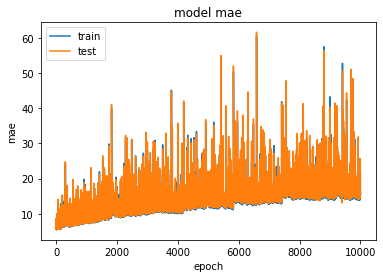

In [24]:
# summarize history for mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

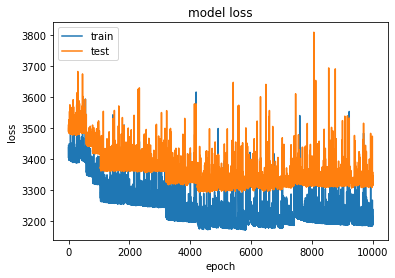

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()